In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch

In [2]:
pwd

'/Users/user/PycharmProjects/pythonProject7'

In [3]:
Home = pd.read_excel('/Users/user/PycharmProjects/pythonProject7/H.xlsx')

In [4]:
School = pd.read_excel('/Users/user/PycharmProjects/pythonProject7/S.xlsx')

In [5]:
Work = pd.read_excel('/Users/user/PycharmProjects/pythonProject7/W.xlsx')

In [6]:
Other = pd.read_excel('/Users/user/PycharmProjects/pythonProject7/O.xlsx')

In [7]:
All = pd.read_excel('/Users/user/PycharmProjects/pythonProject7/all.xlsx')

In [8]:
age = pd.read_excel('/Users/user/PycharmProjects/pythonProject7/age.xlsx')

In [9]:
age

,7044364,6969546,6736223,6010656,5236593,4357681,4022692,3447454,2759450,2143595,1604073,1201530,888215,630611,381067,337550


In [10]:
Home.shape

(16, 16)

In [11]:
All.shape

(16, 16)

In [12]:
School.shape

(16, 16)

In [13]:
Other.shape

(16, 16)

In [14]:
age_groups = ['0-4', '5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75+']

In [15]:
Home.index = age_groups
Home.columns = age_groups

In [16]:
School.index = age_groups
School.columns = age_groups

In [17]:
Work.index = age_groups
Work.columns = age_groups

In [18]:
Other.index = age_groups
Other.columns = age_groups

In [19]:
All.index = age_groups
All.columns = age_groups

In [20]:
All

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+
0-4,5.710853,3.191044,1.710287,1.051250,1.491459,2.040080,2.128546,1.803866,1.115022,0.733068,0.656773,0.662470,0.548068,0.378162,0.238386,0.180935
5-9,3.214269,10.610817,3.961165,1.323088,0.768708,1.478477,1.873352,1.863133,1.547458,0.975413,0.665744,0.834715,0.748294,0.530158,0.362277,0.245487
10-14,1.178809,4.730949,12.986101,2.306944,1.143148,0.865842,1.171571,1.397845,1.424963,1.021367,0.635254,0.424480,0.394112,0.482032,0.393399,0.226995
15-19,0.503658,1.318949,4.816788,11.346999,2.692454,1.217472,0.806909,1.046928,1.085071,1.000524,0.689695,0.400105,0.346144,0.251112,0.196594,0.119528
20-24,0.571650,0.605136,0.832283,3.954888,5.153973,2.500915,1.454419,1.154461,0.930924,0.952697,0.635876,0.451481,0.268080,0.096942,0.087433,0.079686
25-29,0.873987,0.445597,0.404137,1.132001,2.681197,3.264985,2.086250,1.530338,1.146563,0.898458,0.716913,0.419959,0.307054,0.090914,0.031892,0.046958
30-34,0.729921,0.680474,0.780702,0.513878,1.215967,1.941251,2.136679,1.764446,1.303055,0.983808,0.586432,0.439285,0.297672,0.061359,0.050025,0.035789
35-39,0.614846,0.754076,0.640497,0.627070,0.788349,1.428402,1.610578,1.895899,1.674852,1.102328,0.667797,0.360785,0.254385,0.102389,0.063727,0.028839
40-44,0.295327,0.420122,0.582157,0.547014,0.783730,1.116941,1.374653,1.448565,1.540936,1.239863,0.741062,0.302476,0.250472,0.078982,0.050372,0.035446
45-49,0.139796,0.235701,0.365674,0.615025,0.593228,0.836489,1.028849,1.152564,1.113354,1.010455,0.639647,0.367263,0.184390,0.050565,0.059186,0.060201


In [21]:
Home

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+
0-4,0.205498,0.864997,0.683779,0.432886,0.629524,0.898560,1.016499,1.035449,0.738085,0.496727,0.423599,0.487712,0.431789,0.294447,0.187503,0.160160
5-9,0.672396,0.332729,0.948633,0.651979,0.291835,0.657118,1.032756,1.112111,1.082092,0.777028,0.533485,0.715877,0.637435,0.461078,0.330548,0.225195
10-14,0.480414,0.866085,0.499663,0.812513,0.311974,0.264518,0.517769,0.819542,0.876876,0.713449,0.477198,0.345488,0.339046,0.434888,0.360999,0.202762
15-19,0.192183,0.348058,0.549782,0.323731,0.369957,0.182609,0.147595,0.412908,0.540846,0.573007,0.507593,0.308239,0.287657,0.229267,0.184081,0.112318
20-24,0.201842,0.138560,0.159262,0.396797,0.157177,0.333642,0.124683,0.086886,0.215040,0.333934,0.273824,0.249134,0.133296,0.079376,0.068997,0.067108
25-29,0.326622,0.138751,0.078090,0.140538,0.281745,0.101875,0.254051,0.101527,0.054362,0.116564,0.184136,0.136159,0.121747,0.075572,0.022782,0.042756
30-34,0.263554,0.273011,0.190711,0.064590,0.090410,0.220055,0.069635,0.190615,0.127739,0.065272,0.078171,0.096244,0.106870,0.039253,0.039254,0.027100
35-39,0.266601,0.319677,0.284966,0.176197,0.056041,0.073862,0.149144,0.069668,0.161449,0.095806,0.068448,0.059974,0.096976,0.074143,0.047797,0.023363
40-44,0.124977,0.185835,0.197089,0.165801,0.073109,0.033714,0.083313,0.111004,0.044893,0.101618,0.065022,0.025726,0.070507,0.065171,0.040229,0.031719
45-49,0.067804,0.125116,0.159930,0.195469,0.122698,0.048341,0.037767,0.089999,0.093920,0.033081,0.106196,0.058773,0.043474,0.040742,0.050971,0.054695


In [22]:
Home.T

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+
0-4,0.205498,0.672396,0.480414,0.192183,0.201842,0.326622,0.263554,0.266601,0.124977,0.067804,0.059787,0.064642,0.069409,0.032611,0.014979,0.009318
5-9,0.864997,0.332729,0.866085,0.348058,0.138560,0.138751,0.273011,0.319677,0.185835,0.125116,0.062293,0.076619,0.073112,0.053203,0.044505,0.012456
10-14,0.683779,0.948633,0.499663,0.549782,0.159262,0.078090,0.190711,0.284966,0.197089,0.159930,0.103589,0.056983,0.059706,0.054052,0.037688,0.022353
15-19,0.432886,0.651979,0.812513,0.323731,0.396797,0.140538,0.064590,0.176197,0.165801,0.195469,0.119267,0.083838,0.068308,0.036228,0.045531,0.025198
20-24,0.629524,0.291835,0.311974,0.369957,0.157177,0.281745,0.090410,0.056041,0.073109,0.122698,0.100277,0.069621,0.048178,0.031576,0.010010,0.007729
25-29,0.898560,0.657118,0.264518,0.182609,0.333642,0.101875,0.220055,0.073862,0.033714,0.048341,0.062203,0.062288,0.043187,0.024777,0.019201,0.005369
30-34,1.016499,1.032756,0.517769,0.147595,0.124683,0.254051,0.069635,0.149144,0.083313,0.037767,0.046760,0.061933,0.053919,0.035567,0.015184,0.008196
35-39,1.035449,1.112111,0.819542,0.412908,0.086886,0.101527,0.190615,0.069668,0.111004,0.089999,0.034987,0.033644,0.054154,0.049476,0.029884,0.016416
40-44,0.738085,1.082092,0.876876,0.540846,0.215040,0.054362,0.127739,0.161449,0.044893,0.093920,0.065587,0.033935,0.047369,0.051222,0.043801,0.023545
45-49,0.496727,0.777028,0.713449,0.573007,0.333934,0.116564,0.065272,0.095806,0.101618,0.033081,0.078259,0.080257,0.035779,0.031890,0.051656,0.025723


In [23]:
Home_sym = (Home+Home.T)/2

In [24]:
Home_sym

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+
0-4,0.205498,0.768696,0.582096,0.312534,0.415683,0.612591,0.640026,0.651025,0.431531,0.282266,0.241693,0.276177,0.250599,0.163529,0.101241,0.084739
5-9,0.768696,0.332729,0.907359,0.500018,0.215197,0.397934,0.652883,0.715894,0.633963,0.451072,0.297889,0.396248,0.355274,0.257140,0.187526,0.118825
10-14,0.582096,0.907359,0.499663,0.681148,0.235618,0.171304,0.354240,0.552254,0.536983,0.436690,0.290394,0.201236,0.199376,0.244470,0.199344,0.112557
15-19,0.312534,0.500018,0.681148,0.323731,0.383377,0.161574,0.106092,0.294553,0.353323,0.384238,0.313430,0.196039,0.177983,0.132748,0.114806,0.068758
20-24,0.415683,0.215197,0.235618,0.383377,0.157177,0.307694,0.107546,0.071463,0.144074,0.228316,0.187051,0.159378,0.090737,0.055476,0.039503,0.037419
25-29,0.612591,0.397934,0.171304,0.161574,0.307694,0.101875,0.237053,0.087694,0.044038,0.082452,0.123169,0.099223,0.082467,0.050175,0.020992,0.024062
30-34,0.640026,0.652883,0.354240,0.106092,0.107546,0.237053,0.069635,0.169879,0.105526,0.051520,0.062466,0.079089,0.080394,0.037410,0.027219,0.017648
35-39,0.651025,0.715894,0.552254,0.294553,0.071463,0.087694,0.169879,0.069668,0.136226,0.092902,0.051718,0.046809,0.075565,0.061810,0.038841,0.019890
40-44,0.431531,0.633963,0.536983,0.353323,0.144074,0.044038,0.105526,0.136226,0.044893,0.097769,0.065304,0.029830,0.058938,0.058197,0.042015,0.027632
45-49,0.282266,0.451072,0.436690,0.384238,0.228316,0.082452,0.051520,0.092902,0.097769,0.033081,0.092227,0.069515,0.039626,0.036316,0.051313,0.040209


In [25]:
School

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+
0-4,2.171485e-01,5.640574e-02,8.496010e-03,1.000526e-02,3.297522e-03,1.530244e-02,2.616404e-02,1.705475e-02,6.669484e-03,7.114898e-03,3.433759e-03,2.138284e-03,3.439190e-04,1.909110e-04,1.650000e-66,1.280000e-120
5-9,7.058013e-02,1.049255e+00,4.796215e-02,5.844256e-03,6.471489e-03,1.957285e-02,2.389093e-02,1.948325e-02,1.501103e-02,9.265089e-03,6.683947e-03,1.733542e-03,8.241190e-04,3.183930e-04,6.930000e-05,1.620000e-39
10-14,4.919770e-04,1.862036e-01,8.917192e-01,3.034788e-02,3.487790e-03,1.274586e-02,1.218042e-02,1.685870e-02,1.415447e-02,9.699495e-03,5.922782e-03,2.574294e-03,8.093260e-04,1.544270e-04,9.850000e-26,3.640000e-05
15-19,3.208575e-03,8.787689e-03,3.041227e-01,1.146546e+00,1.554293e-02,1.570499e-02,1.642166e-02,1.994985e-02,1.338719e-02,1.368821e-02,6.498564e-03,3.259114e-03,9.087620e-04,2.338680e-04,1.240000e-33,3.410000e-71
20-24,4.432285e-03,5.174449e-03,1.728487e-03,1.589625e-01,8.730291e-02,1.095235e-02,6.969271e-03,7.618258e-03,4.141475e-03,4.627223e-03,2.244040e-03,1.456163e-03,1.270080e-04,2.657120e-04,3.540000e-05,2.440000e-48
25-29,4.937967e-03,2.727782e-02,7.152139e-03,4.016145e-02,6.066524e-02,3.963412e-02,6.538997e-03,7.660280e-03,7.667174e-03,6.071690e-03,1.430929e-03,2.088136e-03,8.003010e-04,5.235530e-04,9.250000e-05,2.570350e-04
30-34,9.216994e-03,8.531317e-02,4.730250e-02,3.267643e-02,1.050054e-02,2.046711e-02,1.759453e-02,1.084815e-02,1.003068e-02,4.747752e-03,3.534438e-03,4.883270e-04,1.008630e-03,9.580000e-05,3.310000e-49,6.220000e-56
35-39,1.372609e-02,4.345784e-02,2.687511e-02,1.472481e-02,3.676684e-03,1.165282e-02,1.544577e-02,1.035306e-02,9.939300e-03,4.368920e-03,6.008830e-04,1.303249e-03,1.022610e-04,4.379770e-04,3.690000e-124,1.940000e-67
40-44,3.704116e-03,1.988169e-02,1.348491e-02,5.804140e-02,1.507832e-03,4.916735e-03,4.622153e-03,5.691892e-03,1.078630e-02,3.582648e-03,3.798383e-03,1.025511e-03,9.777940e-04,9.740000e-05,9.620000e-69,4.800000e-93
45-49,2.798610e-02,3.886029e-02,2.169363e-02,8.209628e-02,9.939460e-04,5.534023e-03,1.027384e-02,8.164326e-03,6.826808e-03,3.855700e-03,4.569701e-03,2.069153e-03,5.785370e-04,3.394850e-04,1.240000e-134,6.540000e-73


In [26]:
School_sym = (School+School.T)

In [27]:
School_sym 

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+
0-4,4.342970e-01,0.126986,8.987987e-03,0.013214,7.729807e-03,0.020240,3.538103e-02,3.078083e-02,1.037360e-02,3.510100e-02,9.693006e-03,0.019866,1.010065e-02,6.024150e-04,2.560000e-29,5.630000e-95
5-9,1.269859e-01,2.098509,2.341657e-01,0.014632,1.164594e-02,0.046851,1.092041e-01,6.294109e-02,3.489271e-02,4.812538e-02,6.146826e-02,0.044495,1.113109e-02,6.535841e-03,6.930000e-05,4.219632e-03
10-14,8.987987e-03,0.234166,1.783438e+00,0.334471,5.216277e-03,0.019898,5.948292e-02,4.373380e-02,2.763938e-02,3.139312e-02,6.599242e-02,0.036141,5.632883e-03,2.402643e-03,9.850000e-26,3.640000e-05
15-19,1.321383e-02,0.014632,3.344705e-01,2.293093,1.745055e-01,0.055866,4.909809e-02,3.467466e-02,7.142859e-02,9.578449e-02,7.379088e-02,0.042296,2.405341e-02,2.338680e-04,1.517023e-03,4.244137e-03
20-24,7.729807e-03,0.011646,5.216277e-03,0.174505,1.746058e-01,0.071618,1.746981e-02,1.129494e-02,5.649307e-03,5.621169e-03,3.154609e-03,0.002414,2.431035e-03,6.826270e-04,3.540000e-05,9.790000e-37
25-29,2.024040e-02,0.046851,1.989800e-02,0.055866,7.161759e-02,0.079268,2.700611e-02,1.931310e-02,1.258391e-02,1.160571e-02,3.970573e-03,0.010802,1.117261e-03,9.413020e-04,9.250000e-05,1.774560e-03
30-34,3.538103e-02,0.109204,5.948292e-02,0.049098,1.746981e-02,0.027006,3.518907e-02,2.629392e-02,1.465284e-02,1.502159e-02,1.041310e-02,0.003821,3.890732e-03,2.758385e-03,2.520000e-27,6.220000e-56
35-39,3.078083e-02,0.062941,4.373380e-02,0.034675,1.129494e-02,0.019313,2.629392e-02,2.070612e-02,1.563119e-02,1.253325e-02,6.945981e-03,0.006667,7.852640e-03,1.570665e-03,1.523040e-03,4.460002e-61
40-44,1.037360e-02,0.034893,2.763938e-02,0.071429,5.649307e-03,0.012584,1.465284e-02,1.563119e-02,2.157261e-02,1.040946e-02,1.105145e-02,0.007452,2.613908e-03,1.200427e-03,1.568737e-03,2.870000e-49
45-49,3.510100e-02,0.048125,3.139312e-02,0.095784,5.621169e-03,0.011606,1.502159e-02,1.253325e-02,1.040946e-02,7.711400e-03,1.400888e-02,0.006595,3.114846e-03,2.085127e-03,4.227395e-03,1.710000e-60


In [28]:
Work

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+
0-4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,8.210000e-92,1.210000e-05,3.160000e-125
5-9,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.350000e-05,7.650000e-79,2.380000e-65
10-14,0.000000e+00,0.000000e+00,1.893414e-01,2.188508e-02,0.031280,0.010122,0.084515,0.024285,0.082502,0.047561,0.015583,4.520000e-08,1.360000e-16,2.800000e-53,4.960000e-06,3.780000e-102
15-19,0.000000e+00,0.000000e+00,3.900692e-02,3.568603e-01,0.382778,0.246201,0.234479,0.219771,0.236965,0.185394,0.090086,5.038813e-02,2.923810e-02,8.350000e-06,2.860000e-06,1.890000e-31
20-24,0.000000e+00,0.000000e+00,6.833462e-02,2.579890e-01,0.668449,0.716476,0.610908,0.678679,0.495949,0.394177,0.249038,1.348688e-01,1.077851e-01,9.860000e-06,1.330000e-05,3.740000e-06
25-29,0.000000e+00,0.000000e+00,9.828762e-02,2.536120e-01,0.711458,1.339934,0.979540,0.964291,0.862220,0.599896,0.408030,2.222043e-01,1.607895e-01,1.610000e-05,1.010000e-05,3.010000e-06
30-34,0.000000e+00,0.000000e+00,1.137719e-01,1.400170e-01,0.503630,0.928690,1.241606,1.097900,0.952288,0.771548,0.385089,2.648435e-01,1.538104e-01,1.640000e-05,4.100000e-06,3.490000e-06
35-39,0.000000e+00,0.000000e+00,7.054502e-02,2.815914e-01,0.421240,0.879514,0.962159,1.340565,1.262267,0.866847,0.522261,2.449513e-01,1.099101e-01,1.230000e-05,9.140000e-06,6.020000e-06
40-44,0.000000e+00,0.000000e+00,7.715538e-02,1.702160e-01,0.479879,0.841906,1.014481,1.094667,1.298017,1.035000,0.615534,2.517177e-01,1.559832e-01,1.440000e-05,1.030000e-05,1.300000e-05
45-49,0.000000e+00,0.000000e+00,1.021570e-01,2.111436e-01,0.324568,0.628056,0.822669,0.911956,0.913149,0.884417,0.471386,2.827298e-01,1.232931e-01,1.630000e-05,1.080000e-05,6.090000e-06


In [29]:
Work_sym = (Work+Work.T)

In [30]:
Work_sym

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+
0-4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,1.210000e-05,3.160000e-125
5-9,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000017,7.890000e-42,2.380000e-65
10-14,0.000000e+00,0.000000e+00,3.786827e-01,6.089200e-02,0.099615,0.108410,0.198286,0.094830,0.159657,0.149718,0.105269,0.167784,0.145073,0.000008,7.510000e-06,1.190000e-89
15-19,0.000000e+00,0.000000e+00,6.089200e-02,7.137207e-01,0.640767,0.499813,0.374496,0.501363,0.407181,0.396538,0.218319,0.155014,0.065575,0.000031,2.896000e-05,9.400000e-22
20-24,0.000000e+00,0.000000e+00,9.961482e-02,6.407670e-01,1.336898,1.427934,1.114538,1.099919,0.975828,0.718744,0.468397,0.314322,0.290474,0.000041,3.010000e-05,5.034000e-05
25-29,0.000000e+00,0.000000e+00,1.084097e-01,4.998129e-01,1.427934,2.679868,1.908231,1.843805,1.704125,1.227952,0.921815,0.591368,0.524963,0.000095,3.130000e-05,5.001000e-05
30-34,0.000000e+00,0.000000e+00,1.982865e-01,3.744959e-01,1.114538,1.908231,2.483212,2.060060,1.966769,1.594217,0.996937,0.789218,0.563649,0.000089,3.980000e-05,5.039000e-05
35-39,0.000000e+00,0.000000e+00,9.483043e-02,5.013626e-01,1.099919,1.843805,2.060060,2.681129,2.356934,1.778803,1.164683,0.743478,0.598281,0.000042,4.934000e-05,9.022000e-05
40-44,0.000000e+00,0.000000e+00,1.596574e-01,4.071808e-01,0.975828,1.704125,1.966769,2.356934,2.596035,1.948149,1.457490,0.868552,0.667072,0.000081,4.590000e-05,4.080000e-05
45-49,0.000000e+00,0.000000e+00,1.497180e-01,3.965378e-01,0.718744,1.227952,1.594217,1.778803,1.948149,1.768833,1.277319,0.765609,0.618542,0.000076,4.180000e-05,1.639000e-05


In [31]:
Other

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+
0-4,5.288207,2.269641,1.018012,0.608359,0.858637,1.126218,1.085883,0.751362,0.370268,0.229226,0.229740,0.172619,0.115935,0.083524,0.050872,0.020775
5-9,2.471292,9.228834,2.964570,0.665265,0.470401,0.801787,0.816704,0.731539,0.450355,0.189120,0.125575,0.117104,0.110035,0.068748,0.031659,0.020292
10-14,0.697903,3.678660,11.405378,1.442197,0.796406,0.578456,0.557107,0.537159,0.451430,0.250658,0.136550,0.076418,0.054256,0.046989,0.032394,0.024197
15-19,0.308267,0.962104,3.923877,9.519861,1.924176,0.772957,0.408414,0.394299,0.293873,0.228435,0.085517,0.038219,0.028341,0.021603,0.012511,0.007210
20-24,0.365376,0.461402,0.602957,3.141139,4.241044,1.439844,0.711859,0.381278,0.215793,0.219959,0.110770,0.066022,0.026873,0.017290,0.018387,0.012574
25-29,0.542427,0.279568,0.220607,0.697690,1.627329,1.783542,0.846120,0.456859,0.222314,0.175926,0.123316,0.059507,0.023718,0.014802,0.009007,0.003942
30-34,0.457150,0.322150,0.428916,0.276595,0.611426,0.772039,0.807843,0.465083,0.212997,0.142239,0.119638,0.077710,0.035983,0.021994,0.010767,0.008686
35-39,0.334519,0.390941,0.258110,0.154557,0.307392,0.463373,0.483830,0.475314,0.241197,0.135305,0.076486,0.054556,0.047397,0.027796,0.015920,0.005470
40-44,0.166645,0.214406,0.294428,0.152956,0.229234,0.236405,0.272236,0.237203,0.187239,0.099663,0.056708,0.024007,0.023004,0.013699,0.010133,0.003714
45-49,0.044006,0.071724,0.081894,0.126316,0.144969,0.154558,0.158139,0.142445,0.099459,0.089101,0.057496,0.023691,0.017045,0.009468,0.008204,0.005500


In [32]:
Other_sym = (Other+Other.T)

In [33]:
Other_sym

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+
0-4,10.576413,4.740934,1.715915,0.916626,1.224013,1.668645,1.543033,1.085882,0.536913,0.273232,0.287782,0.243733,0.164285,0.122514,0.065076,0.039802
5-9,4.740934,18.457668,6.643229,1.627369,0.931803,1.081355,1.138855,1.122480,0.664760,0.260844,0.233587,0.179847,0.162461,0.119864,0.061520,0.039488
10-14,1.715915,6.643229,22.810755,5.366074,1.399363,0.799063,0.986024,0.795270,0.745858,0.332552,0.244023,0.135580,0.093803,0.075458,0.070099,0.049046
15-19,0.916626,1.627369,5.366074,19.039723,5.065315,1.470647,0.685009,0.548856,0.446829,0.354751,0.214726,0.095005,0.079154,0.045842,0.069420,0.018313
20-24,1.224013,0.931803,1.399363,5.065315,8.482089,3.067172,1.323285,0.688670,0.445027,0.364928,0.307789,0.184756,0.116292,0.076368,0.062446,0.032862
25-29,1.668645,1.081355,0.799063,1.470647,3.067172,3.567084,1.618158,0.920232,0.458719,0.330484,0.338115,0.231402,0.141906,0.094053,0.064189,0.027209
30-34,1.543033,1.138855,0.986024,0.685009,1.323285,1.618158,1.615687,0.948912,0.485233,0.300378,0.250972,0.226328,0.137751,0.105694,0.058185,0.045545
35-39,1.085882,1.122480,0.795270,0.548856,0.688670,0.920232,0.948912,0.950627,0.478400,0.277750,0.179211,0.153989,0.145751,0.088282,0.069141,0.029326
40-44,0.536913,0.664760,0.745858,0.446829,0.445027,0.458719,0.485233,0.478400,0.374478,0.199122,0.141305,0.094733,0.084730,0.055600,0.055484,0.020277
45-49,0.273232,0.260844,0.332552,0.354751,0.364928,0.330484,0.300378,0.277750,0.199122,0.178203,0.140095,0.067259,0.060734,0.038589,0.038082,0.023454


In [34]:
All_sym = (All+All.T)/2

In [35]:
All_sym

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+
0-4,5.710853,3.202656,1.444548,0.777454,1.031554,1.457033,1.429233,1.209356,0.705174,0.436432,0.390431,0.407976,0.337792,0.225091,0.133785,0.104640
5-9,3.202656,10.610817,4.346057,1.321019,0.686922,0.962037,1.276913,1.308605,0.983790,0.605557,0.445417,0.508418,0.442069,0.320348,0.218321,0.140679
10-14,1.444548,4.346057,12.986101,3.561866,0.987715,0.634989,0.976137,1.019171,1.003560,0.693521,0.498036,0.370988,0.321631,0.283404,0.234397,0.137098
15-19,0.777454,1.321019,3.561866,11.346999,3.323671,1.174737,0.660394,0.836999,0.816043,0.807775,0.566848,0.342196,0.262374,0.155801,0.150289,0.080037
20-24,1.031554,0.686922,0.987715,3.323671,5.153973,2.591056,1.335193,0.971405,0.857327,0.772963,0.576721,0.410124,0.295335,0.094022,0.070759,0.053875
25-29,1.457033,0.962037,0.634989,1.174737,2.591056,3.264985,2.013751,1.479370,1.131752,0.867473,0.755120,0.516009,0.416460,0.097719,0.053148,0.038579
30-34,1.429233,1.276913,0.976137,0.660394,1.335193,2.013751,2.136679,1.687512,1.338854,1.006328,0.691626,0.588772,0.433040,0.091680,0.056331,0.040446
35-39,1.209356,1.308605,1.019171,0.836999,0.971405,1.479370,1.687512,1.895899,1.561709,1.127446,0.727138,0.498876,0.451507,0.106757,0.074197,0.034598
40-44,0.705174,0.983790,1.003560,0.816043,0.857327,1.131752,1.338854,1.561709,1.540936,1.176609,0.870227,0.515199,0.436146,0.086637,0.070565,0.037791
45-49,0.436432,0.605557,0.693521,0.807775,0.772963,0.867473,1.006328,1.127446,1.176609,1.010455,0.807939,0.489246,0.380822,0.056691,0.072489,0.051944


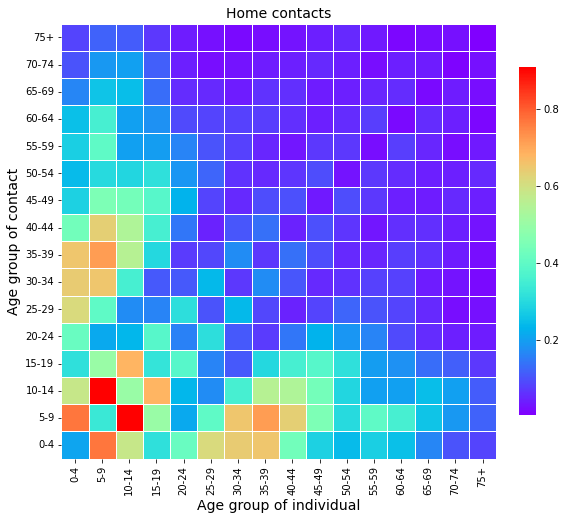

In [36]:
import seaborn as sns
plt.figure(figsize = (10, 8))
ax = sns.heatmap(Home_sym, cmap="rainbow", xticklabels=True, yticklabels=True, square=True,
                 linecolor='white', linewidths=1,
                 cbar=True, cbar_kws={'shrink': 0.8, 'pad': 0.04})
ax.invert_yaxis()
plt.ylabel('Age group of contact', fontsize = 14) # x-axis label with fontsize 15
plt.xlabel('Age group of individual', fontsize = 14)
plt.title("Home contacts",fontsize = 14)
plt.savefig('Home')
plt.show()

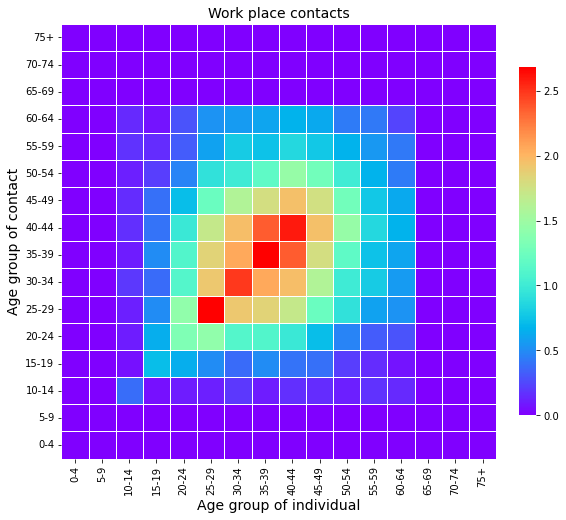

In [37]:
plt.figure(figsize = (10, 8))
ax = sns.heatmap(Work_sym, cmap="rainbow", xticklabels=True, yticklabels=True, square=True,
                 linecolor='white', linewidths=1,
                 cbar=True, cbar_kws={'shrink': 0.8, 'pad': 0.04})
ax.invert_yaxis()
plt.ylabel('Age group of contact', fontsize = 14) # x-axis label with fontsize 15
plt.xlabel('Age group of individual', fontsize = 14)
plt.title("Work place contacts", fontsize = 14)
plt.savefig('Work')
plt.show()

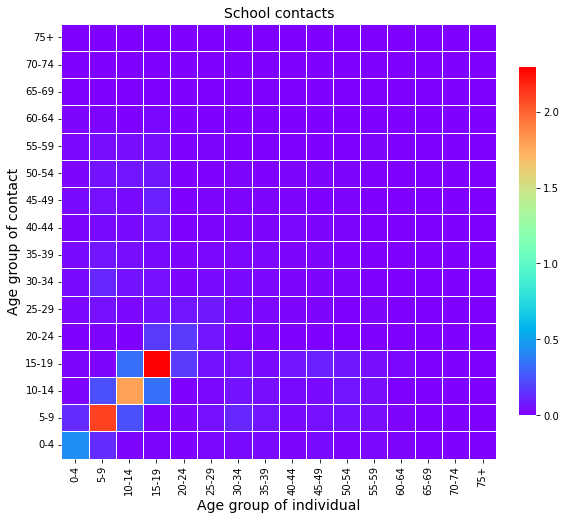

In [38]:
plt.figure(figsize = (10, 8))
ax = sns.heatmap(School_sym, cmap="rainbow", xticklabels=True, yticklabels=True, square=True,
                 linecolor='white', linewidths=1,
                 cbar=True, cbar_kws={'shrink': 0.8, 'pad': 0.04})
ax.invert_yaxis()
plt.ylabel('Age group of contact', fontsize = 14) # x-axis label with fontsize 15
plt.xlabel('Age group of individual', fontsize = 14)
plt.title("School contacts", fontsize=14)
plt.savefig('School')
plt.show()

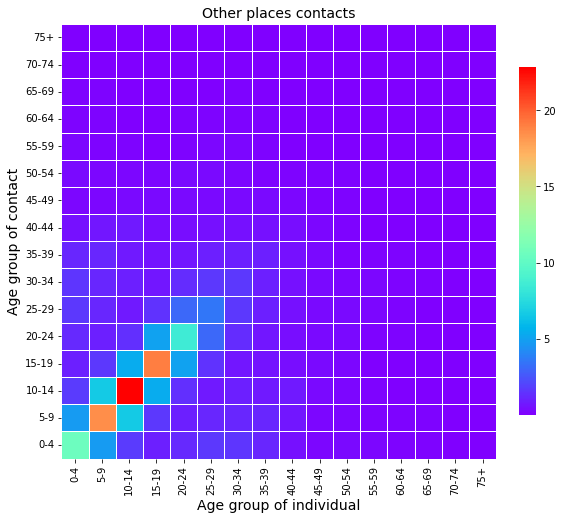

In [39]:
plt.figure(figsize = (10, 8))
ax = sns.heatmap(Other_sym, cmap="rainbow", xticklabels=True, yticklabels=True, square=True,
                 linecolor='white', linewidths=1,
                 cbar=True, cbar_kws={'shrink': 0.8, 'pad': 0.04})
ax.invert_yaxis()
plt.ylabel('Age group of contact', fontsize = 14) # x-axis label with fontsize 15
plt.xlabel('Age group of individual', fontsize = 14)
plt.title("Other places contacts", fontsize=14)
plt.savefig('Other')
plt.show()

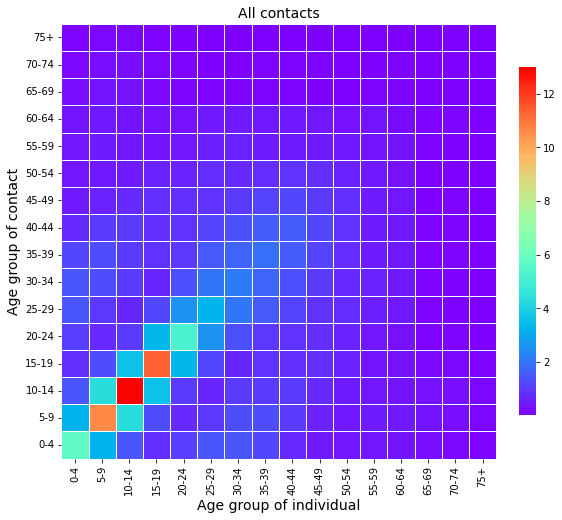

In [40]:
plt.figure(figsize = (10, 8))
ax = sns.heatmap(All_sym, cmap="rainbow", xticklabels=True, yticklabels=True, square=True,
                 linecolor='white', linewidths=1,
                 cbar=True, cbar_kws={'shrink': 0.8, 'pad': 0.04})
ax.invert_yaxis()
plt.ylabel('Age group of contact', fontsize = 14) # x-axis label with fontsize 15
plt.xlabel('Age group of individual', fontsize = 14)
plt.title("All contacts", fontsize=14)
plt.savefig('All')
plt.show()

In [41]:
# load the socio economic data for 47 counties in kenya
county_data = pd.read_excel('/Users/user/PycharmProjects/pythonProject7/kenya data.xlsx')

In [42]:
# check the data
county_data.head()

,County,Population_size,Household_Size,Contraceptive_prevalence,Fertility,healthfacility_delivery,Crime_index,Employment_rate,Education_level,County_Population,...,Area,HIV_Prevalence,Average_contribution_GDP,Gross_County_Product,Child_Marriage_Prevalence,Urbanization,Growth_Rates,Healthcare_Facility_Density,Poverty_Rate,Electricity_access
0,Mombasa,1208333,3.1,55.0,3.2,81.8,340,44.2,36.7,2.54,...,219.9,7.4,5.17,206409,13.8,100.0,3.1,2.3,27.1,59.0
1,Kwale,866820,5.0,41.5,4.7,49.0,169,39.1,10.6,1.82,...,8267.1,5.7,1.16,46173,27.2,23.0,3.4,1.7,47.4,10.6
2,Kilifi,1453787,4.8,34.1,5.1,52.6,198,40.5,12.5,3.06,...,12539.7,4.4,1.66,66381,27.3,26.0,3.2,2.0,46.4,16.7
3,Tana River,315943,4.6,28.7,5.8,31.6,259,45.2,6.8,0.66,...,37950.5,1.0,0.45,18094,59.5,15.0,1.4,2.3,62.2,2.5
4,Lamu,143920,3.7,42.1,4.3,43.9,485,54.4,13.8,0.30,...,6253.3,2.3,0.35,14121,28.6,20.0,4.3,4.9,28.5,17.0


In [43]:
# check the 47 counties
county_data['County']

0             Mombasa
1               Kwale
2              Kilifi
3          Tana River
4                Lamu
5        Taita-Taveta
6             Garissa
7               Wajir
8             Mandera
9            Marsabit
10             Isiolo
11               Meru
12      Tharaka-Nithi
13               Embu
14              Kitui
15           Machakos
16            Makueni
17          Nyandarua
18              Nyeri
19          Kirinyaga
20           Murang'a
21             Kiambu
22            Turkana
23         West Pokot
24            Samburu
25        Trans-Nzoia
26        Uasin Gishu
27    Elgeyo-Marakwet
28              Nandi
29            Baringo
30           Laikipia
31             Nakuru
32              Narok
33            Kajiado
34            Kericho
35              Bomet
36             Kamega
37             Vihiga
38            Bungoma
39              Busia
40              Siaya
41             Kisumu
42            Homabay
43             Migori
44              Kisii
45        

In [44]:
# socio-economic factors
county_data.columns[1:]


Index(['Population_size', 'Household_Size', 'Contraceptive_prevalence',
       'Fertility', 'healthfacility_delivery', 'Crime_index',
       'Employment_rate', 'Education_level', 'County_Population',
       'Population_Density', 'Death_Rates', 'Gender_Index', 'Literacy_Rates',
       'Unemployment_Rate', 'Birth_Rate', 'Infant_Mortality',
       'Under_Five_Mortality', 'Land_size', 'Area', 'HIV_Prevalence',
       'Average_contribution_GDP', 'Gross_County_Product',
       'Child_Marriage_Prevalence', 'Urbanization', 'Growth_Rates',
       'Healthcare_Facility_Density', 'Poverty_Rate', 'Electricity_access'],
      dtype='object')

In [45]:
county_data.shape

(47, 29)

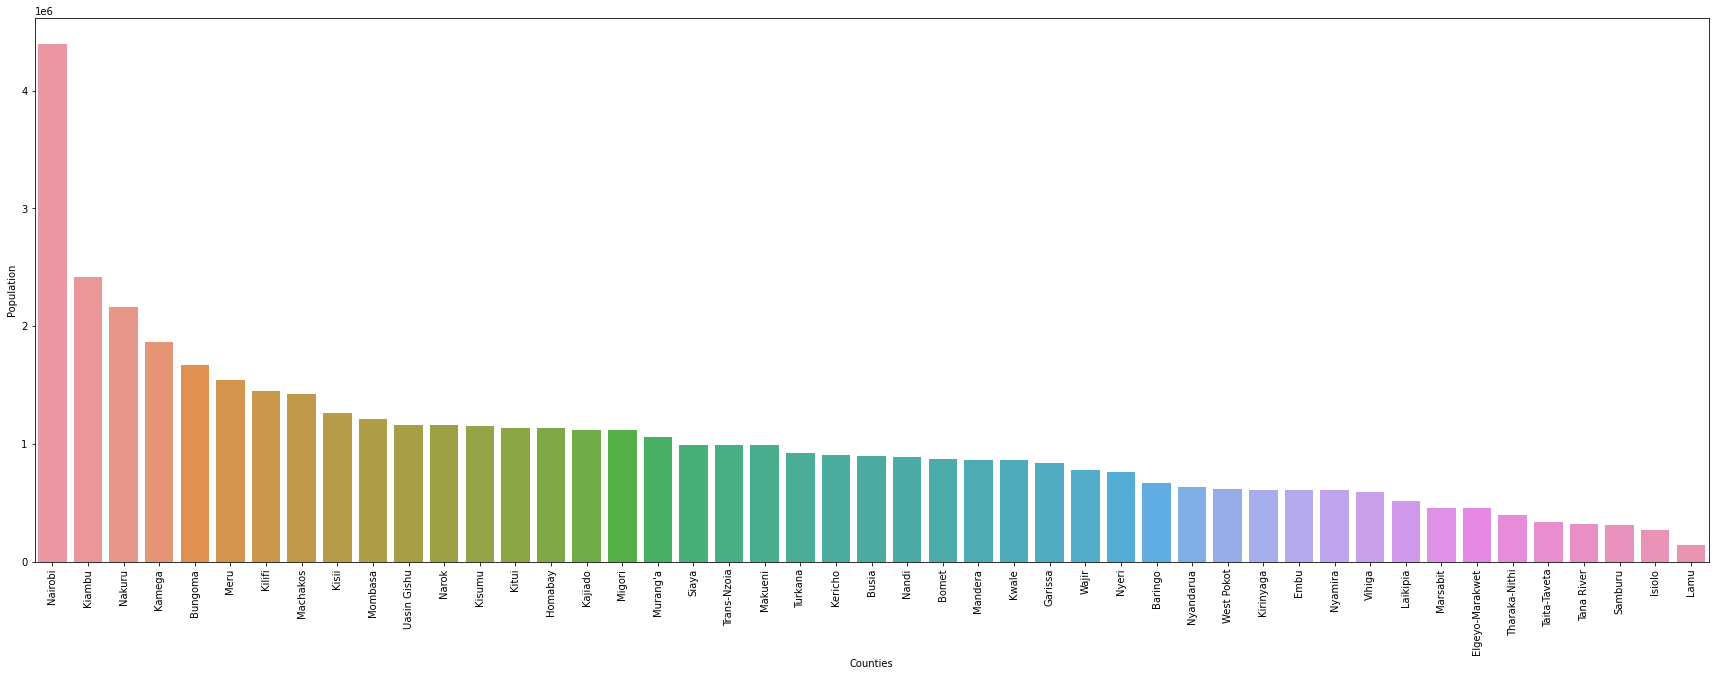

In [46]:
# Population: Number of people in the county
plt.figure(figsize = (30,10))
P = county_data[['County', 'Population_size']].sort_values('Population_size', 
                                                                    ascending = False)
ax = sns.barplot(x='County', y='Population_size', data= P)
ax.set(xlabel = 'Counties', ylabel='Population' )
plt.xticks(rotation=90)
plt.show()

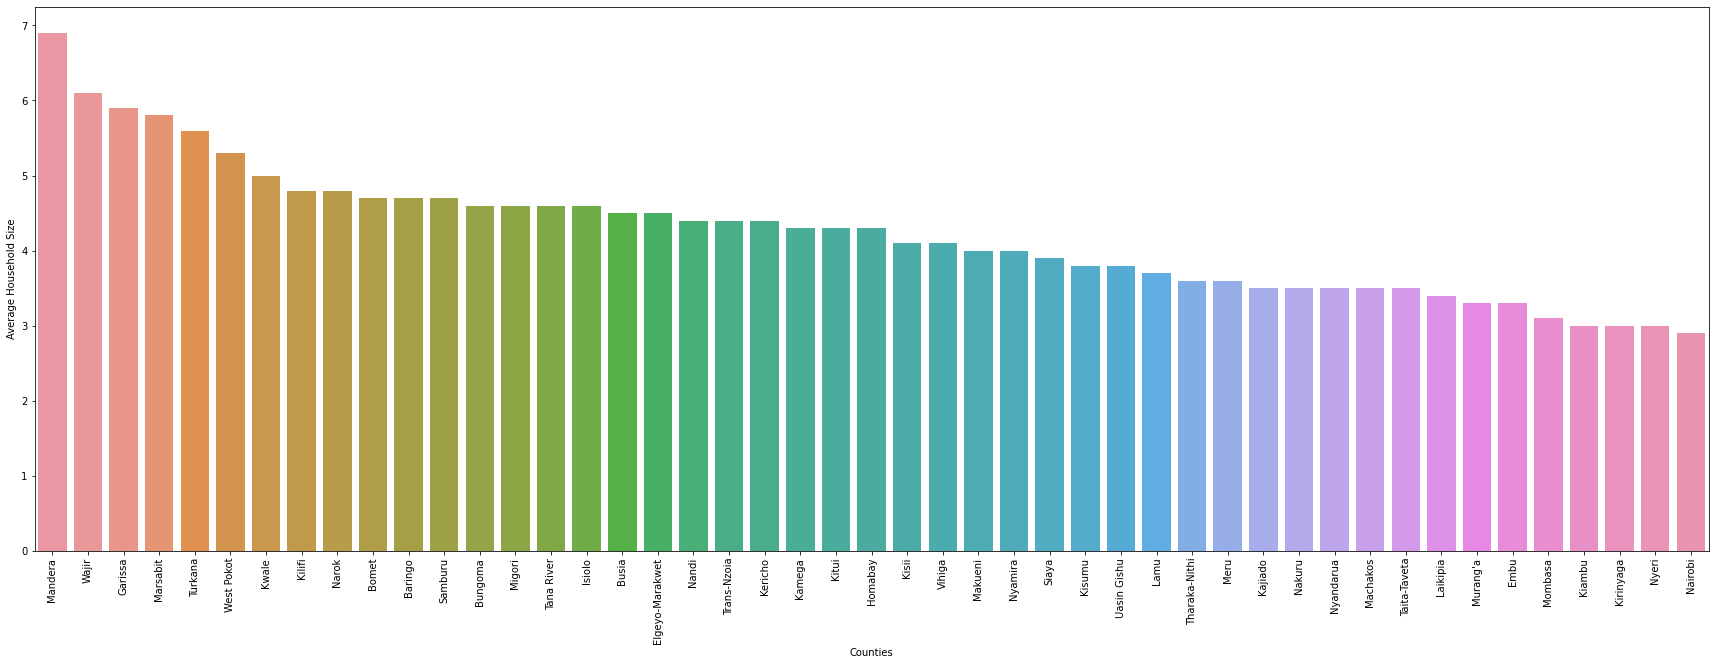

In [47]:
# Average Household Size: Persons per household.
plt.figure(figsize = (30,10))
AHS = county_data[['County', 'Household_Size']].sort_values('Household_Size', 
                                                                    ascending = False)
ax = sns.barplot(x='County', y='Household_Size', data= AHS)
ax.set(xlabel = 'Counties', ylabel= 'Average Household Size')
plt.xticks(rotation=90)
plt.show()

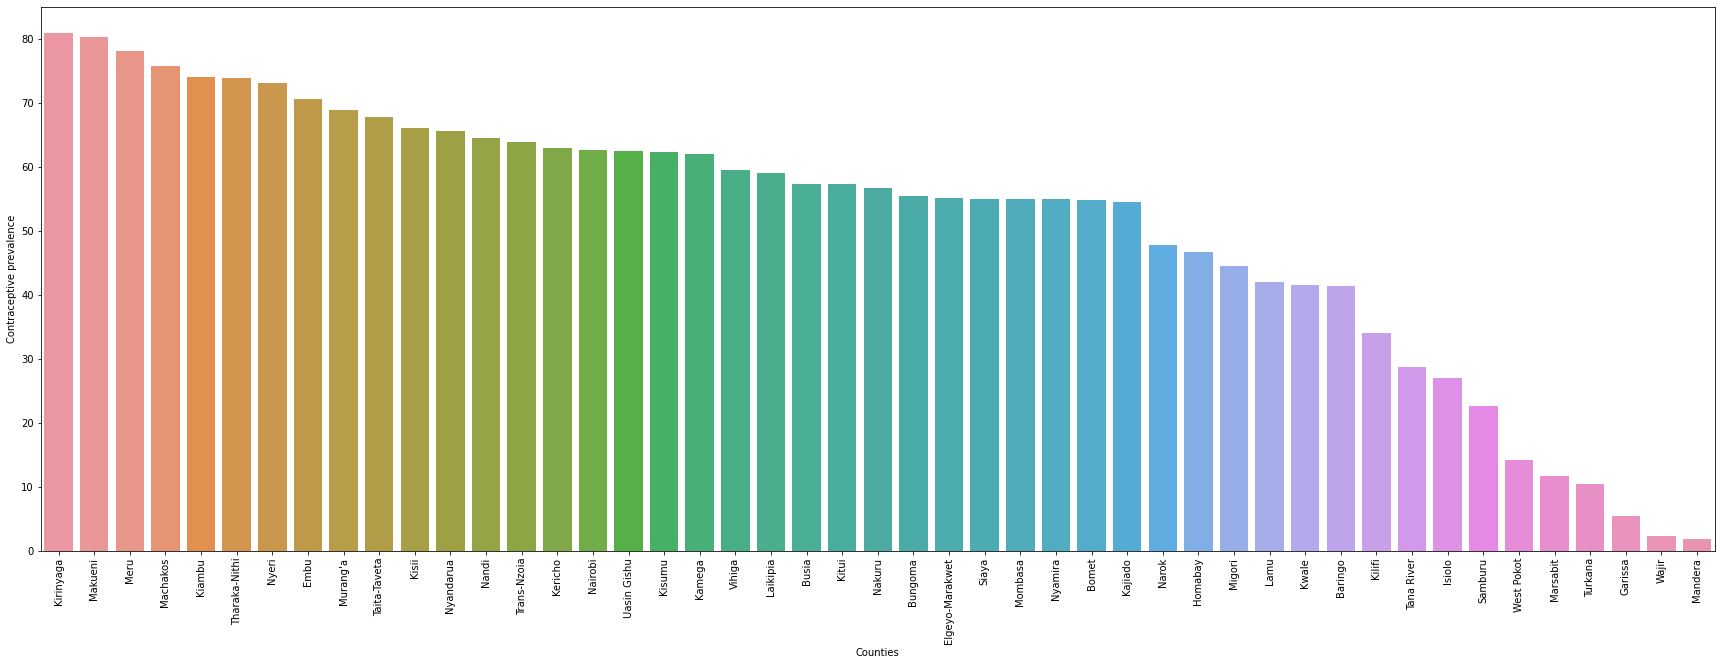

In [48]:
# Contraceptive prevalence: the proportion of women who are currently using, 
# or whose sexual partner is currently using at least one method of contraception, regardless of the method being used.
plt.figure(figsize = (30,10))
CP = county_data[['County','Contraceptive_prevalence']].sort_values('Contraceptive_prevalence', ascending = False)
ax = sns.barplot(x='County', y='Contraceptive_prevalence', data= CP)
ax.set(xlabel = 'Counties', ylabel= 'Contraceptive prevalence')
plt.xticks(rotation=90)
plt.show()

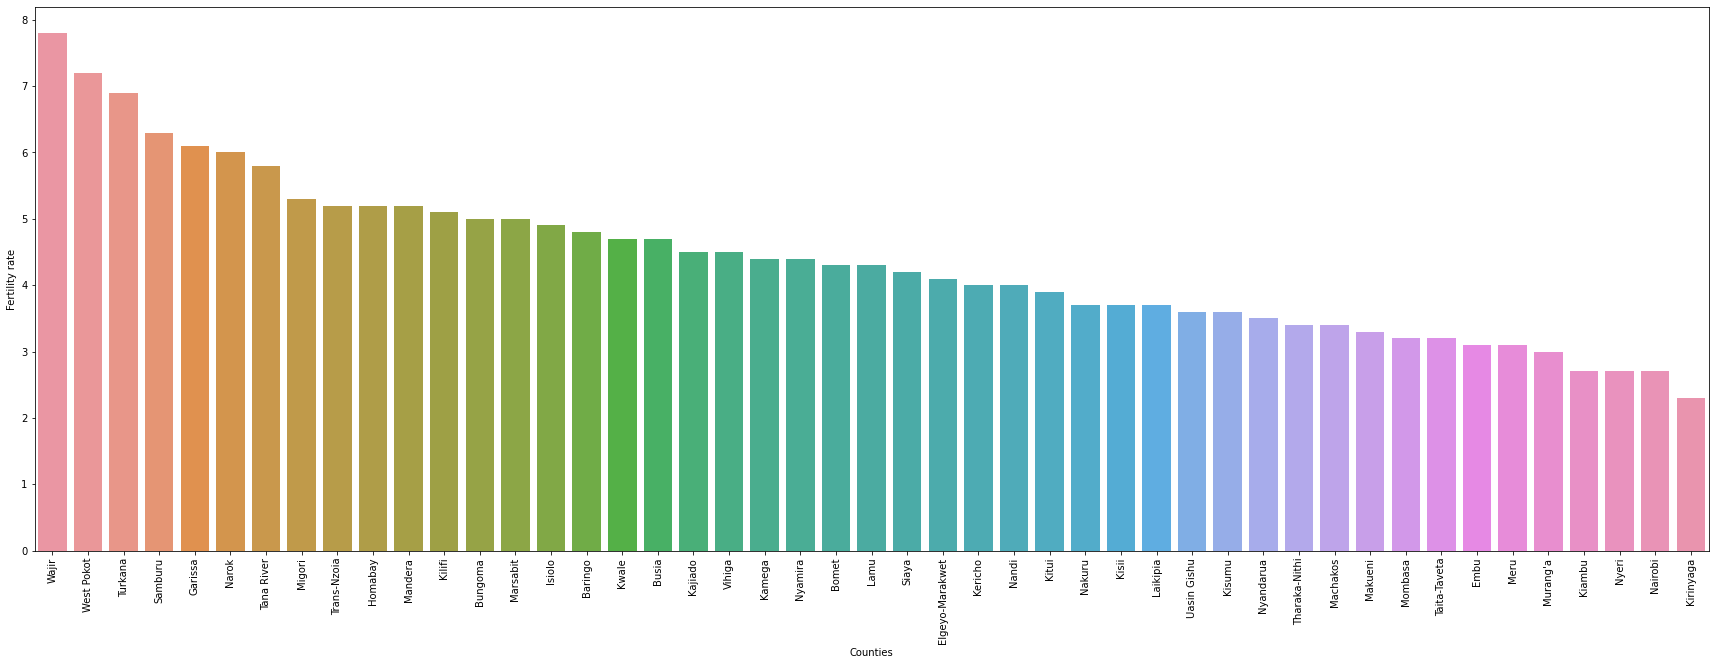

In [49]:
# Ferility rate:  is the average number of children that would be born to a woman over her lifetime 
plt.figure(figsize = (30,10))
FR = county_data[['County','Fertility']].sort_values('Fertility', ascending = False)
ax = sns.barplot(x='County', y='Fertility', data= FR)
ax.set(xlabel = 'Counties', ylabel= 'Fertility rate')
plt.xticks(rotation=90)
plt.show()

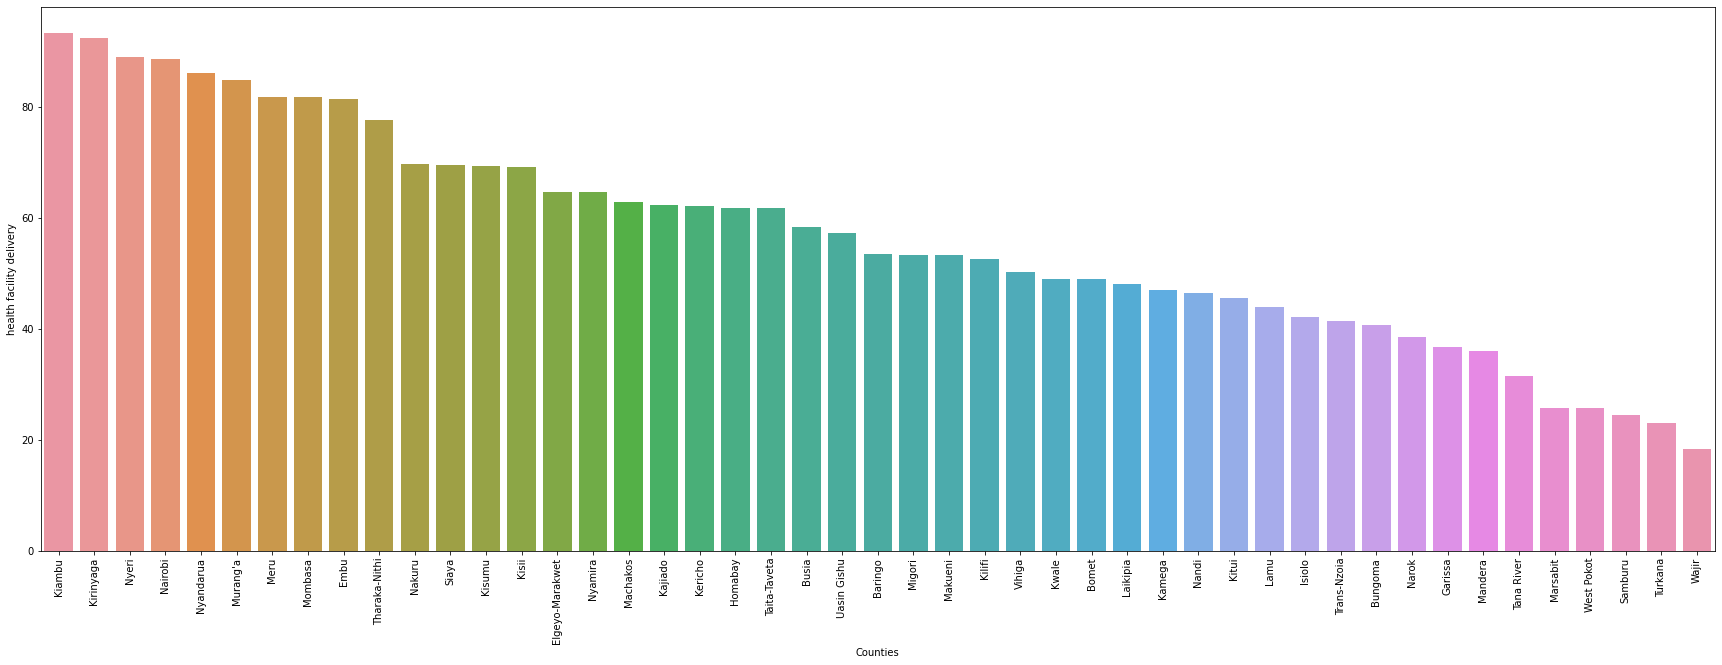

In [50]:
# health facility delivery: percentage of babies delivered in a health facility delivery
plt.figure(figsize = (30,10))
HFD = county_data[['County','healthfacility_delivery']].sort_values('healthfacility_delivery', 
                                                                                           ascending = False)
ax = sns.barplot(x='County', y='healthfacility_delivery', data= HFD)
ax.set(xlabel = 'Counties', ylabel= 'health facility delivery')
plt.xticks(rotation=90)
plt.show()

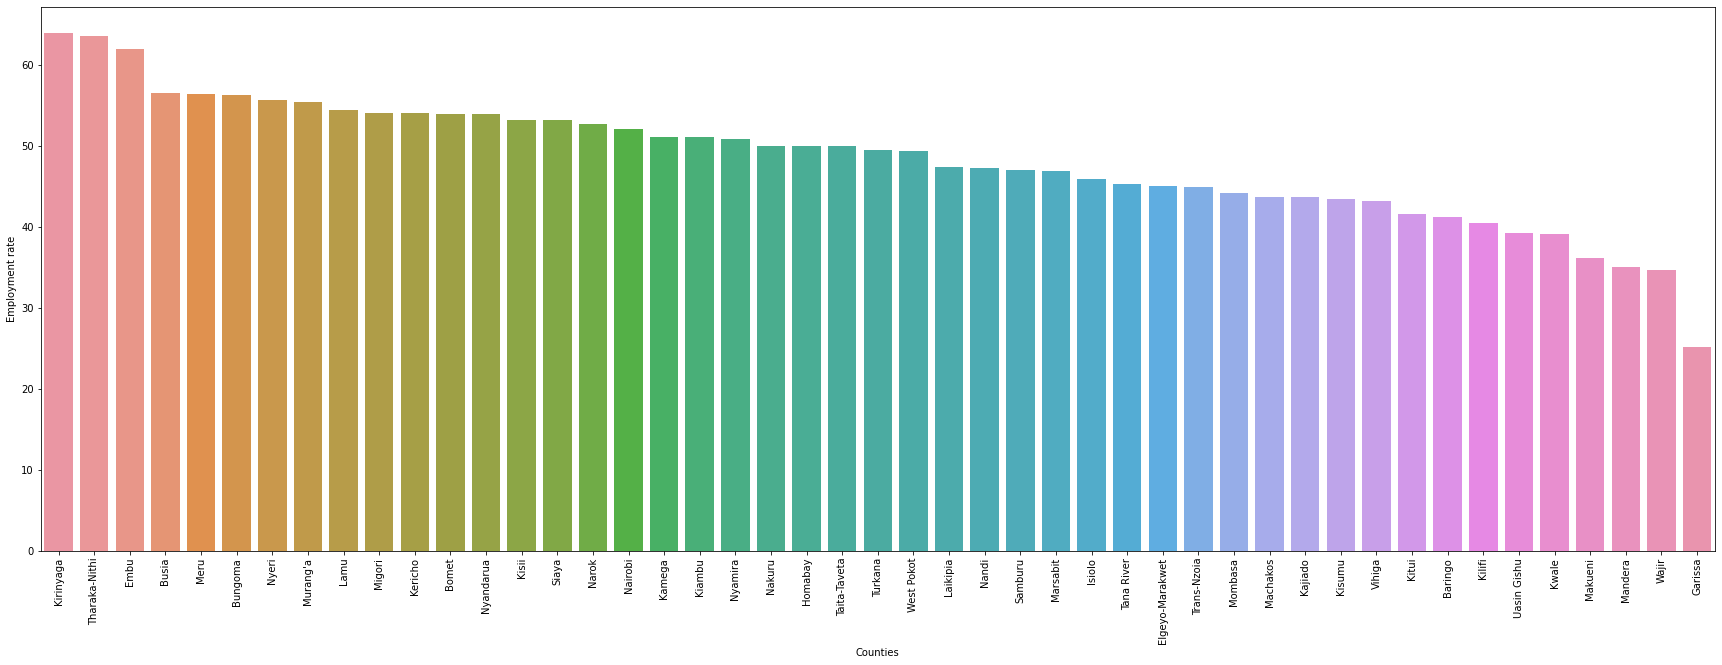

In [51]:
# Employment rate: The ratio of employed persons to the population of corresponding age.
plt.figure(figsize = (30,10))
ER = county_data[['County','Employment_rate']].sort_values('Employment_rate', ascending = False)
ax = sns.barplot(x='County', y='Employment_rate', data= ER)
ax.set(xlabel = 'Counties', ylabel= 'Employment rate')
plt.xticks(rotation=90)
plt.show()

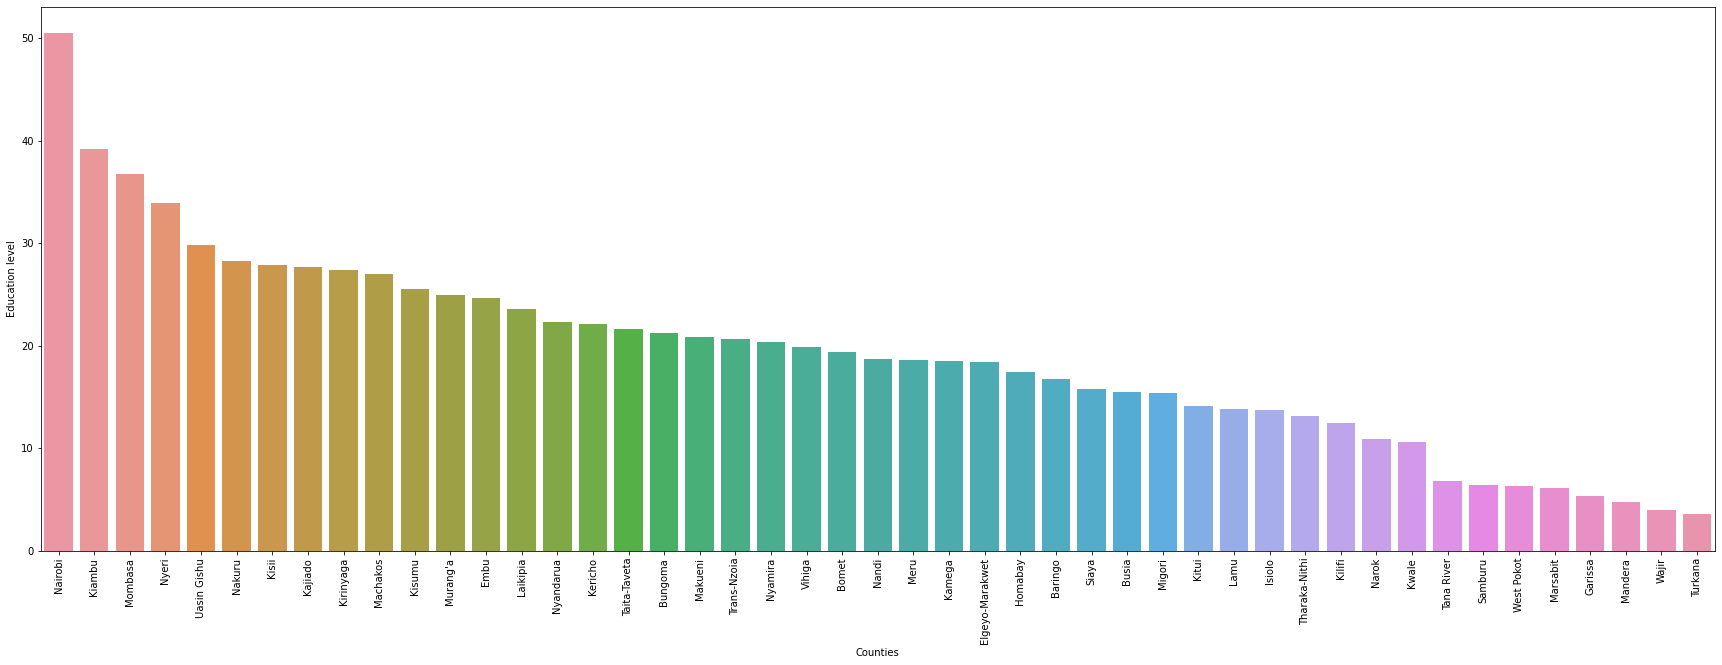

In [52]:
# Education level:  Percent Reached Secondary school or higher
plt.figure(figsize = (30,10))
EL = county_data[['County','Education_level']].sort_values('Education_level', 
                                                           ascending = False)
ax = sns.barplot(x='County', y='Education_level', data= EL)
ax.set(xlabel = 'Counties', ylabel= 'Education level')
plt.xticks(rotation=90)
plt.show()

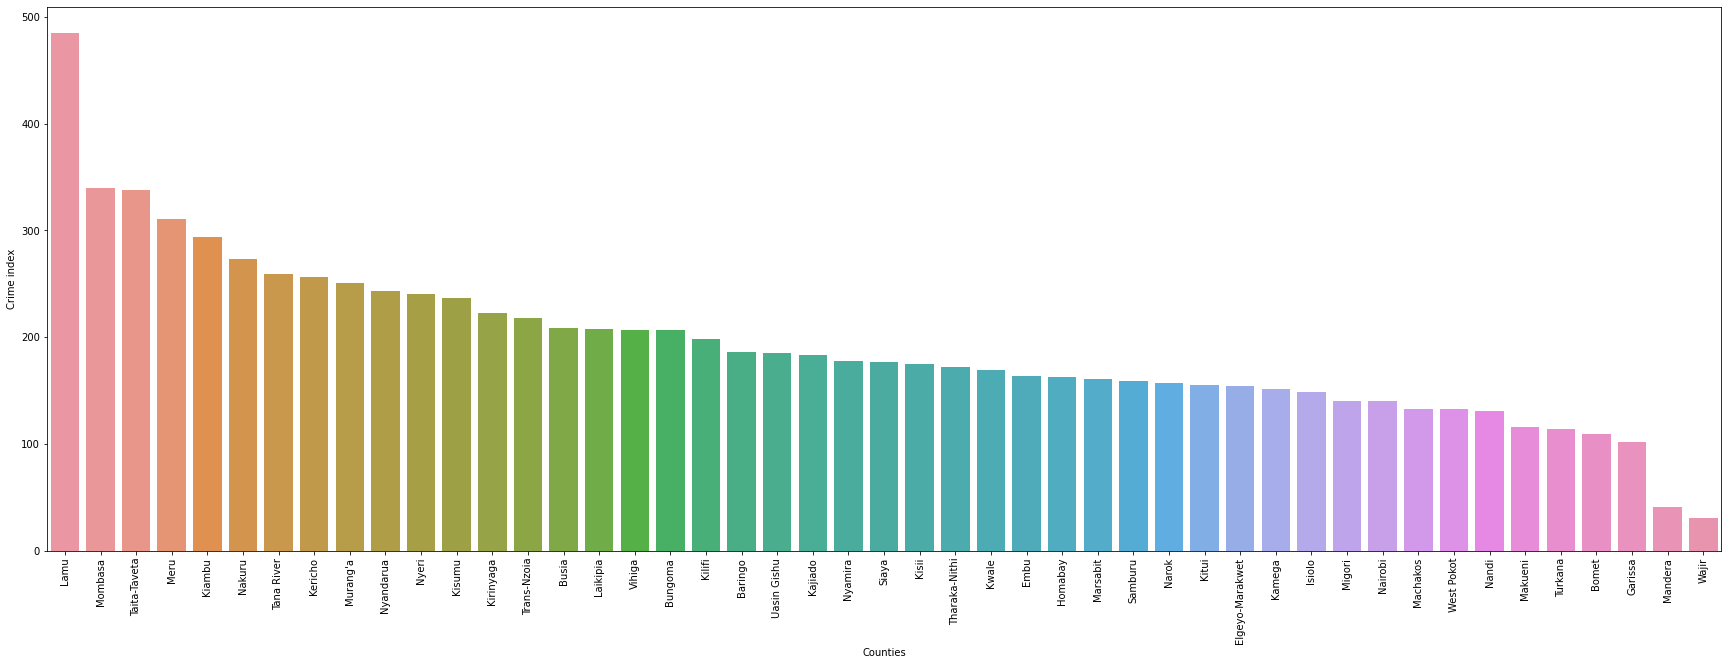

In [53]:
# Crime index:systematic, quantitative results about crime per 100,000 people
plt.figure(figsize = (30,10))
CR = county_data[['County','Crime_index']].sort_values('Crime_index', 
                                                       ascending = False)
ax = sns.barplot(x='County', y='Crime_index', data= CR)
ax.set(xlabel = 'Counties', ylabel= 'Crime index')
plt.xticks(rotation=90)
plt.show()

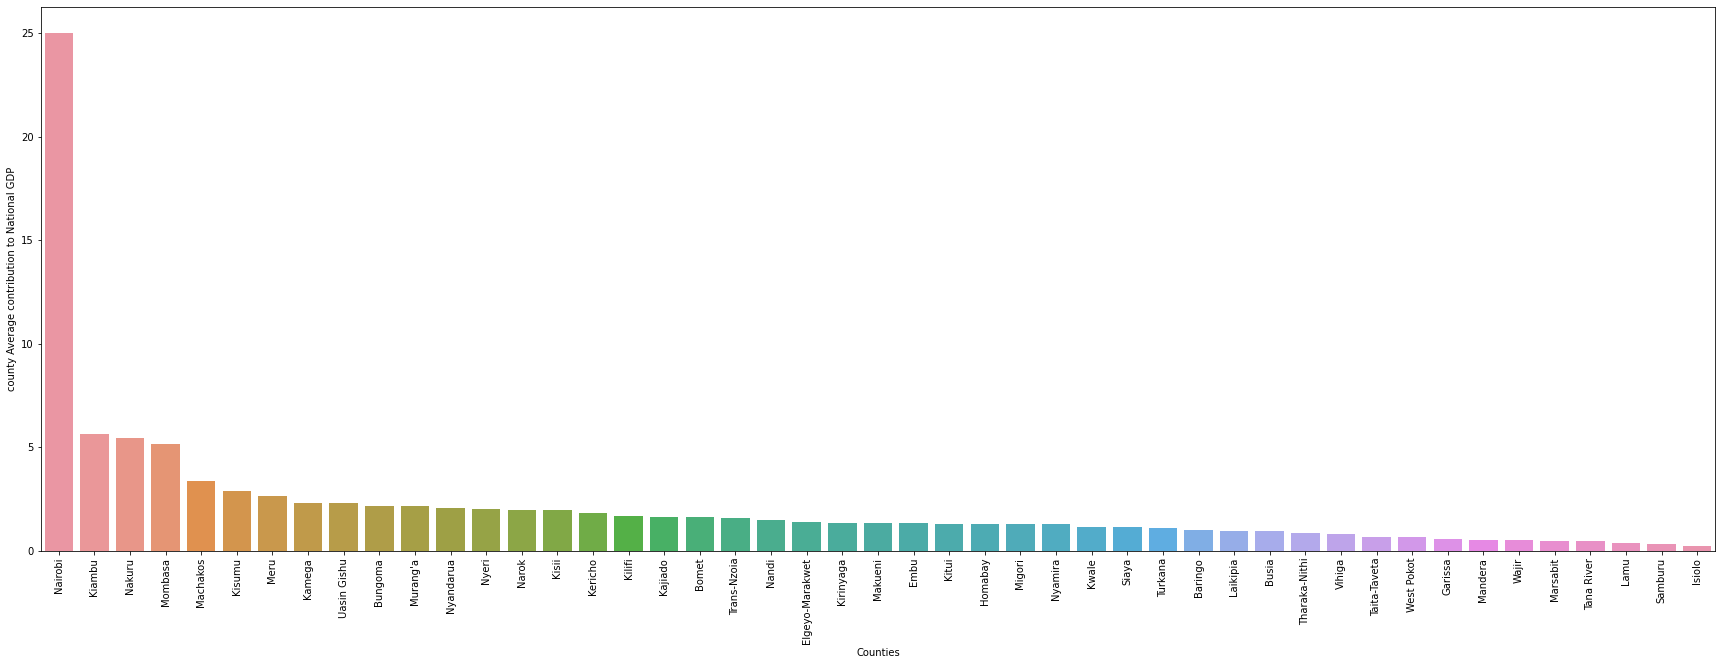

In [54]:
# Average GDP: percentage county contribution to National GDP
plt.figure(figsize = (30,10))
AGDP = county_data[['County','Average_contribution_GDP']].sort_values('Average_contribution_GDP', ascending = False)
ax = sns.barplot(x='County', y='Average_contribution_GDP', data= AGDP)
ax.set(xlabel = 'Counties', ylabel= 'county Average contribution to National GDP')
plt.xticks(rotation=90)
plt.show()

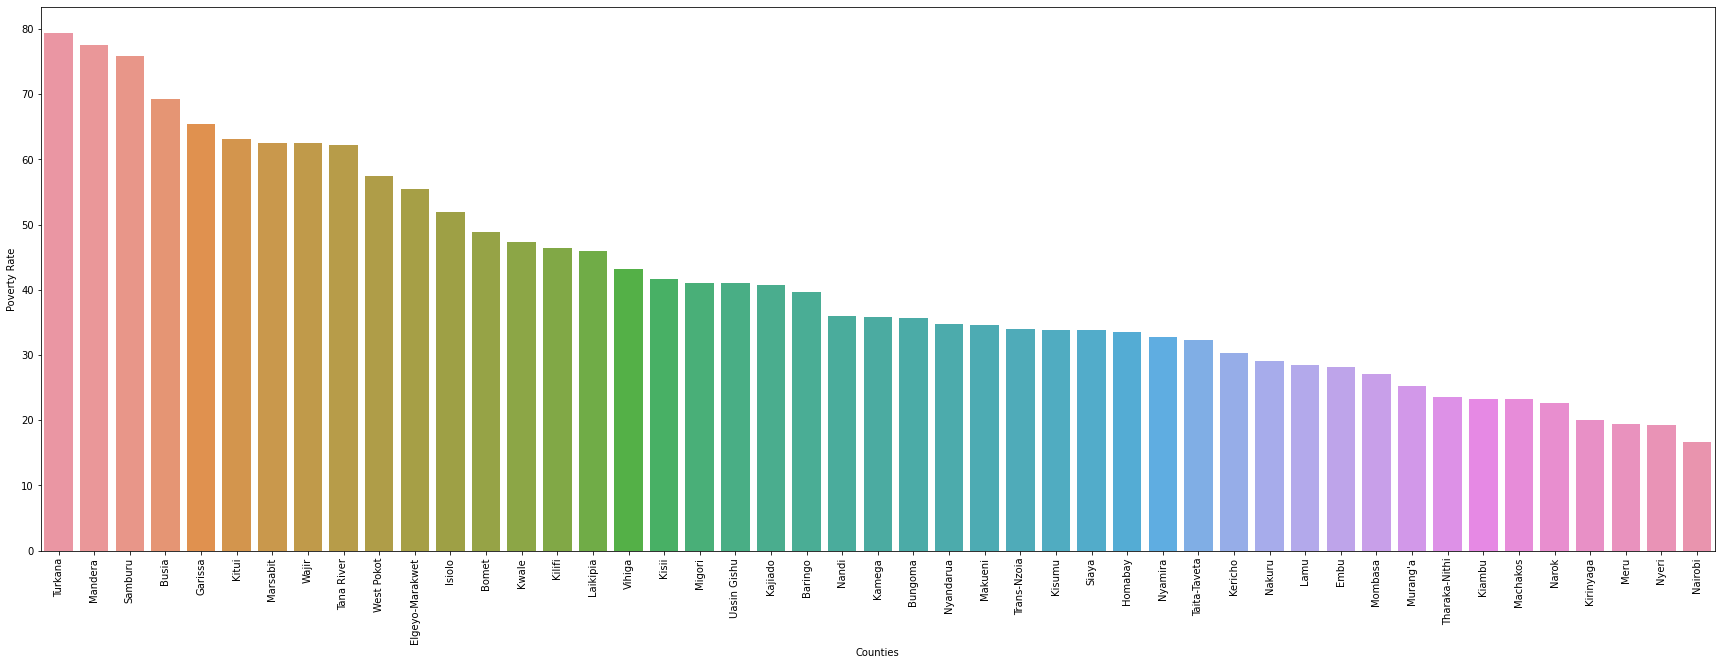

In [55]:
# Poverty Rate: ratio of the number of people (in a given age group) whose income falls below the poverty line
plt.figure(figsize = (30,10))
PR = county_data[['County','Poverty_Rate']].sort_values('Poverty_Rate', ascending = False)
ax = sns.barplot(x='County', y='Poverty_Rate', data= PR)
ax.set(xlabel = 'Counties', ylabel= 'Poverty Rate')
plt.xticks(rotation=90)
plt.show()

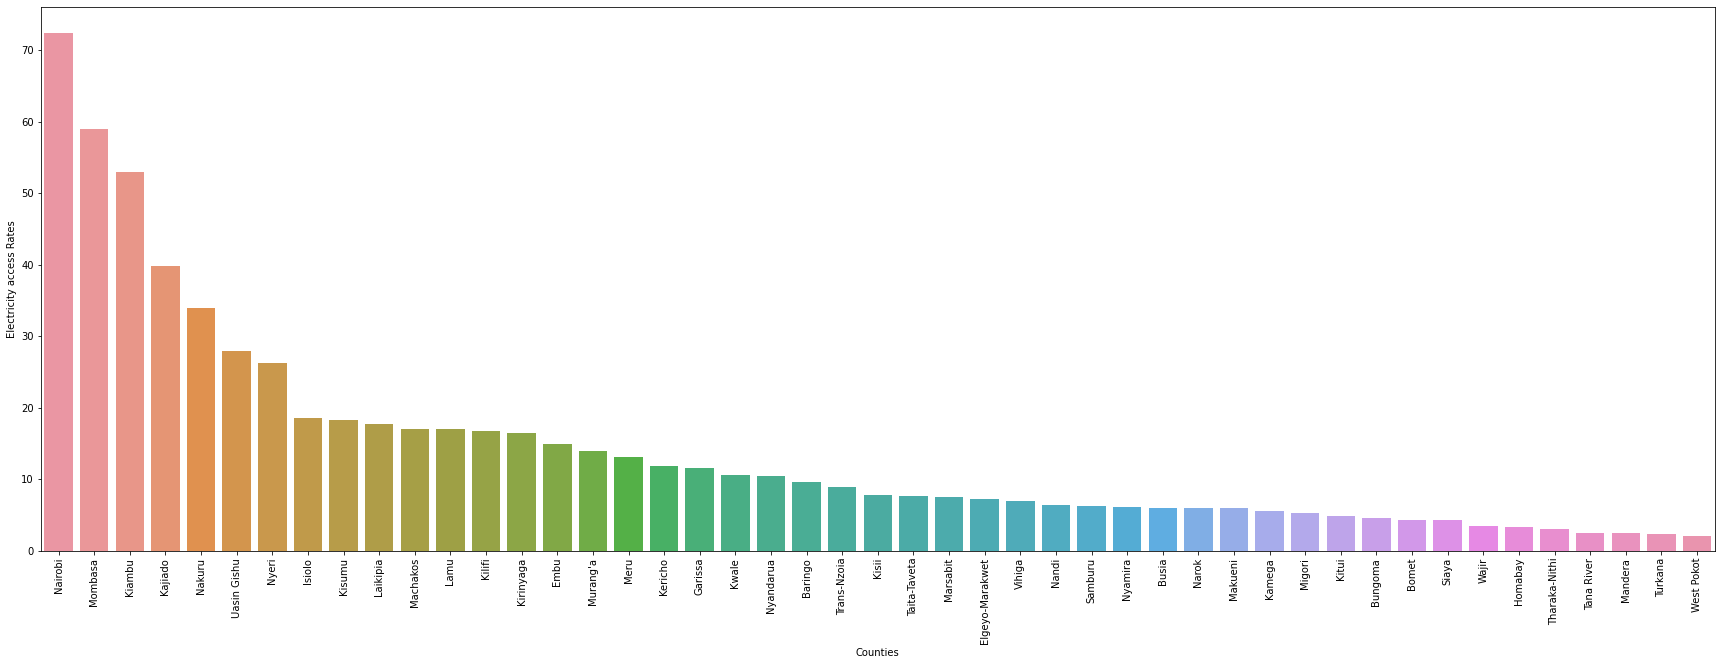

In [56]:
# Electricity access Rates: percentage of population with access to electricity.
plt.figure(figsize = (30,10))
EAR = county_data[['County','Electricity_access']].sort_values('Electricity_access', ascending = False)
ax = sns.barplot(x='County', y='Electricity_access', data= EAR)
ax.set(xlabel = 'Counties', ylabel= 'Electricity access Rates')
plt.xticks(rotation=90)
plt.show()

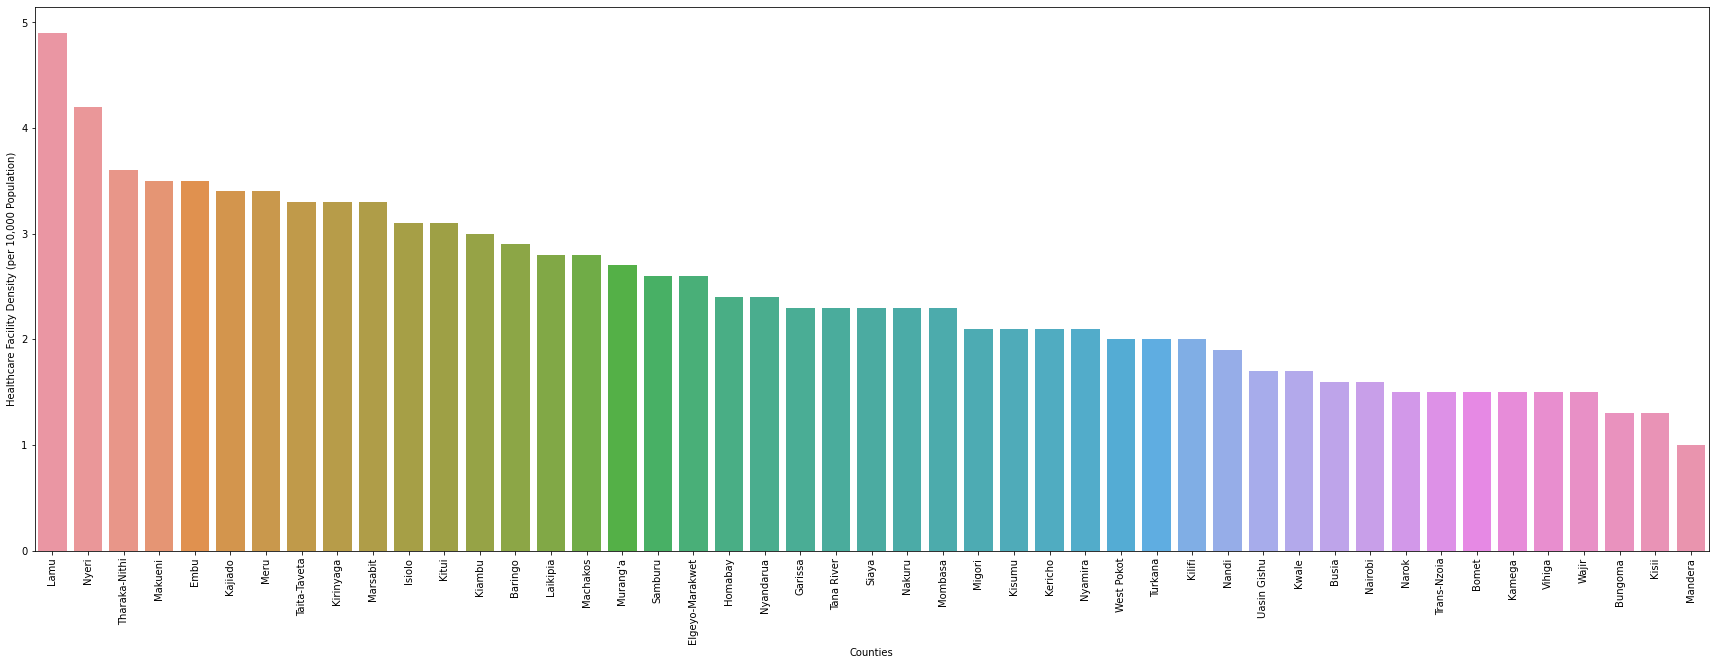

In [57]:
# Healthcare Facility Density: places that provide health care per 10,000 Population
plt.figure(figsize = (30,10))
HFD = county_data[['County','Healthcare_Facility_Density']].sort_values('Healthcare_Facility_Density', 
                                                                                                ascending = False)
ax = sns.barplot(x='County', y='Healthcare_Facility_Density', data= HFD)
ax.set(xlabel = 'Counties', ylabel= 'Healthcare Facility Density (per 10,000 Population)')
plt.xticks(rotation=90)
plt.show()

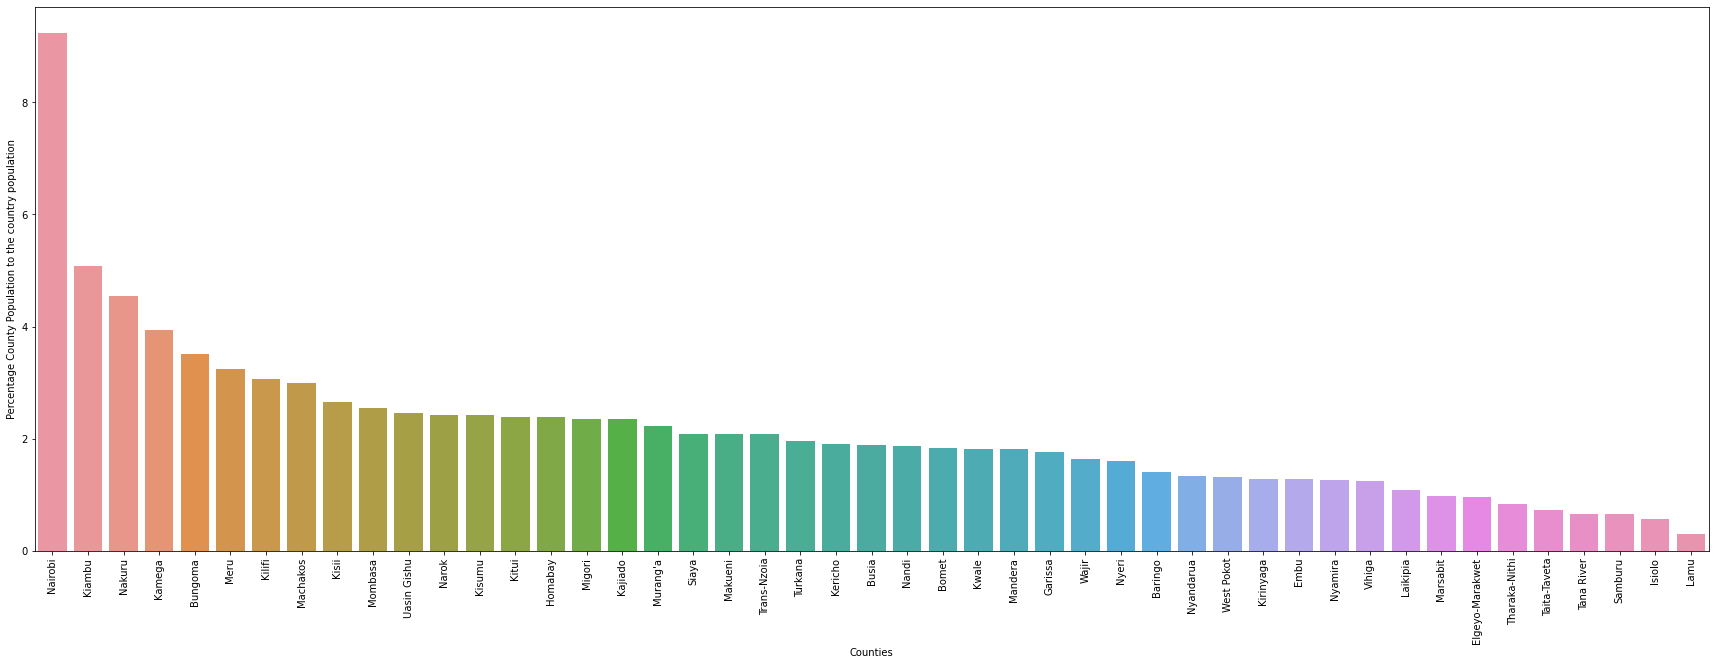

In [58]:
# Percentage County Population: Population of the people at the county level expressed as a percentage 
plt.figure(figsize = (30,10))
cp = county_data[['County','County_Population']].sort_values('County_Population', 
                                                                         ascending = False)
ax = sns.barplot(x='County', y='County_Population', data= cp)
ax.set(xlabel = 'Counties', ylabel= 'Percentage County Population to the country population')
plt.xticks(rotation=90)
plt.show()

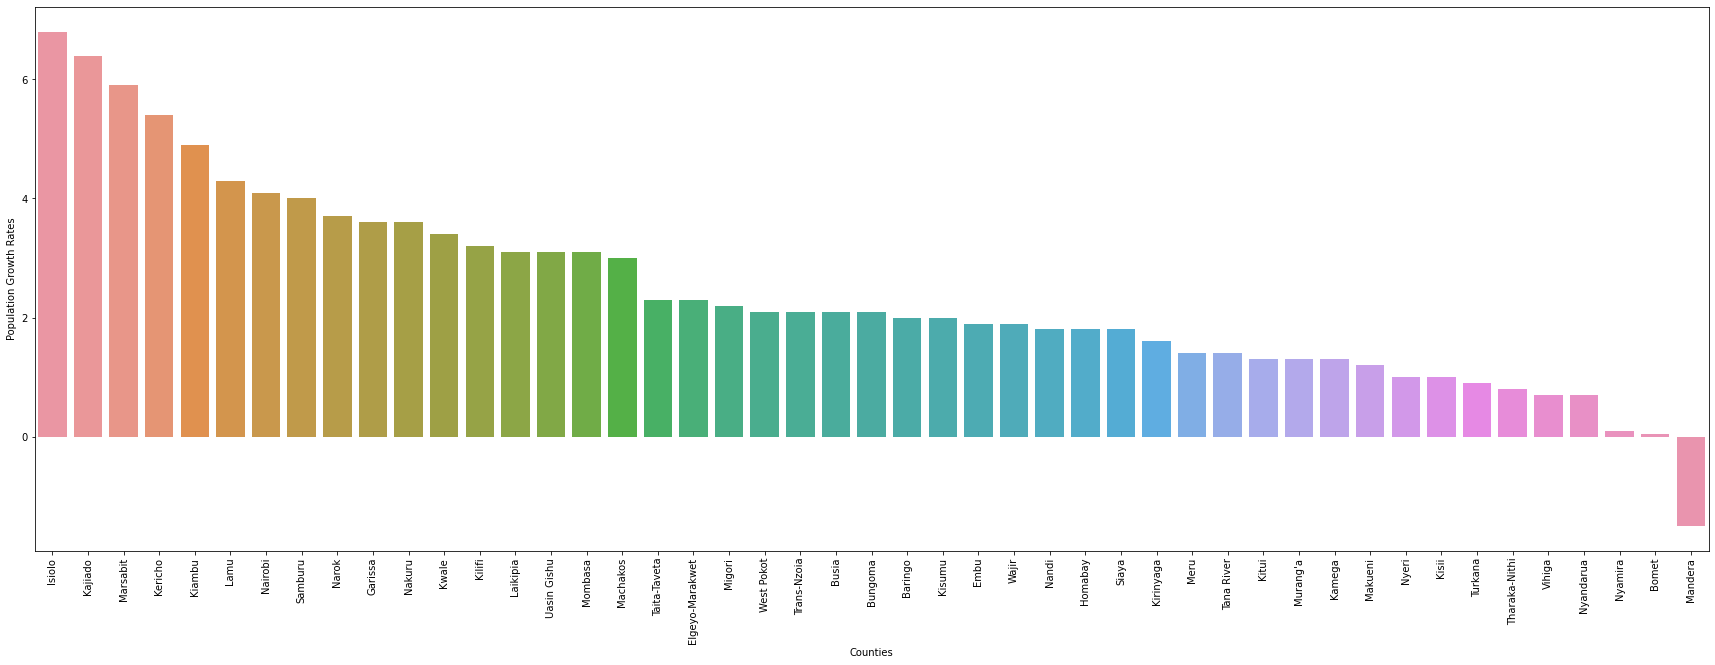

In [59]:
# Population Growth Rates: increase in the number of people in a population or dispersed group.
plt.figure(figsize = (30,10))
PGR = county_data[['County','Growth_Rates']].sort_values('Growth_Rates', 
                                                                    ascending = False)
ax = sns.barplot(x='County', y='Growth_Rates', data= PGR)
ax.set(xlabel = 'Counties', ylabel= 'Population Growth Rates')
plt.xticks(rotation=90)
plt.show()

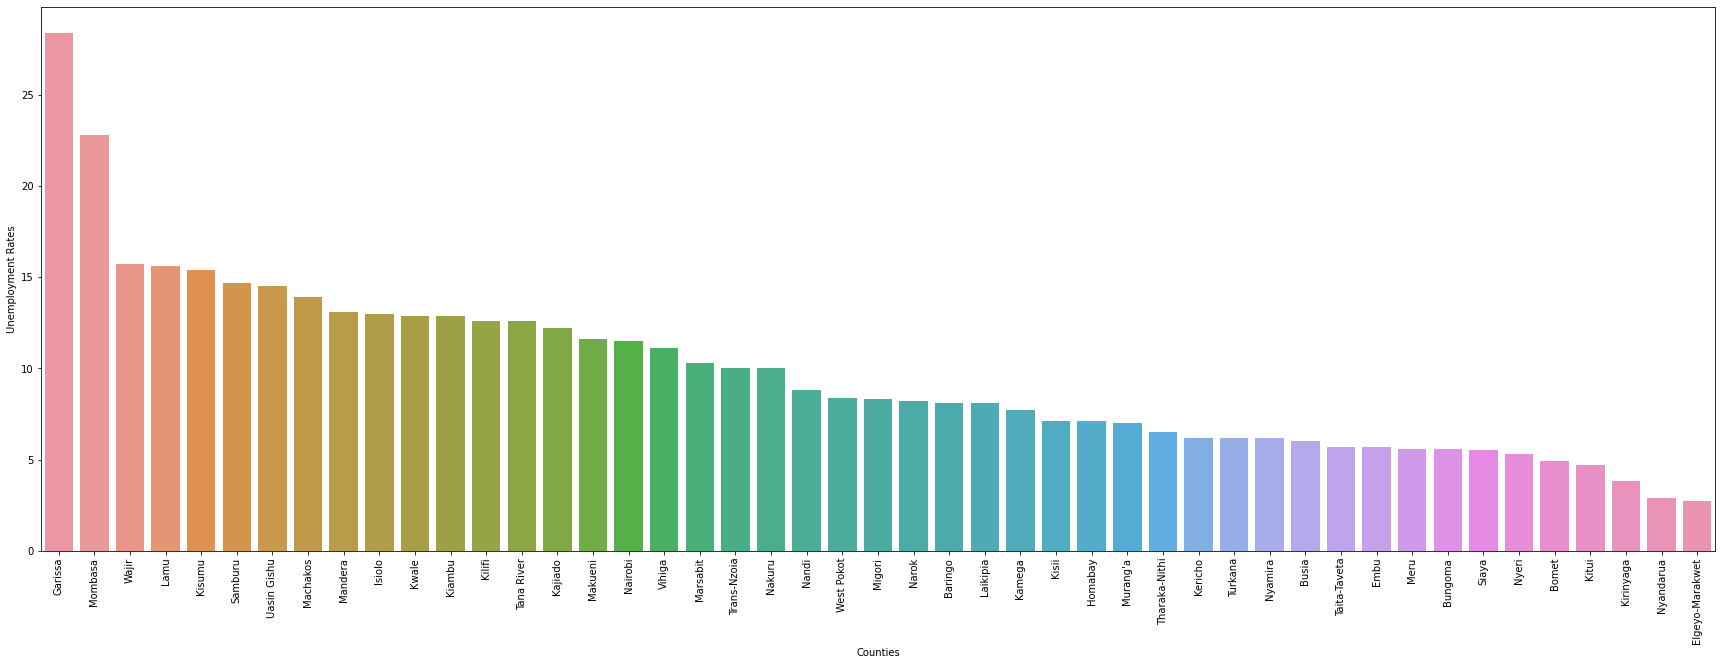

In [60]:
# Unemployment rates: people of working age who are without work, are available for work, 
# and have taken specific steps to find work
plt.figure(figsize = (30,10))
pop = county_data[['County','Unemployment_Rate']].sort_values('Unemployment_Rate', ascending = False)
ax = sns.barplot(x='County', y='Unemployment_Rate', data= pop)
ax.set(xlabel = 'Counties', ylabel= 'Unemployment Rates')
plt.xticks(rotation=90)
plt.show()

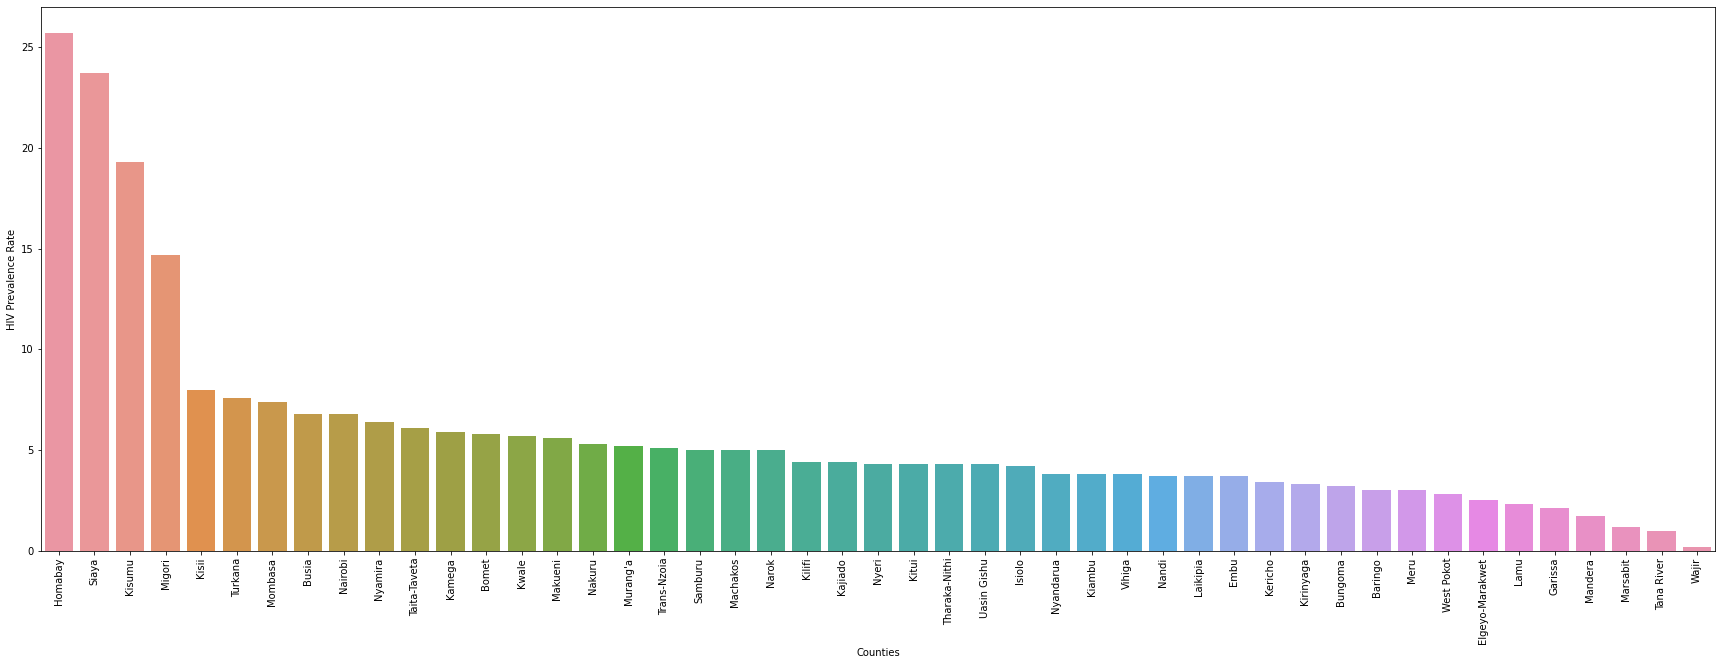

In [61]:
# HIV Prevalence Rate: Percentage of people living with HIV.
plt.figure(figsize = (30,10))
HIV = county_data[['County','HIV_Prevalence']].sort_values('HIV_Prevalence', ascending = False)
ax = sns.barplot(x='County', y='HIV_Prevalence', data= HIV)
ax.set(xlabel = 'Counties', ylabel= 'HIV Prevalence Rate')
plt.xticks(rotation=90)
plt.show()

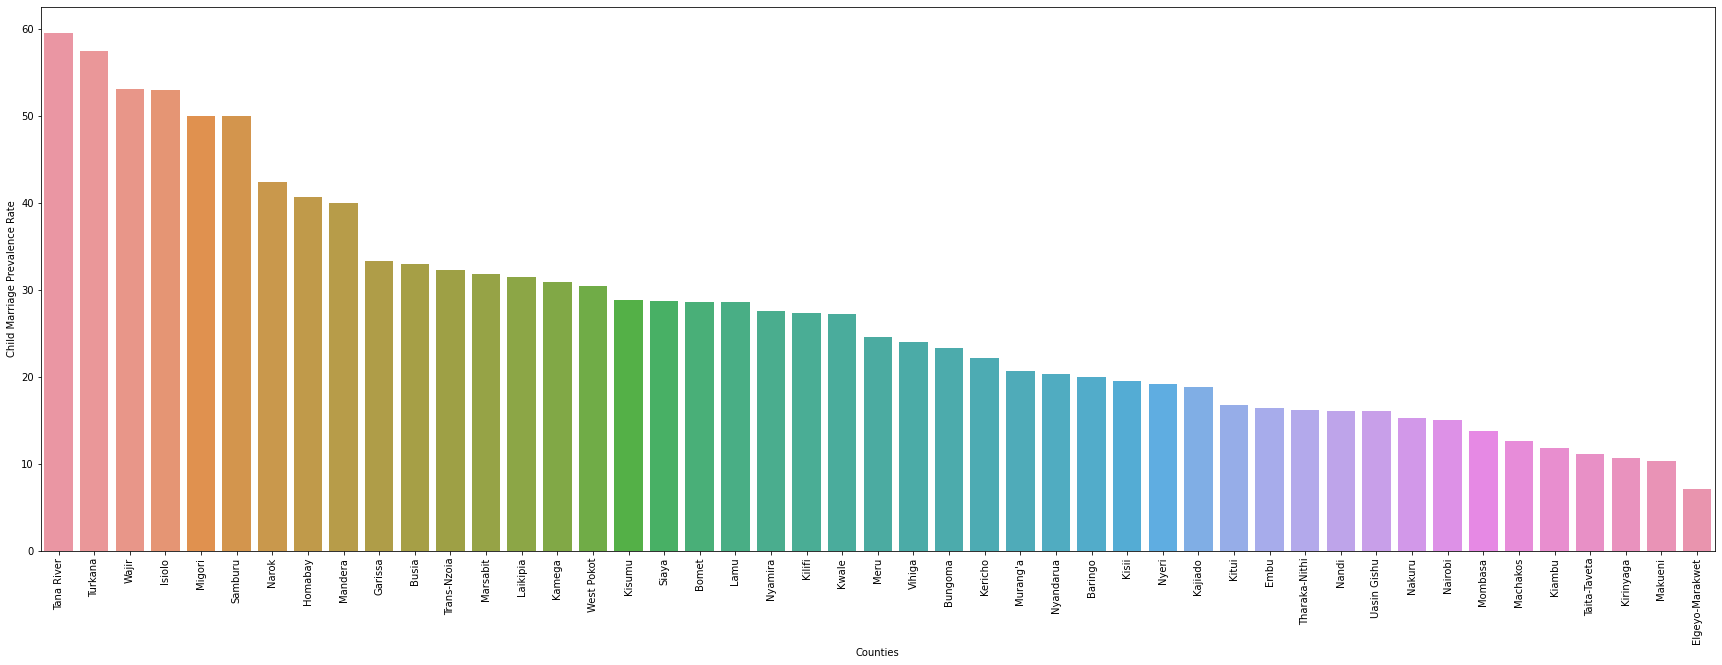

In [62]:
# Child Marriage Prevalence Rate: any formal marriage or informal union between a child under the age of 18 
# and an adult or another child
plt.figure(figsize = (30,10))
CMPR = county_data[['County','Child_Marriage_Prevalence']].sort_values('Child_Marriage_Prevalence', 
                                                                           ascending = False)
ax = sns.barplot(x='County', y='Child_Marriage_Prevalence', data= CMPR)
ax.set(xlabel = 'Counties', ylabel= 'Child Marriage Prevalence Rate')
plt.xticks(rotation=90)
plt.show()

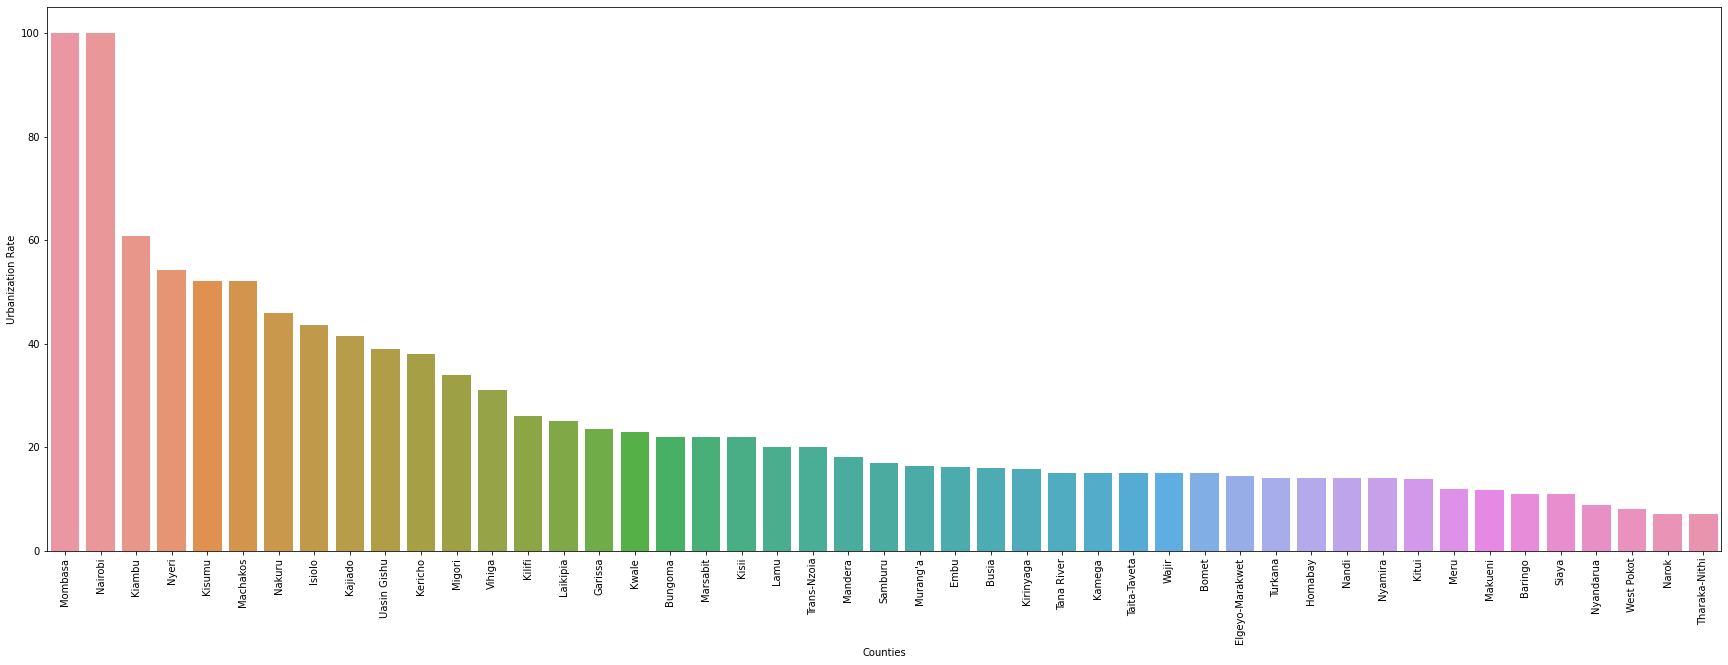

In [63]:
# Urbanization Rate: Percentage of the total population living in urban areas
plt.figure(figsize = (30,10))
UB = county_data[['County','Urbanization']].sort_values('Urbanization', ascending = False)
ax = sns.barplot(x='County', y='Urbanization', data= UB)
ax.set(xlabel = 'Counties', ylabel= 'Urbanization Rate')
plt.xticks(rotation=90)
plt.show()

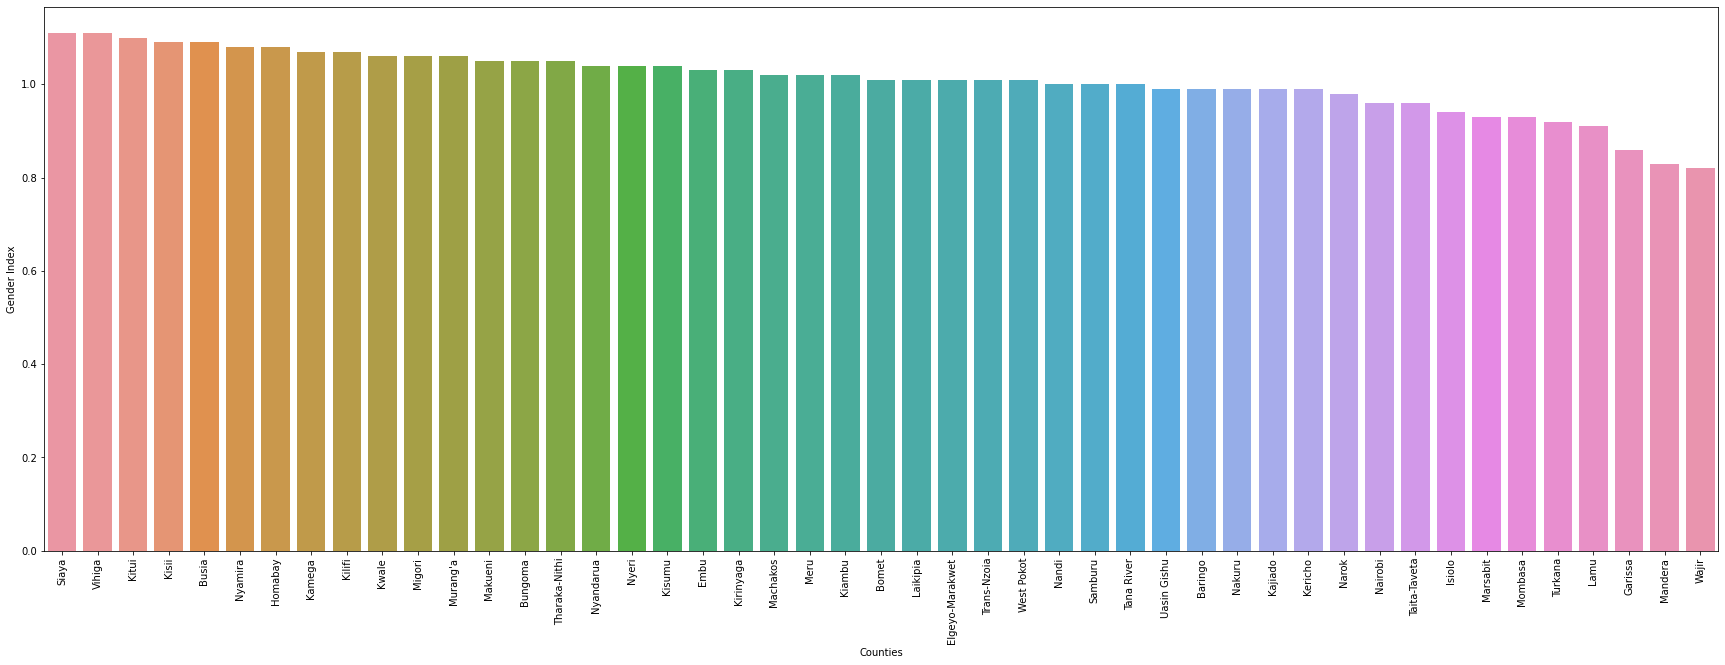

In [64]:
# Gender Index: The GI is a composite measure, reflecting inequality in achievements between women and men in 
# three dimensions: reproductive health, empowerment and the labour market
plt.figure(figsize = (30,10))
Gender_index = county_data[['County','Gender_Index']].sort_values('Gender_Index', ascending = False)
ax = sns.barplot(x='County', y='Gender_Index', data= Gender_index)
ax.set(xlabel = 'Counties', ylabel= 'Gender Index')
plt.xticks(rotation=90)
plt.show()

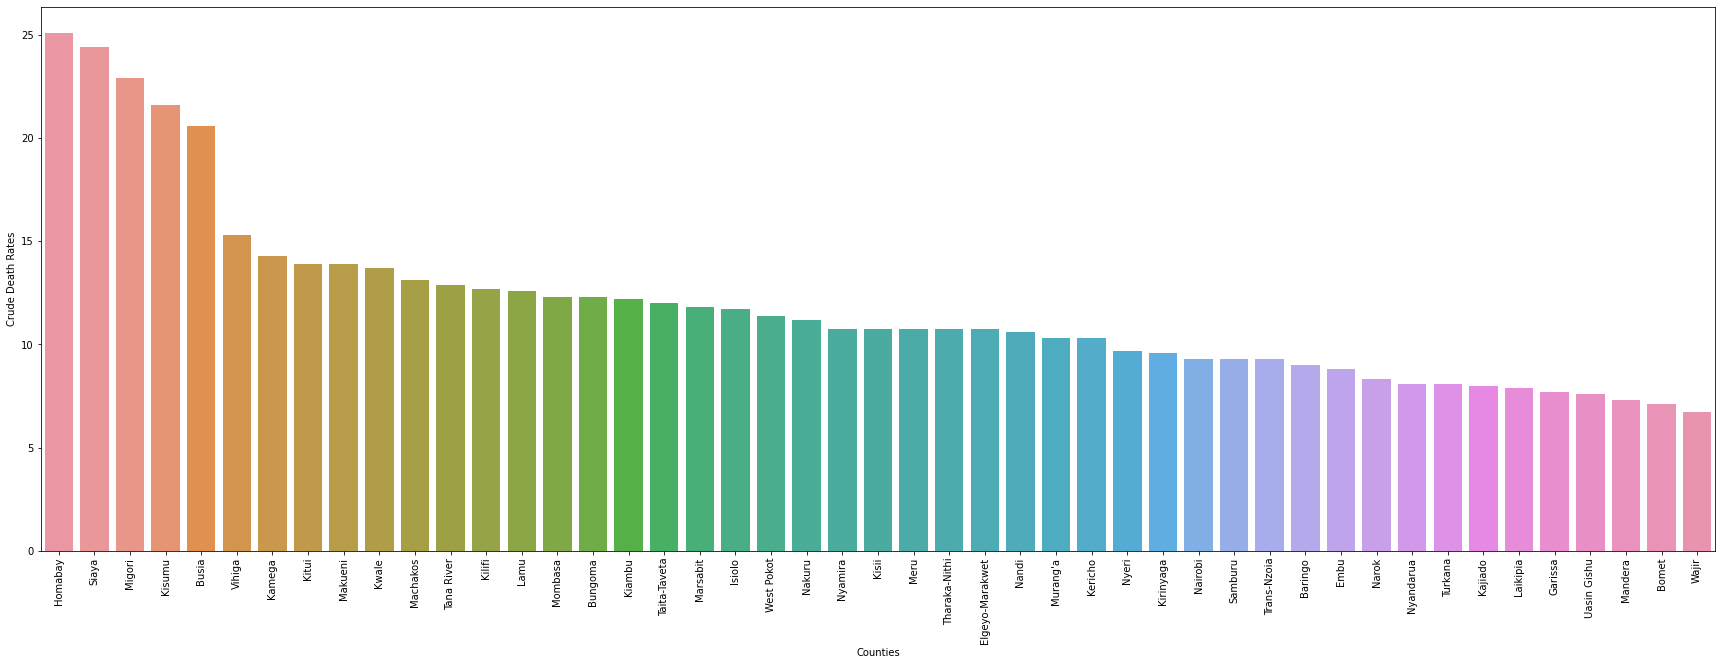

In [65]:
# Crude Death Rates: the number of deaths in a given period divided by the population exposed to risk of death in that period.
plt.figure(figsize = (30,10))
CDR = county_data[['County','Death_Rates']].sort_values('Death_Rates', ascending = False)
ax = sns.barplot(x='County', y='Death_Rates', data= CDR)
ax.set(xlabel = 'Counties', ylabel= 'Crude Death Rates')
plt.xticks(rotation=90)
plt.show()

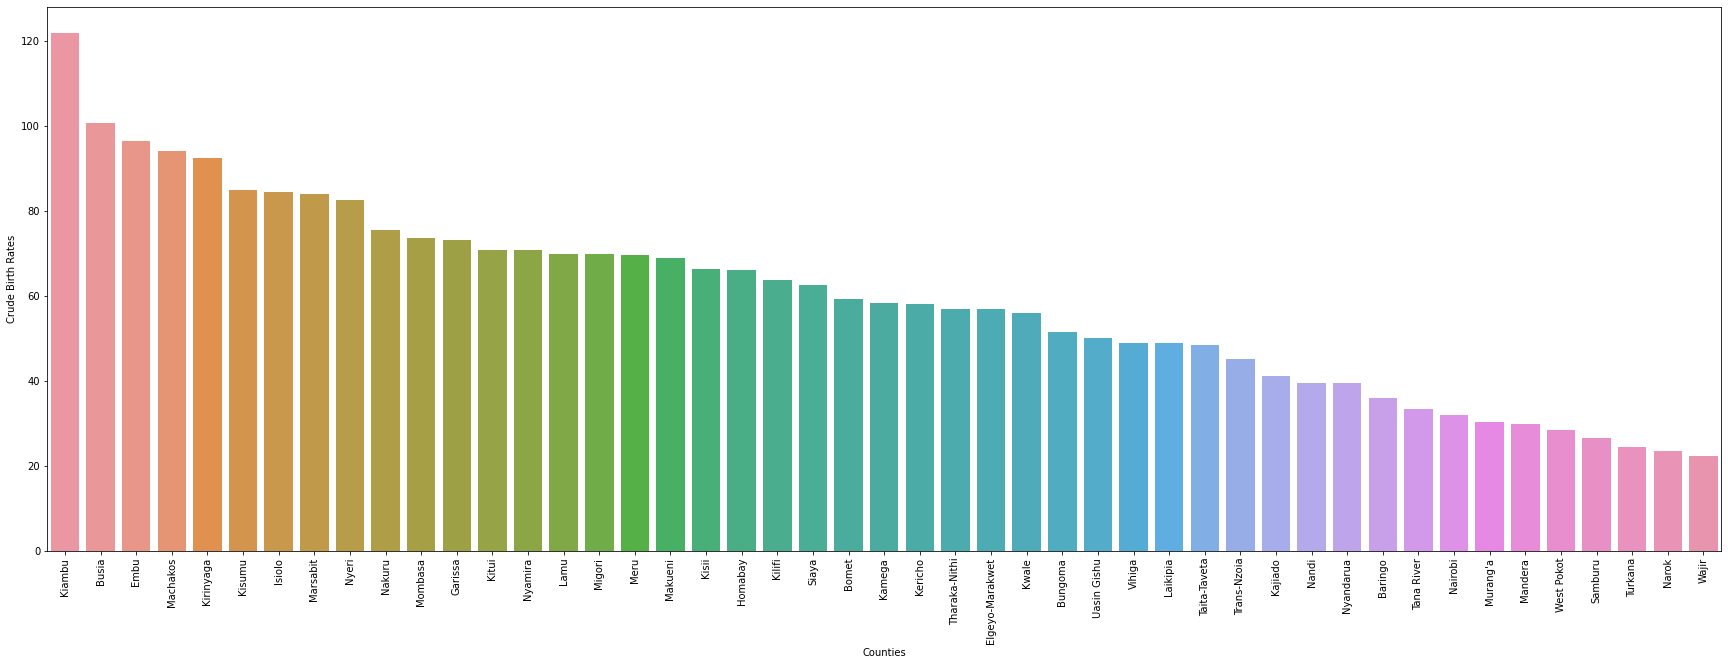

In [66]:
# Crude Birth Rates: number of live births occurring during the year, per 1,000 population estimated at midyear
plt.figure(figsize = (30,10))
CBR = county_data[['County','Birth_Rate']].sort_values('Birth_Rate', ascending = False)
ax = sns.barplot(x='County', y='Birth_Rate', data= CBR)
ax.set(xlabel = 'Counties', ylabel= 'Crude Birth Rates')
plt.xticks(rotation=90)
plt.show()

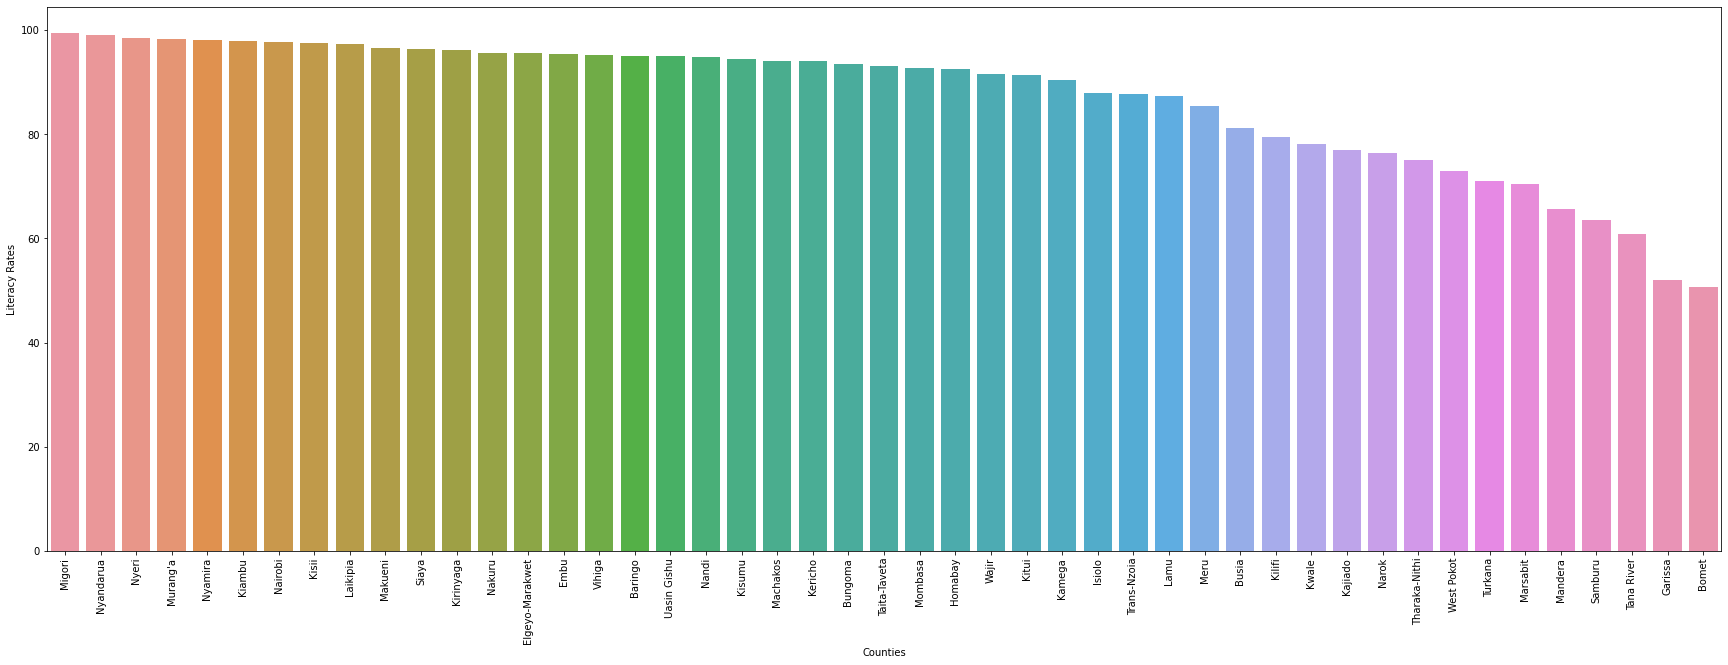

In [67]:
# Literacy Rates: 
plt.figure(figsize = (30,10))
LR = county_data[['County','Literacy_Rates']].sort_values('Literacy_Rates', ascending = False)
ax = sns.barplot(x='County', y='Literacy_Rates', data= LR)
ax.set(xlabel = 'Counties', ylabel= 'Literacy Rates')
plt.xticks(rotation=90)
plt.show()

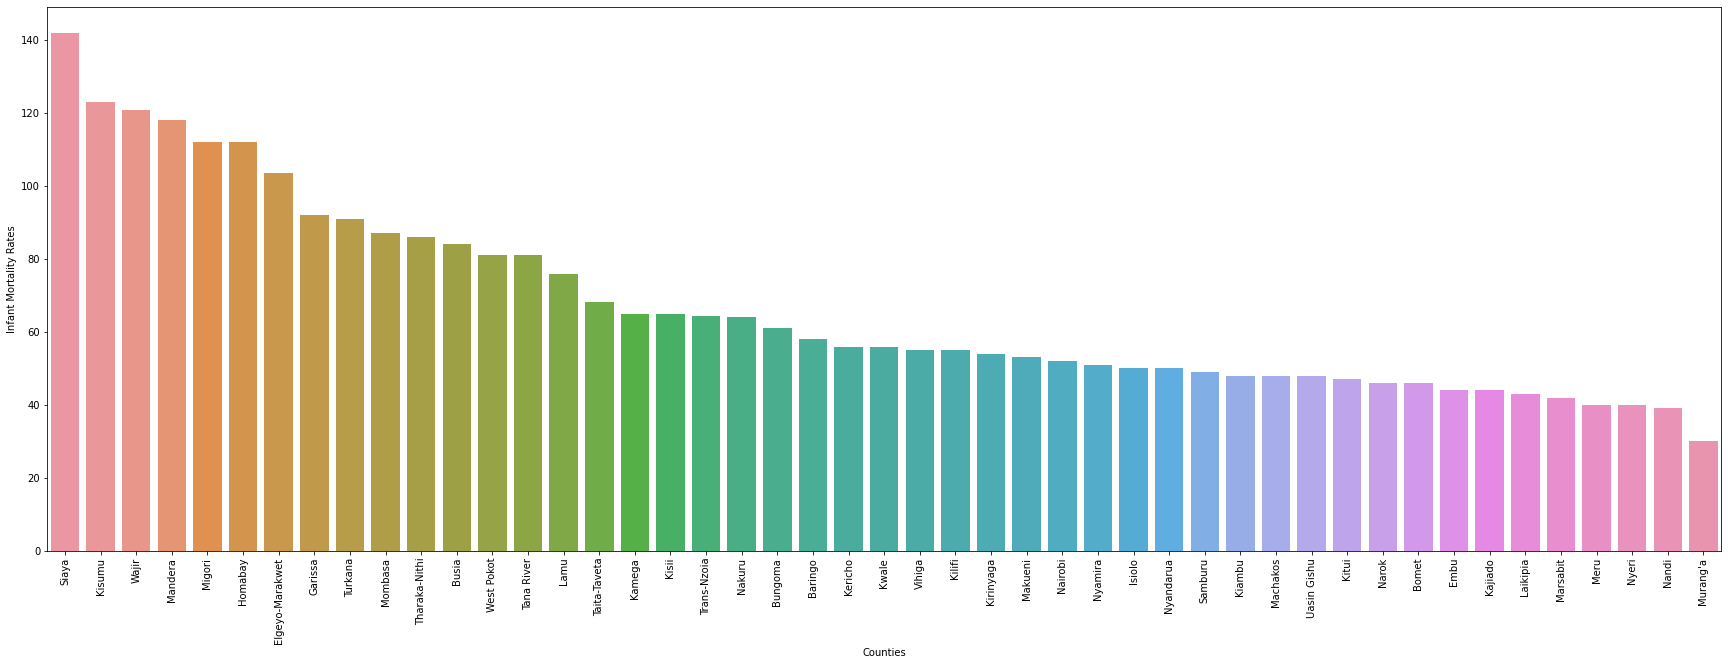

In [68]:
plt.figure(figsize = (30,10))
IMR = county_data[['County','Infant_Mortality']].sort_values('Infant_Mortality', 
                                                                  ascending = False)
ax = sns.barplot(x='County', y='Infant_Mortality', data= IMR)
ax.set(xlabel = 'Counties', ylabel= 'Infant Mortality Rates')

plt.xticks(rotation=90)
plt.show()

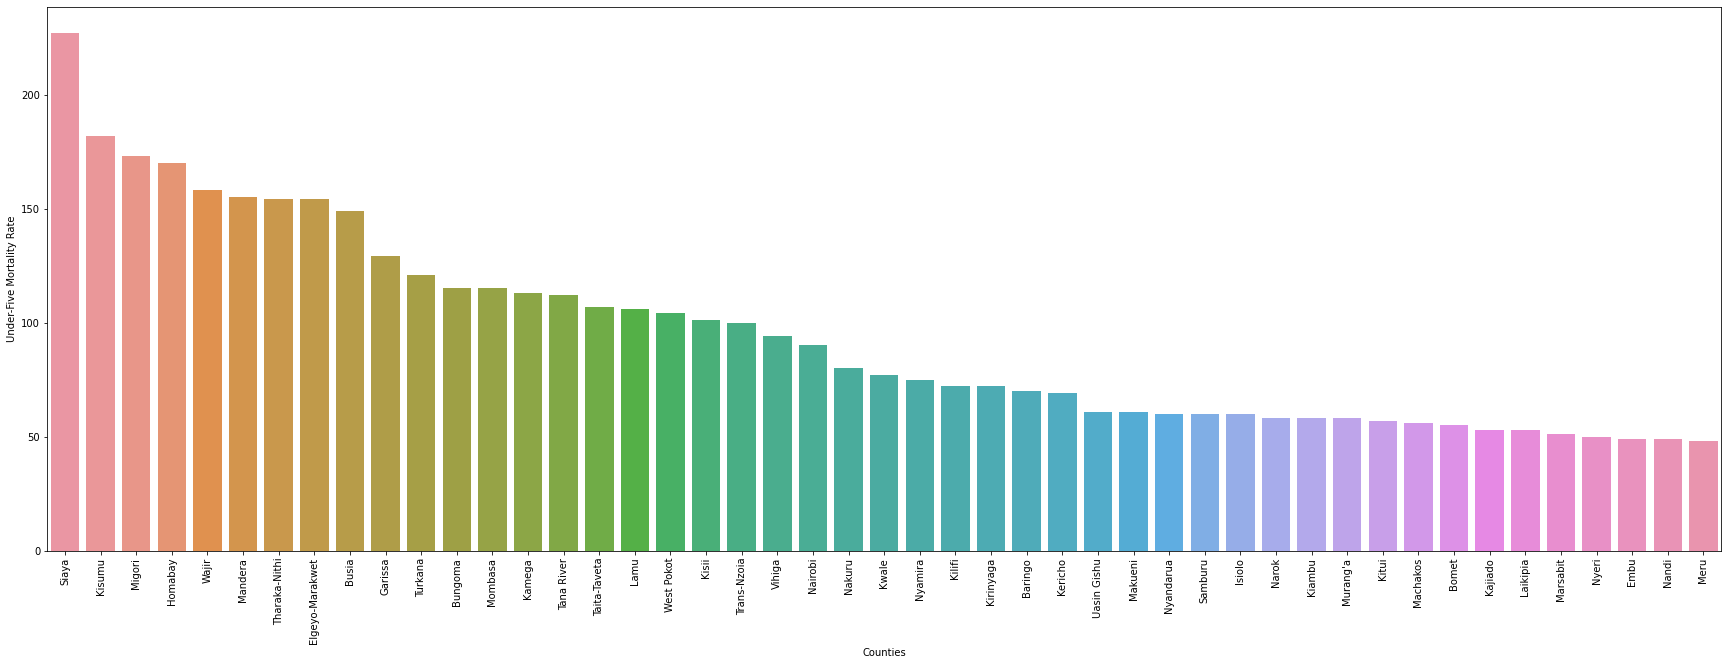

In [69]:
# Under-Five Mortality Rate: is the death of young children under the age of 5.
plt.figure(figsize = (30,10))
UMR = county_data[['County','Under_Five_Mortality']].sort_values('Under_Five_Mortality', 
                                                                      ascending = False)
ax = sns.barplot(x='County', y='Under_Five_Mortality', data= UMR)
ax.set(xlabel = 'Counties', ylabel= 'Under-Five Mortality Rate')
plt.xticks(rotation=90)
plt.show()

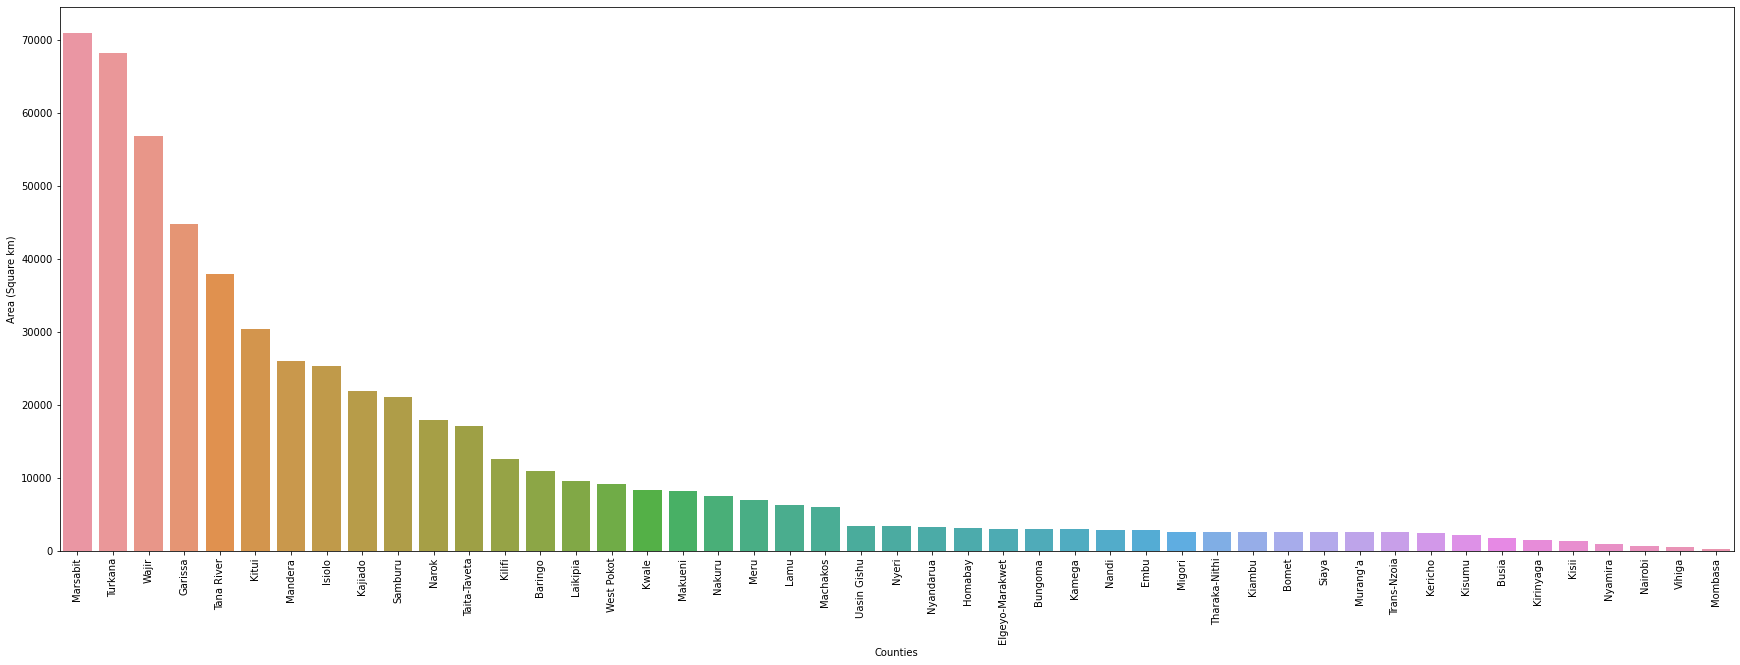

In [70]:
# Area (Square km): The size of the county
plt.figure(figsize = (30,10))
Area = county_data[['County','Area']].sort_values('Area', ascending = False)
ax = sns.barplot(x='County', y='Area', data= Area)
ax.set(xlabel = 'Counties', ylabel= 'Area (Square km)')
plt.xticks(rotation=90)
plt.show()

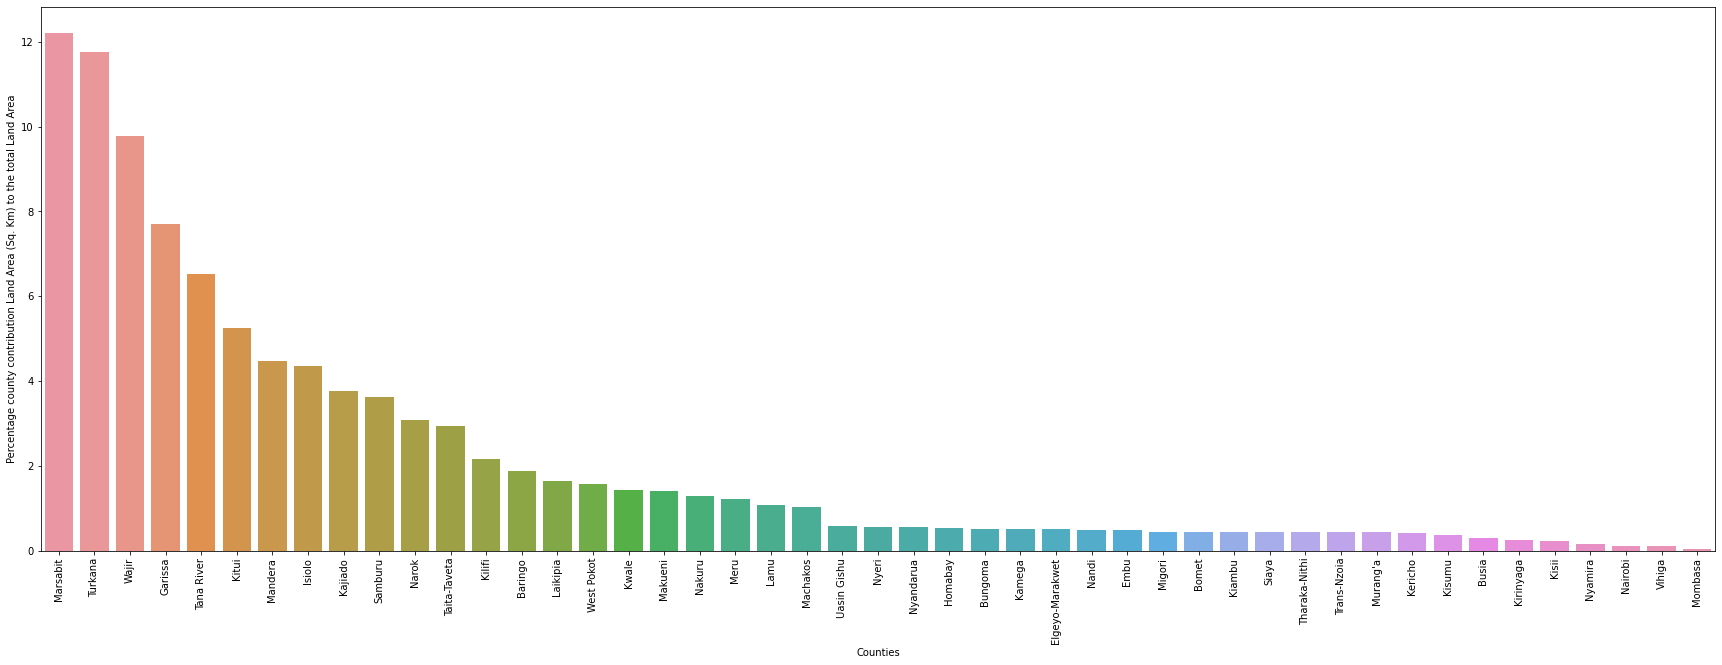

In [71]:
# Area (Square km): The size of the county
plt.figure(figsize = (30,10))
Area = county_data[['County','Land_size']].sort_values('Land_size', ascending = False)
ax = sns.barplot(x='County', y='Land_size', data= Area)
ax.set(xlabel = 'Counties', ylabel= 'Percentage county contribution Land Area (Sq. Km) to the total Land Area')
plt.xticks(rotation=90)
plt.show()

In [72]:
# We will have a look at the performance of 5 counties for each factor.

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

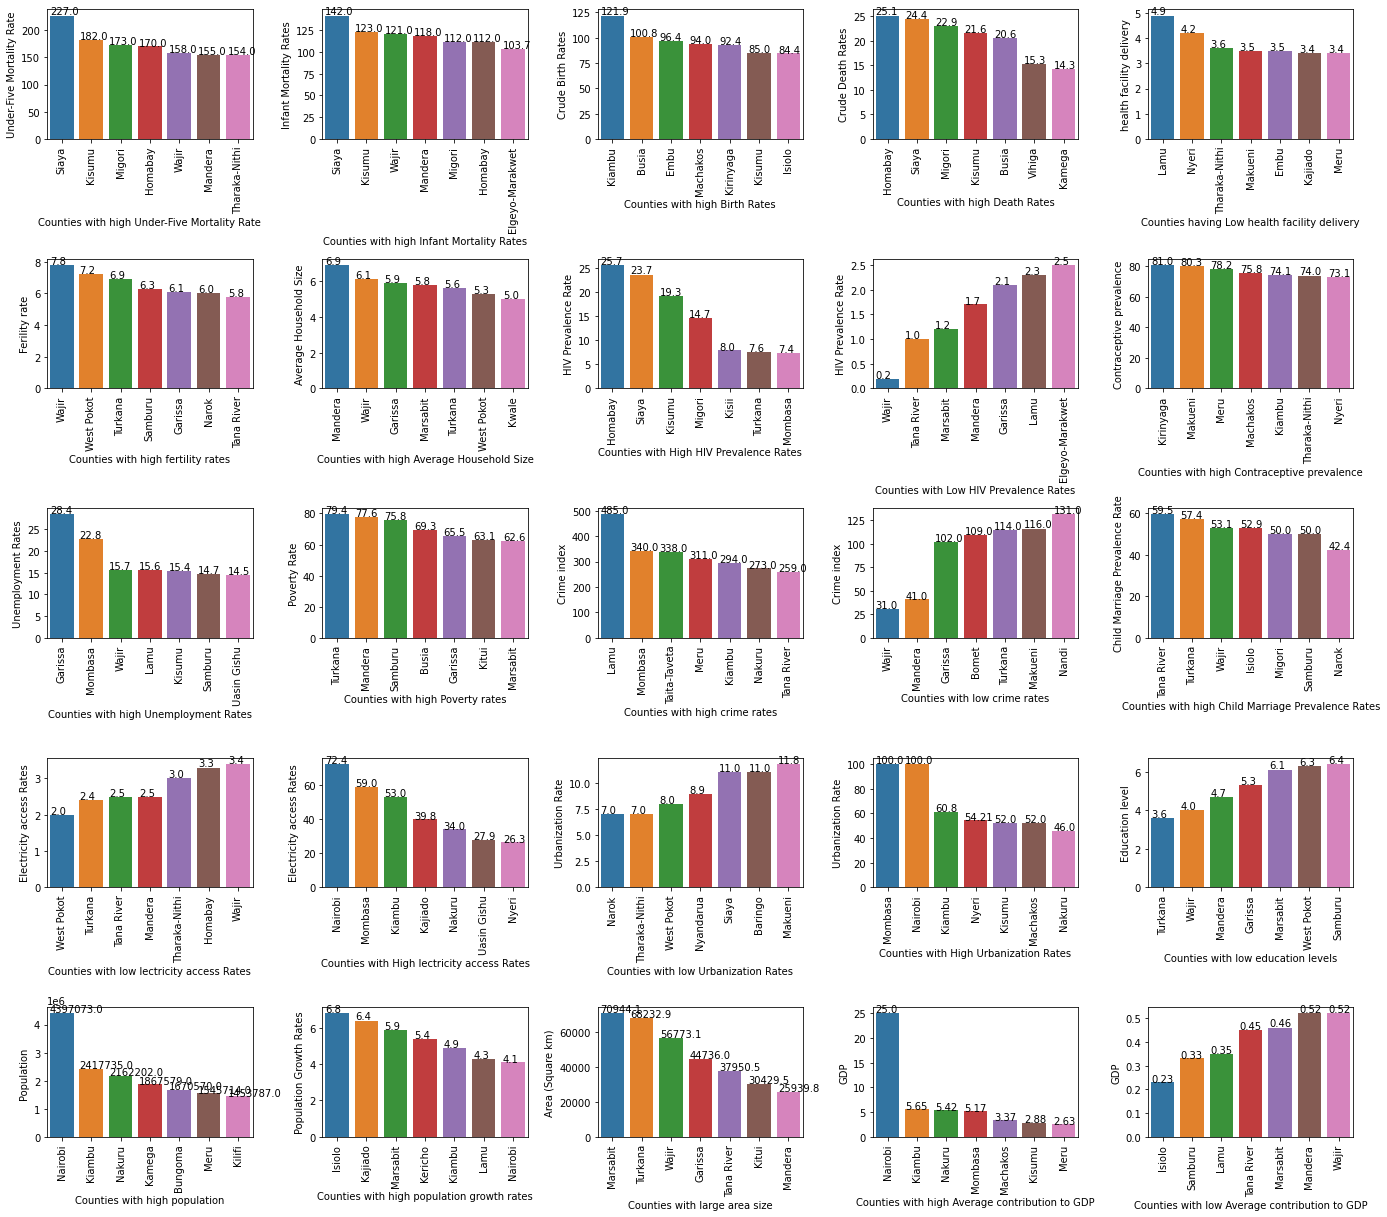

In [277]:
fig, axs = plt.subplots(5,5,figsize = (19,17))

# Under-Five Mortality Rate: is the death of young children under the age of 5 per 1000 live births.
UMR = county_data[['County','Under_Five_Mortality']].sort_values('Under_Five_Mortality', 
                                                                      ascending = False).head(7)
ax = sns.barplot(x='County', y='Under_Five_Mortality', data= UMR, ax = axs[0,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
ax.set(xlabel = 'Counties with high Under-Five Mortality Rate', ylabel= 'Under-Five Mortality Rate')



# Infant Mortality Rate: is the death of young children under the age of 1.
IMR = county_data[['County','Infant_Mortality']].sort_values('Infant_Mortality', 
                                                                  ascending = False).head(7)
ax = sns.barplot(x='County', y='Infant_Mortality', data= IMR, ax = axs[0,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with high Infant Mortality Rates', ylabel= 'Infant Mortality Rates')




# Crude Birth Rates: number of live births occurring during the year, per 1,000 population estimated at midyear
CBR = county_data[['County','Birth_Rate']].sort_values('Birth_Rate', 
                                                             ascending = False).head(7)
ax = sns.barplot(x='County', y='Birth_Rate', data= CBR, ax = axs[0,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with high Birth Rates', ylabel= 'Crude Birth Rates')



# Crude Death Rates: the number of deaths in a given period divided by the population exposed to risk of death in that period.
CDR = county_data[['County','Death_Rates']].sort_values('Death_Rates', 
                                                              ascending = False).head(7)
ax = sns.barplot(x='County', y='Death_Rates', data= CDR, ax = axs[0,3])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with high Death Rates', ylabel= 'Crude Death Rates')
#plt.title('Counties having high Crude Death Rates') 


# health facility delivery: percentage of babies delivered in a health facility delivery
HFD = county_data[['County','Healthcare_Facility_Density']].sort_values('Healthcare_Facility_Density', 
                                                                                                ascending = False).head(7)
ax = sns.barplot(x='County', y='Healthcare_Facility_Density', data= HFD, ax = axs[0,4])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties having Low health facility delivery', ylabel= 'health facility delivery')

# Ferility rate:  is the average number of children that would be born to a woman over her lifetime 
FR = county_data[['County','Fertility']].sort_values('Fertility', ascending = False).head(7)
ax = sns.barplot(x='County', y='Fertility', data= FR, ax = axs[1,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with high fertility rates', ylabel= 'Ferility rate')


# Average Household Size: Persons per household.
AHS = county_data[['County', 'Household_Size']].sort_values('Household_Size', 
                                                                    ascending = False).head(7)
ax = sns.barplot(x='County', y='Household_Size', data= AHS, ax = axs[1,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with high Average Household Size', ylabel= 'Average Household Size')
#plt.title('Counties having high Average Household Size')

# HIV Prevalence Rate: Percentage of people living with HIV.
HIV = county_data[['County','HIV_Prevalence']].sort_values('HIV_Prevalence', 
                                                                ascending = False).head(7)
ax = sns.barplot(x='County', y='HIV_Prevalence', data= HIV, ax = axs[1,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with High HIV Prevalence Rates', ylabel= 'HIV Prevalence Rate')

# HIV Prevalence Rate: Percentage of people living with HIV.
HIV = county_data[['County','HIV_Prevalence']].sort_values('HIV_Prevalence', 
                                                                ascending = True).head(7)
ax = sns.barplot(x='County', y='HIV_Prevalence', data= HIV, ax = axs[1,3])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with Low HIV Prevalence Rates', ylabel= 'HIV Prevalence Rate')
                                                            
                                                                    
# Contraceptive prevalence: the proportion of women who are currently using, 
# or whose sexual partner is currently using at least one method of contraception, regardless of the method being used.
CP = county_data[['County','Contraceptive_prevalence']].sort_values('Contraceptive_prevalence', 
                                                                    ascending = False).head(7)
ax = sns.barplot(x='County', y='Contraceptive_prevalence', data= CP, ax = axs[1,4])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with high Contraceptive prevalence', ylabel= 'Contraceptive prevalence')


# Unemployment rates: people of working age who are without work, are available for work, 
# and have taken specific steps to find work
pop = county_data[['County','Unemployment_Rate']].sort_values('Unemployment_Rate', 
                                                              ascending = False).head(7)
ax = sns.barplot(x='County', y='Unemployment_Rate', data= pop, ax = axs[2,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with high Unemployment Rates', ylabel= 'Unemployment Rates')


# Poverty Rate: ratio of the number of people (in a given age group) whose income falls below the poverty line
PR = county_data[['County','Poverty_Rate']].sort_values('Poverty_Rate', 
                                                        ascending = False).head(7)
ax = sns.barplot(x='County', y='Poverty_Rate', data= PR, ax = axs[2,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with high Poverty rates', ylabel= 'Poverty Rate')


# Crime index:systematic, quantitative results about crime per 100,000 people
CR = county_data[['County','Crime_index']].sort_values('Crime_index', 
                                                       ascending = False).head(7)
ax = sns.barplot(x='County', y='Crime_index', data= CR, ax = axs[2,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with high crime rates', ylabel= 'Crime index')

# Crime index:systematic, quantitative results about crime per 100,000 people
plt.figure(figsize = (30,10))
CR = county_data[['County','Crime_index']].sort_values('Crime_index', 
                                                       ascending = True).head(7)
ax = sns.barplot(x='County', y='Crime_index', data= CR, ax = axs[2,3])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with low crime rates', ylabel= 'Crime index')

# Child Marriage Prevalence Rate: any formal marriage or informal union between a child under the age of 18 
# and an adult or another child
CMPR = county_data[['County','Child_Marriage_Prevalence']].sort_values('Child_Marriage_Prevalence', 
                                                                           ascending = False).head(7)
ax = sns.barplot(x='County', y='Child_Marriage_Prevalence', data= CMPR, ax = axs[2,4])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with high Child Marriage Prevalence Rates', ylabel= 'Child Marriage Prevalence Rate')




# Electricity access Rates: percentage of population with access to electricity.
EAR = county_data[['County','Electricity_access']].sort_values('Electricity_access', 
                                                                     ascending = True).head(7)
ax = sns.barplot(x='County', y='Electricity_access', data= EAR, ax = axs[3,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with low lectricity access Rates', ylabel= 'Electricity access Rates')

# Electricity access Rates: percentage of population with access to electricity.
EAR = county_data[['County','Electricity_access']].sort_values('Electricity_access', 
                                                                     ascending = False).head(7)
ax = sns.barplot(x='County', y='Electricity_access', data= EAR, ax = axs[3,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with High lectricity access Rates', ylabel= 'Electricity access Rates')



# Urbanization Rate: Percentage of the total population living in urban areas
UB = county_data[['County','Urbanization']].sort_values('Urbanization', 
                                                        ascending = True).head(7)
ax = sns.barplot(x='County', y='Urbanization', data= UB, ax = axs[3,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with low Urbanization Rates', ylabel= 'Urbanization Rate')

# Urbanization Rate: Percentage of the total population living in urban areas
UB = county_data[['County','Urbanization']].sort_values('Urbanization', 
                                                        ascending = False).head(7)
ax = sns.barplot(x='County', y='Urbanization', data= UB, ax = axs[3,3])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with High Urbanization Rates', ylabel= 'Urbanization Rate')



# Education level:  Percent Reached Secondary school or higher
EL = county_data[['County','Education_level']].sort_values('Education_level', 
                                                           ascending = True).head(7)
ax = sns.barplot(x='County', y='Education_level', data= EL, ax = axs[3,4])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with low education levels', ylabel= 'Education level')





# Population: Number of people in the county
P = county_data[['County', 'Population_size']].sort_values('Population_size', 
                                                                    ascending = False).head(7)
ax = sns.barplot(x='County', y='Population_size', data= P, ax = axs[4,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with high population', ylabel='Population ' )
  
    
# Population Growth Rates: increase in the number of people in a population or dispersed group.
plt.figure(figsize = (30,10))
PGR = county_data[['County','Growth_Rates']].sort_values('Growth_Rates', 
                                                                    ascending = False).head(7)
ax = sns.barplot(x='County', y='Growth_Rates', data= PGR, ax = axs[4,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with high population growth rates', ylabel= 'Population Growth Rates')


# Area (Square km): The size of the county
Area = county_data[['County','Area']].sort_values('Area', 
                                                              ascending = False).head(7)
ax = sns.barplot(x='County', y='Area', data= Area, ax = axs[4,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with large area size', ylabel= 'Area (Square km)')



# Average GDP: percentage county contribution to National GDP
AGDP = county_data[['County','Average_contribution_GDP']].sort_values('Average_contribution_GDP', 
                                                                         ascending = False).head(7)
ax = sns.barplot(x='County', y='Average_contribution_GDP', data= AGDP, ax = axs[4,3])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with high Average contribution to GDP', ylabel= 'GDP')


# Average GDP: percentage county contribution to National GDP
AGDP = county_data[['County','Average_contribution_GDP']].sort_values('Average_contribution_GDP', 
                                                                         ascending = True).head(7)
ax = sns.barplot(x='County', y='Average_contribution_GDP', data= AGDP, ax = axs[4,4])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Counties with low Average contribution to GDP', ylabel= 'GDP')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('EDA')
plt.show()

In [74]:
# drop columns not needed for analysis
county = county_data.drop(['Average_contribution_GDP','Area', 'County_Population', 'County'], axis=1)


In [75]:
county.head()

,Population_size,Household_Size,Contraceptive_prevalence,Fertility,healthfacility_delivery,Crime_index,Employment_rate,Education_level,Population_Density,Death_Rates,...,Under_Five_Mortality,Land_size,HIV_Prevalence,Gross_County_Product,Child_Marriage_Prevalence,Urbanization,Growth_Rates,Healthcare_Facility_Density,Poverty_Rate,Electricity_access
0,1208333,3.1,55.0,3.2,81.8,340,44.2,36.7,5495,12.3,...,115,0.04,7.4,206409,13.8,100.0,3.1,2.3,27.1,59.0
1,866820,5.0,41.5,4.7,49.0,169,39.1,10.6,105,13.7,...,77,1.42,5.7,46173,27.2,23.0,3.4,1.7,47.4,10.6
2,1453787,4.8,34.1,5.1,52.6,198,40.5,12.5,116,12.7,...,72,2.16,4.4,66381,27.3,26.0,3.2,2.0,46.4,16.7
3,315943,4.6,28.7,5.8,31.6,259,45.2,6.8,8,12.9,...,112,6.53,1.0,18094,59.5,15.0,1.4,2.3,62.2,2.5
4,143920,3.7,42.1,4.3,43.9,485,54.4,13.8,23,12.6,...,106,1.08,2.3,14121,28.6,20.0,4.3,4.9,28.5,17.0


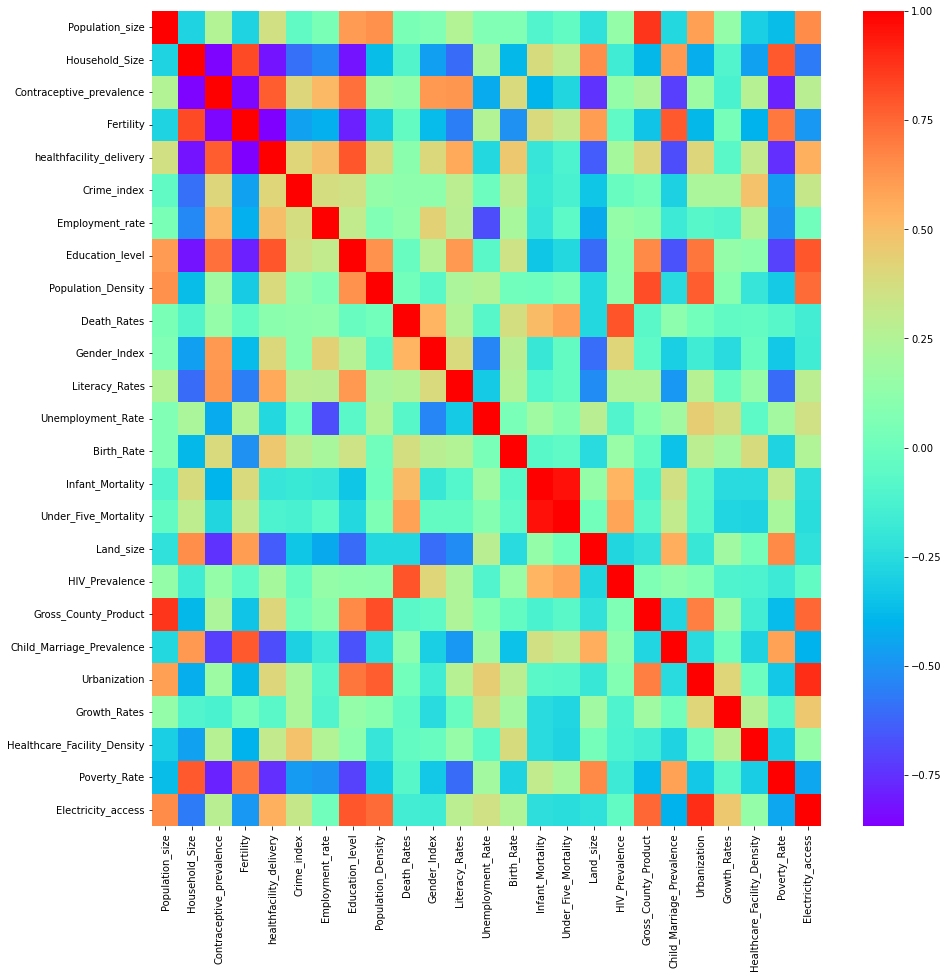

In [83]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (15, 15))
sns.heatmap(county.corr(), cmap="rainbow")
#plt.title("Correlation of the Socio-Economic indicators at the county level")
plt.savefig("cor")
plt.show()

In [84]:
# Under five mortality is highly correlated with infant mortality with the correlation coefficient of 0.96
# Gross county product is highly correlated with population (0.87), population density (0.81), electricty access (0.75)
# Population density  (0.78) and education level (0.71) are correlated with urbanization
# crude death rates is correlated with HIV prevalence rate (0.8)
# Electricty access is correlated with urbanization (0.89) and population density (0.74)
# Contraceptive prevalence is correlated with Health facilty delivery (0.78)
# Average household size is correlated with fertility rate (0.82) and population density (0.74)

In [85]:
#plt.figure(figsize=(10,8))
#sns.pairplot(county, kind='scatter')
# plt.show()

In [86]:
# From the pairplot above we can make out how different variables are correlated to each other

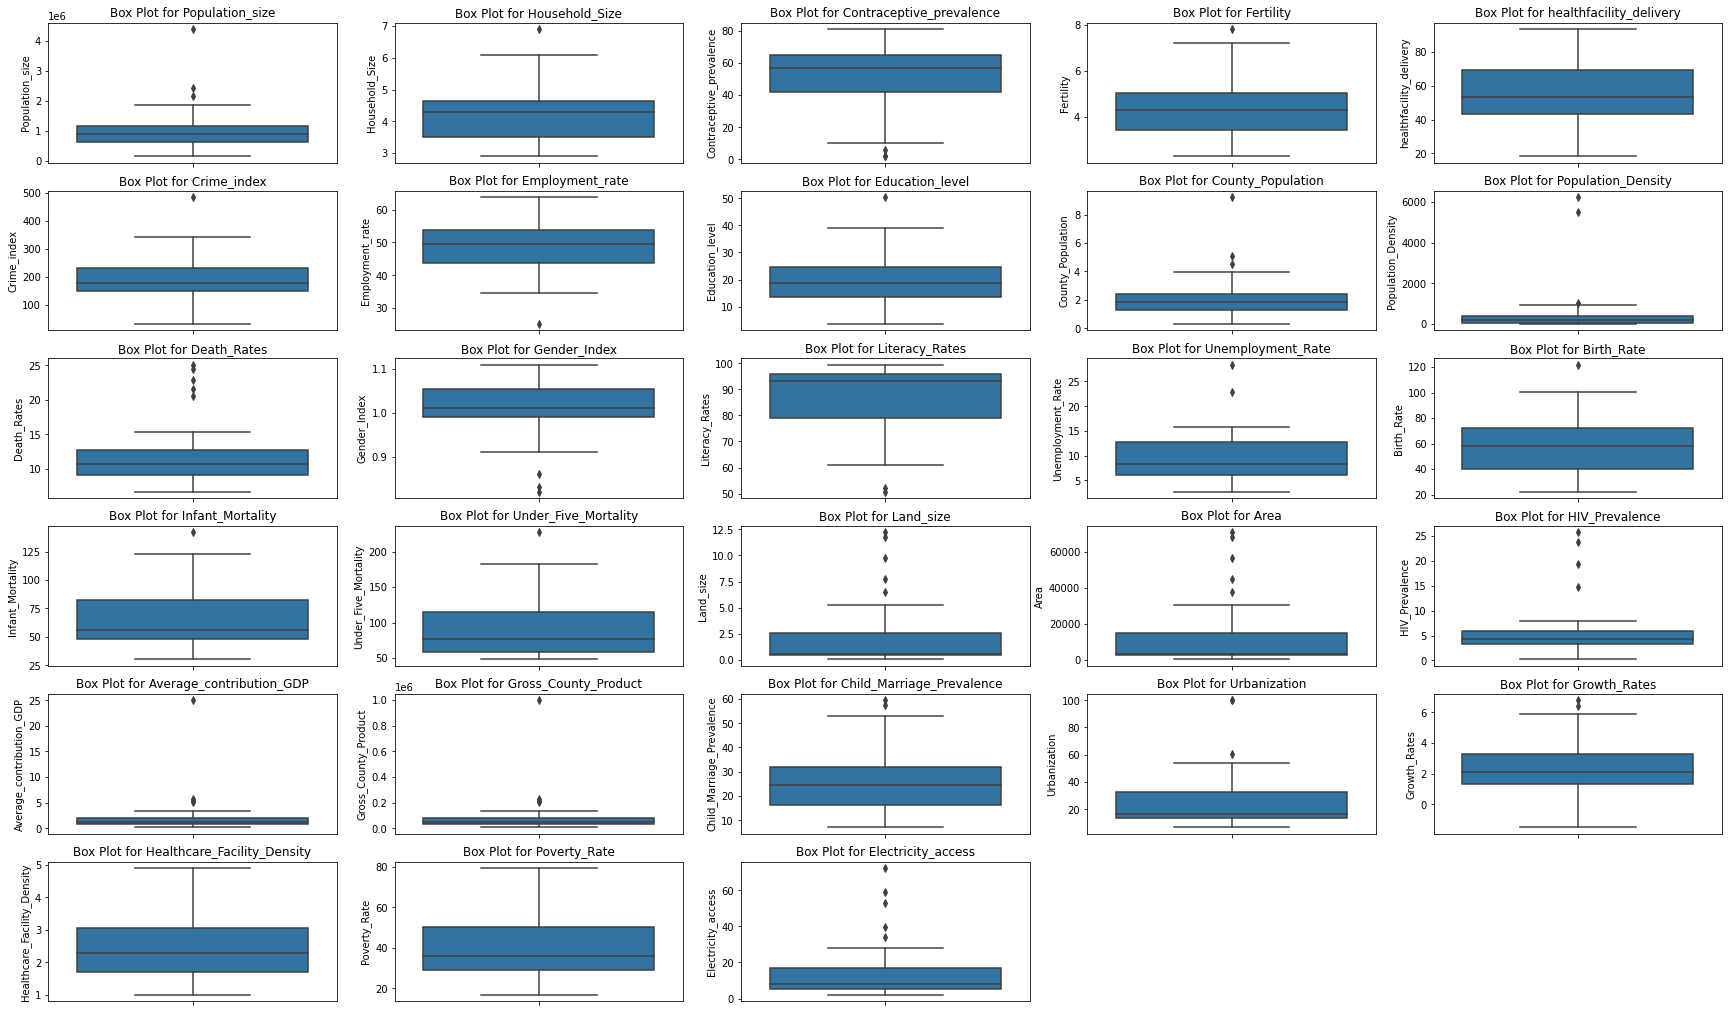

In [87]:
# lets check for outliers in the data set
cols = county_data.drop(["County"], axis=1)

plt.figure(figsize=(30,18))
for idx,col in enumerate(cols):
    plt.subplot(6, 5, idx+1)
    sns.boxplot(y=col, data =county_data)
    plt.title("Box Plot for "+ col)
plt.savefig("boxplot")
plt.show()


In [88]:
# Rescaling the Features
# Most software packages use SVD to compute the principal components and assume that the data is scaled and centred, 
# so it is important to do standardisation/normalisation. There are two common ways of rescaling:
# Min-Max scaling
# Standardisation (mean-0, sigma-1)
# Here, we will use Standardisation Scaling.

/Users/user/PycharmProjects/pythonclass/KE/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/user/PycharmProjects/pythonclass/KE/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/user/PycharmProjects/pythonclass/KE/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

ValueError: num must be 1 <= num <= 9, not 10

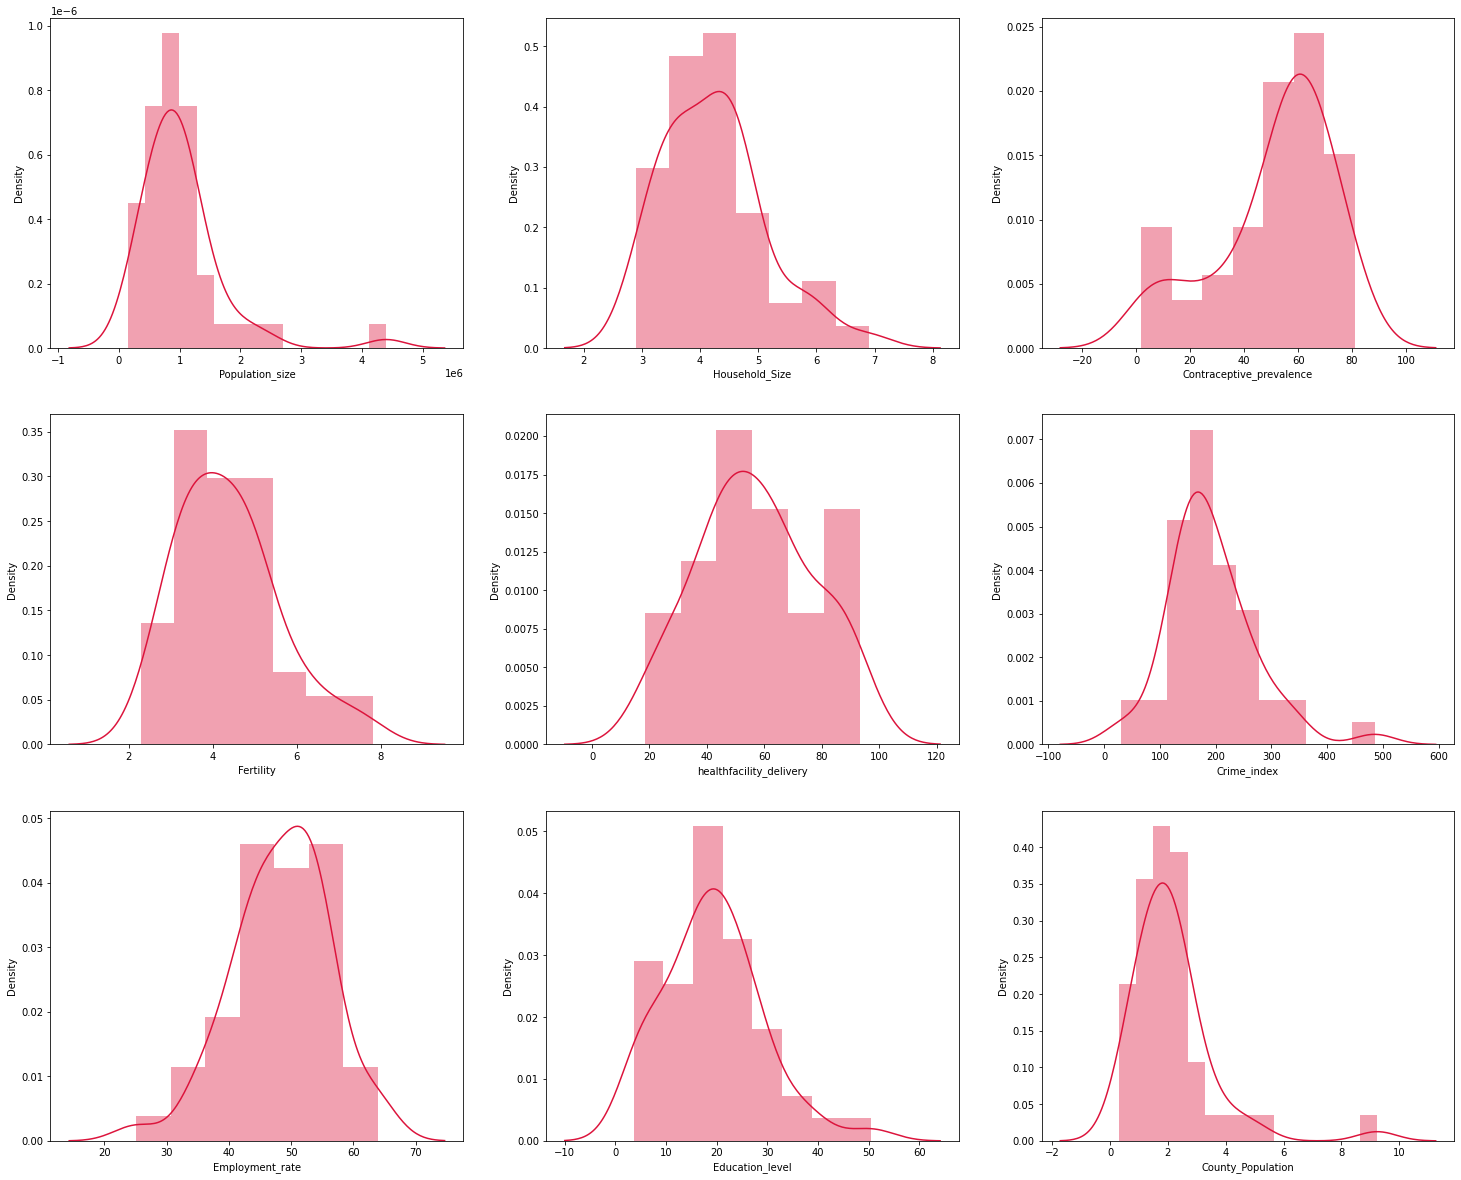

In [278]:
# Distplot
plt.figure(figsize = (20,16))
feature = county_data.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(county_data[i[1]], color='crimson')
    plt.subplots_adjust(right=1.1)
    plt.subplots_adjust(top=1.1)
plt.savefig("distplot")
plt.show()

In [265]:
county = county_data.drop(['Average_contribution_GDP','Area', 'County_Population', 'County'], axis=1)

In [266]:
# Standarisation technique for scaling
scaler = StandardScaler()
county_data_scaled = scaler.fit_transform(county)

In [267]:
county_data_scaled

array([[ 0.28626225, -1.2940171 ,  0.1701692 , ..., -0.14589031,
        -0.84866804,  3.00363249],
       [-0.21169487,  0.87808303, -0.46302548, ..., -0.86766343,
         0.3804063 , -0.2309174 ],
       [ 0.64415658,  0.64944091, -0.81010996, ..., -0.50677687,
         0.31986077,  0.17674281],
       ...,
       [ 0.37159995, -0.1508065 ,  0.69548626, ..., -1.34884551,
         0.03529676, -0.41804012],
       [-0.59261246, -0.26512756,  0.16923113, ..., -0.38648135,
        -0.50961305, -0.53165034],
       [ 4.93573613, -1.52265921,  0.53132468, ..., -0.98795895,
        -1.47834159,  3.89914837]])

Principal component analysis

Given a collection of points in two, three, or higher dimensional space, a "best fitting" line can be defined as one that minimizes the average squared perpendicular distance from a point to the line. The next best-fitting line can be similarly chosen from directions perpendicular to the first. Repeating this process yields an orthogonal basis in which different individual dimensions of the data are uncorrelated. These basis vectors are called Principal Components, and several related procedures Principal Component Analysis (PCA).

PCA is mostly used as a tool in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction i.e. by projecting each data point onto only the first few principal components. The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data. The ith principal component can be taken as a direction that maximizes the variance of the projected data and is orthogonal to the first i-1 principal components. From either objective, it can be shown that the principal components are eigenvectors of the data's covariance matrix. Thus, principal components are often computed using an eigendecomposition of the data covariance matrix or SVD of the data matrix.

PCA Application

We are doing PCA because we want to remove the redundancies in the data and find the most important directions where the data was aligned. A somewhat similar heuristic is also used by the United Nations to calculate the Human Development Index(HDI) to rank countries on the basis of their development.
Principal component analysis (PCA) is one of the most commonly used dimensionality reduction techniques in the industry. By converting large data sets into smaller ones containing fewer variables, it helps in improving model performance, visualising complex data sets, and in many more areas.
Let's use PCA for dimensionality reduction as from the heatmap it is evident that correlation exists between the attributes.

In [268]:
pca = PCA(svd_solver='randomized', random_state=50)

In [269]:
# Lets apply PCA on the scaled data
# fit the model to the scaled data
pca.fit(county_data_scaled)

PCA(random_state=50, svd_solver='randomized')

In [273]:
# PCA components created 
# Let's plot the principal components and try to make sense of them.
# We'll plot original features on the first 2 principal components as axes

pca.components_

array([[ 1.66451762e-01, -3.05856486e-01,  2.85851764e-01,
        -2.95567855e-01,  2.95235234e-01,  1.67512460e-01,
         1.61101188e-01,  3.07288144e-01,  1.70442808e-01,
         3.45422233e-02,  1.44002853e-01,  2.20518955e-01,
        -7.20468569e-02,  1.49621214e-01, -1.27610268e-01,
        -9.33008024e-02, -2.36037069e-01,  4.98108961e-02,
         1.81998890e-01, -2.44698934e-01,  1.82993992e-01,
         3.58672400e-02,  9.94804023e-02, -2.78357769e-01,
         2.20330884e-01],
       [ 2.53648344e-01,  6.10333653e-02, -1.81077113e-01,
         6.38576826e-02, -6.40709322e-02, -5.23396466e-02,
        -2.35554836e-01,  1.21515996e-01,  2.95879581e-01,
        -2.03517188e-01, -3.18892323e-01, -1.04736620e-01,
         3.39437829e-01, -7.66370282e-02, -4.15647896e-02,
        -8.35759331e-02,  1.60880564e-01, -1.53046759e-01,
         3.01171987e-01,  3.11609599e-02,  3.46880412e-01,
         2.35837229e-01, -9.33111258e-02,  5.74560520e-02,
         3.42942083e-01],
    

In [274]:
# Variance Ratio
#Let's check the variance ratios
print("variance explained by PCs:",pca.explained_variance_ratio_)

variance explained by PCs: [3.64696175e-01 1.63212082e-01 1.33589650e-01 8.07850978e-02
 4.33554632e-02 4.27111851e-02 3.09371693e-02 2.63493825e-02
 1.89099501e-02 1.74219553e-02 1.59369119e-02 1.37853398e-02
 1.03529466e-02 8.05443418e-03 6.46575179e-03 5.97513970e-03
 4.85635670e-03 3.91924972e-03 2.47270337e-03 1.97370328e-03
 1.36852042e-03 1.12910095e-03 9.83086643e-04 3.99432423e-04
 3.59211010e-04]


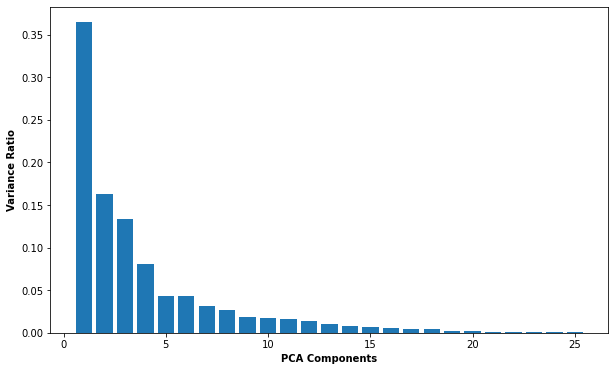

In [123]:
# Variance Ratio bar plot for each PCA components.
plt.figure(figsize = (10, 6))
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

plt.show()

In [124]:
# cumulative variance explained by PCs
print("\n cumulative variance explained by PCs:",np.cumsum(pca.explained_variance_ratio_))

# top 5 PCs are explaining 79% variation present in the dataset


 cumulative variance explained by PCs: [0.36469618 0.52790826 0.66149791 0.74228301 0.78563847 0.82834965
 0.85928682 0.88563621 0.90454616 0.92196811 0.93790502 0.95169036
 0.96204331 0.97009774 0.9765635  0.98253864 0.98739499 0.99131424
 0.99378695 0.99576065 0.99712917 0.99825827 0.99924136 0.99964079
 1.        ]


In [125]:
# With first component variance explained is almost 36%.
# For second component variance explained is almost 18%.
# The third component variance explained is almost 12%.
#  The 4th component variance explained is almost 8%.

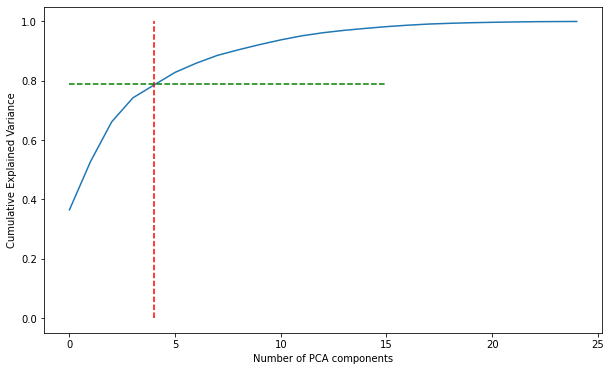

In [126]:
# Scree plot to visualize the Cumulative variance against the Number of components

fig = plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.79, xmax=15, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [204]:
#Let's try and check the first 5 components now
colnames = list(county.columns)


In [205]:
pcs_com = pd.DataFrame({'PC1' :pca.components_[0], 'PC2' :pca.components_[1],
                       'PC3' :pca.components_[2], 'PC4' :pca.components_[3], 'PC5' :pca.components_[4]})


In [206]:
pcs_com

,PC1,PC2,PC3,PC4,PC5
0,0.166452,0.253648,0.189696,-0.250888,-0.104754
1,-0.305856,0.061033,0.048491,-0.083844,0.091784
2,0.285852,-0.181077,-0.051697,-0.077357,0.117510
3,-0.295568,0.063858,0.079152,-0.034921,-0.198362
4,0.295235,-0.064071,0.033043,0.014910,0.080638
5,0.167512,-0.052340,-0.098476,0.340573,-0.242643
6,0.161101,-0.235555,-0.032890,-0.074412,-0.569673
7,0.307288,0.121516,0.035994,-0.067198,0.063531
8,0.170443,0.295880,0.202891,-0.120260,-0.091529
9,0.034542,-0.203517,0.398162,0.249091,-0.060207


In [207]:
pcs_com['Features'] = county.columns.values
loadings = pcs_com.set_index('Features')
loadings

,PC1,PC2,PC3,PC4,PC5
Features,,,,,
Population_size,0.166452,0.253648,0.189696,-0.250888,-0.104754
Household_Size,-0.305856,0.061033,0.048491,-0.083844,0.091784
Contraceptive_prevalence,0.285852,-0.181077,-0.051697,-0.077357,0.117510
Fertility,-0.295568,0.063858,0.079152,-0.034921,-0.198362
healthfacility_delivery,0.295235,-0.064071,0.033043,0.014910,0.080638
Crime_index,0.167512,-0.052340,-0.098476,0.340573,-0.242643
Employment_rate,0.161101,-0.235555,-0.032890,-0.074412,-0.569673
Education_level,0.307288,0.121516,0.035994,-0.067198,0.063531
Population_Density,0.170443,0.295880,0.202891,-0.120260,-0.091529


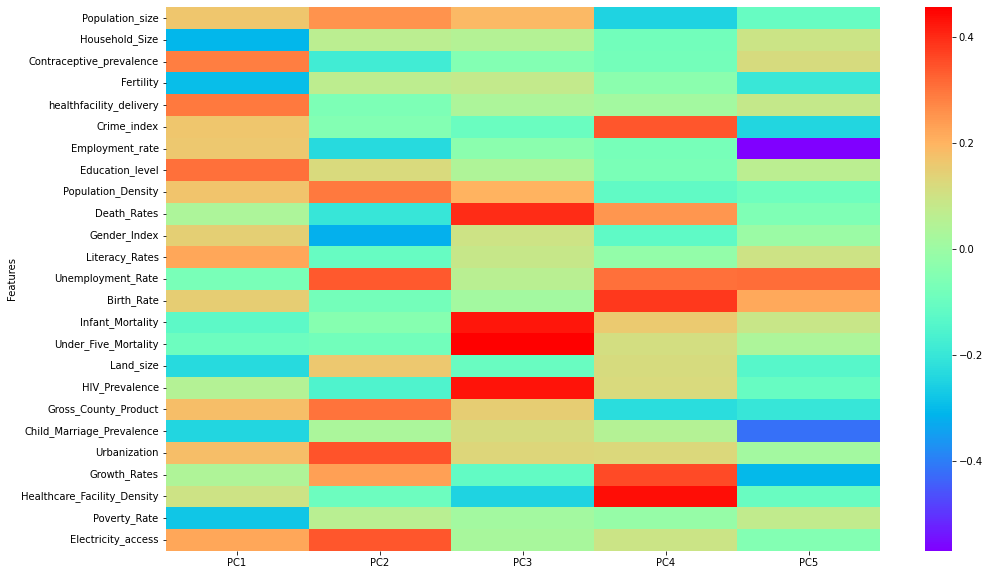

In [208]:
plt.figure(figsize = (16, 10))
ax = sns.heatmap(loadings, cmap='rainbow')
plt.savefig("corrrr")
plt.show()

In [209]:
pcs_com = pd.DataFrame({"Feature": colnames, 'PC1' :pca.components_[0], 'PC2' :pca.components_[1],
                       'PC3' :pca.components_[2], 'PC4' :pca.components_[3], 'PC5' :pca.components_[4]})


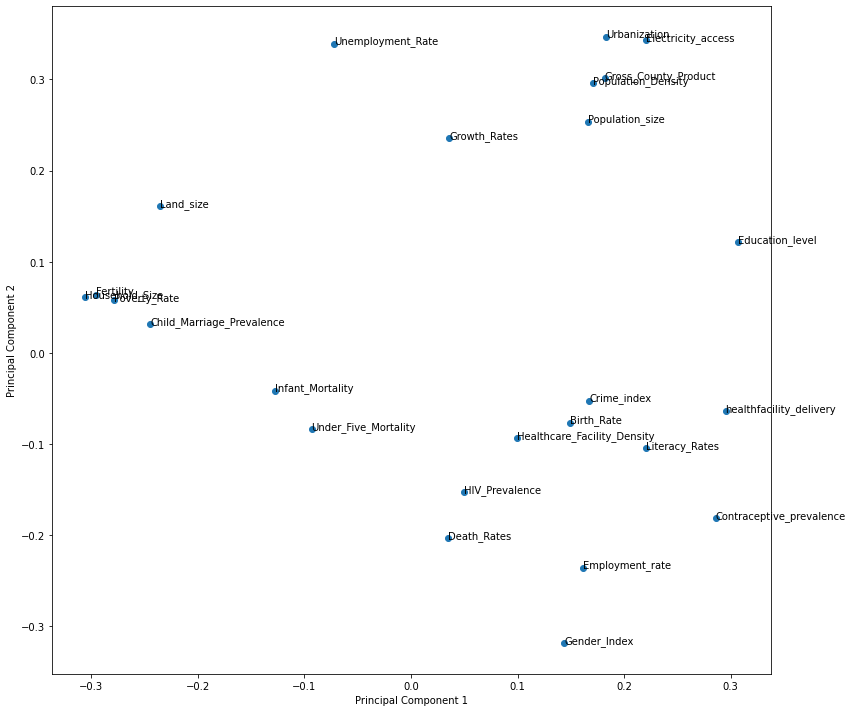

In [210]:
%matplotlib inline
fig = plt.figure(figsize = (12,10))
plt.scatter(pcs_com.PC1, pcs_com.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_com.Feature):
    plt.annotate(txt, (pcs_com.PC1[i],pcs_com.PC2[i]))
plt.tight_layout()
plt.savefig("pcaplot")
plt.show()

In [211]:
# Using incremental PCA for efficiency - saves a lot of time on larger datasets
#from sklearn.decomposition import IncrementalPCA
#pca_final = IncrementalPCA(n_components=5)

In [212]:
pcaa = PCA(n_components=5, svd_solver='randomized', random_state=42)  # 47 * 5
pcaa.fit(county_data_scaled)
data_pca = pcaa.transform(county_data_scaled)
print('\n Variance Explained Ratio:\n', pcaa.explained_variance_ratio_)  # Let's check the variance ratios

# cumulative variance explained by PCs
print('\nCumulative Variance Explained:\n', np.cumsum(pcaa.explained_variance_ratio_))


 Variance Explained Ratio:
 [0.36469618 0.16321208 0.13358965 0.0807851  0.04335546]

Cumulative Variance Explained:
 [0.36469618 0.52790826 0.66149791 0.74228301 0.78563847]


In [213]:
# fit and transform the scaled dataset 
#county_pca = pca_final.fit_transform(county_data_scaled)
#county_pca.shape

In [214]:
#creating correlation matrix for the principal components
# we expect little to no correlation
corrmat = np.corrcoef(data_pca.transpose())

<AxesSubplot:>

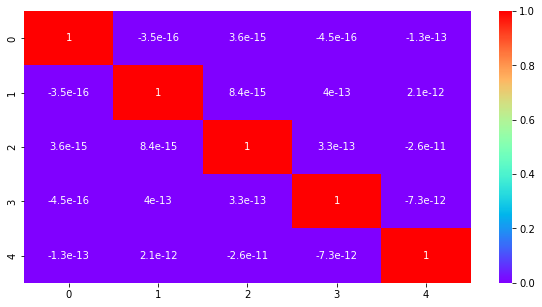

In [215]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True, cmap="rainbow")

In [216]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 2.1417831887603628e-12 , min corr:  -2.6022746901215927e-11


In [217]:
# lets take the transpose of the trained dataset
pc = np.transpose(data_pca)
pc.shape

(5, 47)

In [218]:
#Let's create the newer matrix according to the given principal components
rownames = list(county_data['County'])
pcss = pd.DataFrame({'County':rownames,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],
                    'PC4' :pc[3], 'PC5' :pc[4]})
pcss.head()

,County,PC1,PC2,PC3,PC4,PC5
0,Mombasa,4.492600,4.823231,2.125872,2.046506,0.835821
1,Kwale,-1.459148,0.228488,-0.022676,-0.029369,0.746829
2,Kilifi,-1.010831,0.667048,-0.152090,0.043853,0.369988
3,Tana River,-4.235549,0.132129,-0.236262,0.539563,-1.275710
4,Lamu,0.370144,-0.236331,-1.748257,4.243578,-1.418311


In [219]:
#Let's create the newer matrix according to the given principal components
rownames = list(county_data['County'])
pcs = pd.DataFrame({'County':rownames,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],
                    'PC4' :pc[3], 'PC5' :pc[4]})
pcs.head()

,County,PC1,PC2,PC3,PC4,PC5
0,Mombasa,4.492600,4.823231,2.125872,2.046506,0.835821
1,Kwale,-1.459148,0.228488,-0.022676,-0.029369,0.746829
2,Kilifi,-1.010831,0.667048,-0.152090,0.043853,0.369988
3,Tana River,-4.235549,0.132129,-0.236262,0.539563,-1.275710
4,Lamu,0.370144,-0.236331,-1.748257,4.243578,-1.418311


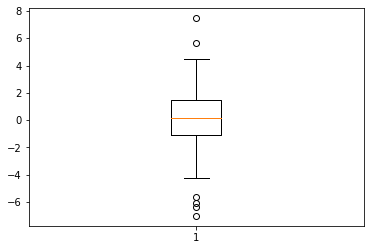

In [220]:
#Let's do the outlier analysis before proceeding to clustering
plt.boxplot(pcs.PC1)
Q1 = pcs.PC1.quantile(0.05)
Q3 = pcs.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs = pcs[(pcs.PC1 >= Q1) & (pcs.PC1 <= Q3)]

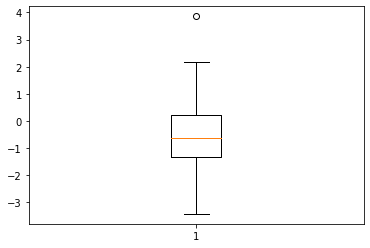

In [221]:
# outlier treatment for PC2
plt.boxplot(pcs.PC2)
Q1 = pcs.PC2.quantile(0.05)
Q3 = pcs.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs = pcs[(pcs.PC2 >= Q1) & (pcs.PC2 <= Q3)]

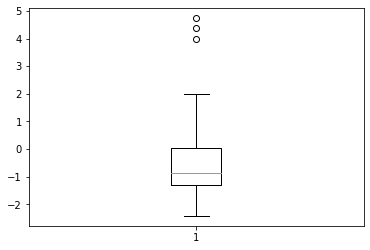

In [222]:
# outlier treatment for PC3
plt.boxplot(pcs.PC3)
Q1 = pcs.PC3.quantile(0.05)
Q3 = pcs.PC3.quantile(0.95)
IQR = Q3 - Q1
pcs = pcs[(pcs.PC3 >= Q1) & (pcs.PC3 <= Q3)]

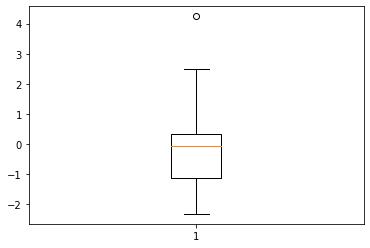

In [223]:
# outlier treatment for PC4
plt.boxplot(pcs.PC4)
Q1 = pcs.PC4.quantile(0.05)
Q3 = pcs.PC4.quantile(0.95)
IQR = Q3 - Q1
pcs = pcs[(pcs.PC4 >= Q1) & (pcs.PC4 <= Q3)]

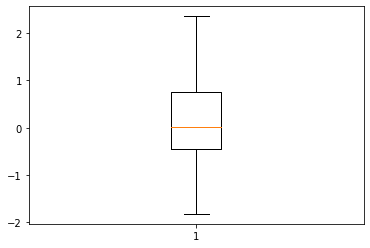

In [224]:
# outlier treatment for PC5
plt.boxplot(pcs.PC5)
Q1 = pcs.PC5.quantile(0.05)
Q3 = pcs.PC5.quantile(0.95)
IQR = Q3 - Q1
pcs = pcs[(pcs.PC5 >= Q1) & (pcs.PC5 <= Q3)]

In [225]:
#Outlier analysis is now done.Let's check the data again.
pcs.shape

(25, 6)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

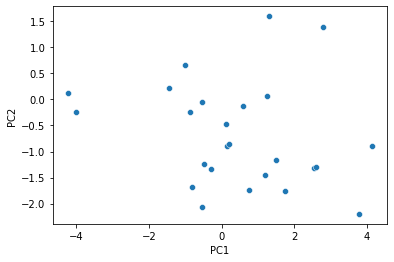

In [226]:
#let's check the spread of the dataset
sns.scatterplot(x='PC1',y='PC2',data=pcs)

Lets check whether the data is good enough for clustering using hopkins method

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [227]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, 
                                    return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [228]:
from numpy.random import uniform
from random import sample
from sklearn.neighbors import NearestNeighbors
from math import isnan
hopkins(pcs.drop(["County"],1))

/var/folders/h_/y0h5hq093zv6lnjcmtpl99lc0000gn/T/ipykernel_2672/345387883.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hopkins(pcs.drop(["County"],1))


0.5740657813640083

In [229]:
# hopkin score of .64 is not a very good number, the data is random, no guarantee to form clusters

Now lets do Silhouette Analysis

silhouette score=p−qmax(p,q)

p is the mean distance to the points in the nearest cluster that the data point is not a part of

q is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [230]:
# lets scale the dataset
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
pcs_scale = standard_scaler.fit_transform(pcs.drop(['County'],axis=1))

In [231]:
#Let's check the silhouette score first to identify the ideal number of clusters
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(pcs_scale)
    sse_.append([k, silhouette_score(pcs_scale, kmeans.labels_)])
 

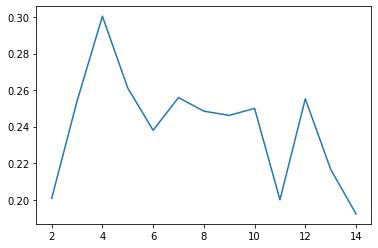

In [232]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [233]:
# silhoutee score is maximum for 8 clusters

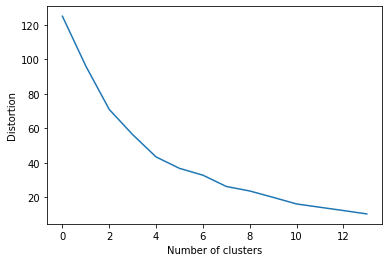

In [261]:
#Let's use the elbow curve method to identify the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,15)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pcs_scale)
    ssd.append(model_clus.inertia_)
plt.ylabel("Distortion")
plt.xlabel("Number of clusters")
plt.plot(ssd)

In [235]:
# Lets make a model with k = 5 first
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(pcs_scale)

KMeans(max_iter=50, n_clusters=5)

In [236]:
model_clus5.labels_

array([2, 2, 3, 0, 0, 1, 1, 0, 0, 0, 3, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 4,
       4, 1, 1], dtype=int32)

In [237]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering

# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

# save clusters for chart
y_hc = hc.fit(pcs_scale)

In [238]:
 model = y_hc.labels_

In [239]:
model

array([0, 0, 4, 1, 1, 0, 0, 1, 1, 0, 4, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 3,
       3, 0, 0])

In [240]:
# lets concatenate the cluster ids to the PCA transformed dataset
pcs1 = pcs
pcs1.index = pd.RangeIndex(len(pcs1.index))
CON = pd.concat([pcs1, pd.Series(model_clus5.labels_)], axis=1)
CON.columns = ['County', 'PC1', 'PC2','PC3', 'PC4', 'PC5', 'ClusterID']
CON.head()

,County,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Kwale,-1.459148,0.228488,-0.022676,-0.029369,0.746829,2
1,Kilifi,-1.010831,0.667048,-0.152090,0.043853,0.369988,2
2,Tana River,-4.235549,0.132129,-0.236262,0.539563,-1.275710,3
3,Taita-Taveta,1.196890,-1.456304,-1.073111,1.052092,-0.057194,0
4,Meru,2.535843,-1.324361,-1.829753,-0.070686,-0.814319,0


In [241]:
# add cluster ids to the original dataset
pcs2=pd.merge(county_data,CON,on='County')
pcs4=pcs2[['County', 'Population_size','Household_Size', 'Contraceptive_prevalence','Fertility', 
           'healthfacility_delivery', 'Crime_index','Employment_rate', 'Education_level', 'County_Population', 'Population_Density',
           'Death_Rates', 'Gender_Index', 'Literacy_Rates', 'Unemployment_Rate','Birth_Rate', 'Infant_Mortality',
           'Under_Five_Mortality', 'Land_size','HIV_Prevalence', 'Average_contribution_GDP', 'Gross_County_Product', 
           'Child_Marriage_Prevalence','Urbanization', 'Growth_Rates', 'Healthcare_Facility_Density',
           'Poverty_Rate', 'Electricity_access','ClusterID']]
pcs4.head()

,County,Population_size,Household_Size,Contraceptive_prevalence,Fertility,healthfacility_delivery,Crime_index,Employment_rate,Education_level,County_Population,...,HIV_Prevalence,Average_contribution_GDP,Gross_County_Product,Child_Marriage_Prevalence,Urbanization,Growth_Rates,Healthcare_Facility_Density,Poverty_Rate,Electricity_access,ClusterID
0,Kwale,866820,5.0,41.5,4.7,49.0,169,39.1,10.6,1.82,...,5.7,1.16,46173,27.2,23.0,3.4,1.7,47.4,10.6,2
1,Kilifi,1453787,4.8,34.1,5.1,52.6,198,40.5,12.5,3.06,...,4.4,1.66,66381,27.3,26.0,3.2,2.0,46.4,16.7,2
2,Tana River,315943,4.6,28.7,5.8,31.6,259,45.2,6.8,0.66,...,1.0,0.45,18094,59.5,15.0,1.4,2.3,62.2,2.5,3
3,Taita-Taveta,340671,3.5,67.9,3.2,61.9,338,50.0,21.6,0.72,...,6.1,0.65,25982,11.1,15.0,2.3,3.3,32.3,7.7,0
4,Meru,1545714,3.6,78.2,3.1,81.8,311,56.4,18.6,3.25,...,3.0,2.63,105150,24.6,12.0,1.4,3.4,19.4,13.1,0


In [242]:
CON.shape

(25, 7)

# Cluster Analysis

In [243]:
# lets check if each cluster has enough no. of data points
pcs2['ClusterID'].value_counts()

1    8
2    7
0    6
3    2
4    2
Name: ClusterID, dtype: int64

In [244]:
# lets take mean of the available features, these would be helpful for cluster analysis
clu_pop  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Population_size.mean())
clu_AHS  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Household_Size.mean())
clu_CPR  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Contraceptive_prevalence.mean())
clu_FR  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Fertility.mean())
clu_HF  = pd.DataFrame(pcs4.groupby(["ClusterID"]).healthfacility_delivery.mean())
clu_CI  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Crime_index.mean())         
clu_ER  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Employment_rate.mean())
clu_EL  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Education_level.mean())
#clu_CP = pd.DataFrame(pcs4.groupby(["ClusterID"]).County_Population.mean())
clu_PD  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Population_Density.mean())
clu_CDR  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Death_Rates.mean())
clu_GI  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Gender_Index.mean())
clu_LR  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Literacy_Rates.mean())
clu_UR  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Unemployment_Rate.mean())
clu_CBR  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Birth_Rate.mean())         
clu_IMR  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Infant_Mortality.mean())
clu_UFMR  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Under_Five_Mortality.mean())
clu_LA = pd.DataFrame(pcs4.groupby(["ClusterID"]).Land_size.mean())
clu_HPR  = pd.DataFrame(pcs4.groupby(["ClusterID"]).HIV_Prevalence.mean())
#clu_ACG  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Average_contribution_GDP.mean())
clu_HFD  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Gross_County_Product.mean())
clu_CMPR  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Child_Marriage_Prevalence.mean())         
clu_U = pd.DataFrame(pcs4.groupby(["ClusterID"]).Urbanization.mean())
clu_GR  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Growth_Rates.mean())
clu_HFD = pd.DataFrame(pcs4.groupby(["ClusterID"]).Healthcare_Facility_Density.mean())
clu_PR  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Poverty_Rate.mean())
clu_EAR  = pd.DataFrame(pcs4.groupby(["ClusterID"]).Electricity_access.mean())


In [245]:
final = pd.concat([pd.Series([0, 1, 2, 3, 4]),clu_pop,clu_AHS, clu_CPR,clu_FR,clu_HF,clu_CI,clu_ER,clu_EL,clu_PD, 
                   clu_CDR, clu_GI, clu_LR, clu_UR, clu_CBR, clu_IMR, clu_UFMR, clu_LA, clu_HPR, clu_HFD, clu_CMPR,
                   clu_U, clu_GR, clu_HFD, clu_PR, clu_EAR], axis=1)
final.columns = ["ClusterID", 'Population size', 'Household Size', 'Contraceptive prevalence','Fertility rate', 
                 'health facility delivery', 'Crime index','Employment rate', 'Education level', 
                 'Population Density','Death Rates', 'Gender Index', 'Literacy Rates', 'Unemployment Rate',
                 'Birth Rate', 'Infant Mortality Rate','Under-Five Mortality Rate', 'Land size','HIV Prevalence rate', 
                 'Gross County Product', 'Child Marriage Prevalence','Urbanization', 'Growth Rates', 
                 'Healthcare Facility Density','Poverty Rate', 'Electricity access']
final

,ClusterID,Population size,Household Size,Contraceptive prevalence,Fertility rate,health facility delivery,Crime index,Employment rate,Education level,Population Density,...,Under-Five Mortality Rate,Land size,HIV Prevalence rate,Gross County Product,Child Marriage Prevalence,Urbanization,Growth Rates,Healthcare Facility Density,Poverty Rate,Electricity access
0,0,8.690628e+05,3.466667,72.016667,3.0500,78.733333,269.833333,55.883333,24.750,278.500000,...,67.333333,0.972000,4.216667,3.166667,18.066667,25.218333,2.166667,3.166667,24.433333,14.883333
1,1,9.305869e+05,4.150000,60.672500,4.0625,59.262500,174.250000,48.245000,20.025,498.625000,...,87.875000,0.977500,4.800000,2.050000,20.262500,16.637500,1.150000,2.050000,42.850000,6.925000
2,2,1.117380e+06,4.228571,51.328571,4.4000,53.114286,205.285714,43.171429,20.300,195.142857,...,73.285714,1.342857,4.500000,2.128571,24.214286,27.142857,2.928571,2.128571,40.485714,17.914286
3,3,4.685920e+05,4.950000,21.450000,6.5000,28.700000,196.000000,47.250000,6.550,38.000000,...,108.000000,4.050000,1.900000,2.150000,44.950000,11.500000,1.750000,2.150000,59.800000,2.250000
4,4,1.005058e+06,4.550000,51.000000,5.0000,55.850000,174.500000,55.250000,15.450,477.000000,...,161.000000,0.370000,10.750000,1.850000,41.500000,25.000000,2.150000,1.850000,55.200000,5.650000


/var/folders/h_/y0h5hq093zv6lnjcmtpl99lc0000gn/T/ipykernel_2672/3407222653.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  for idx,col in enumerate(final.drop("ClusterID",1)):


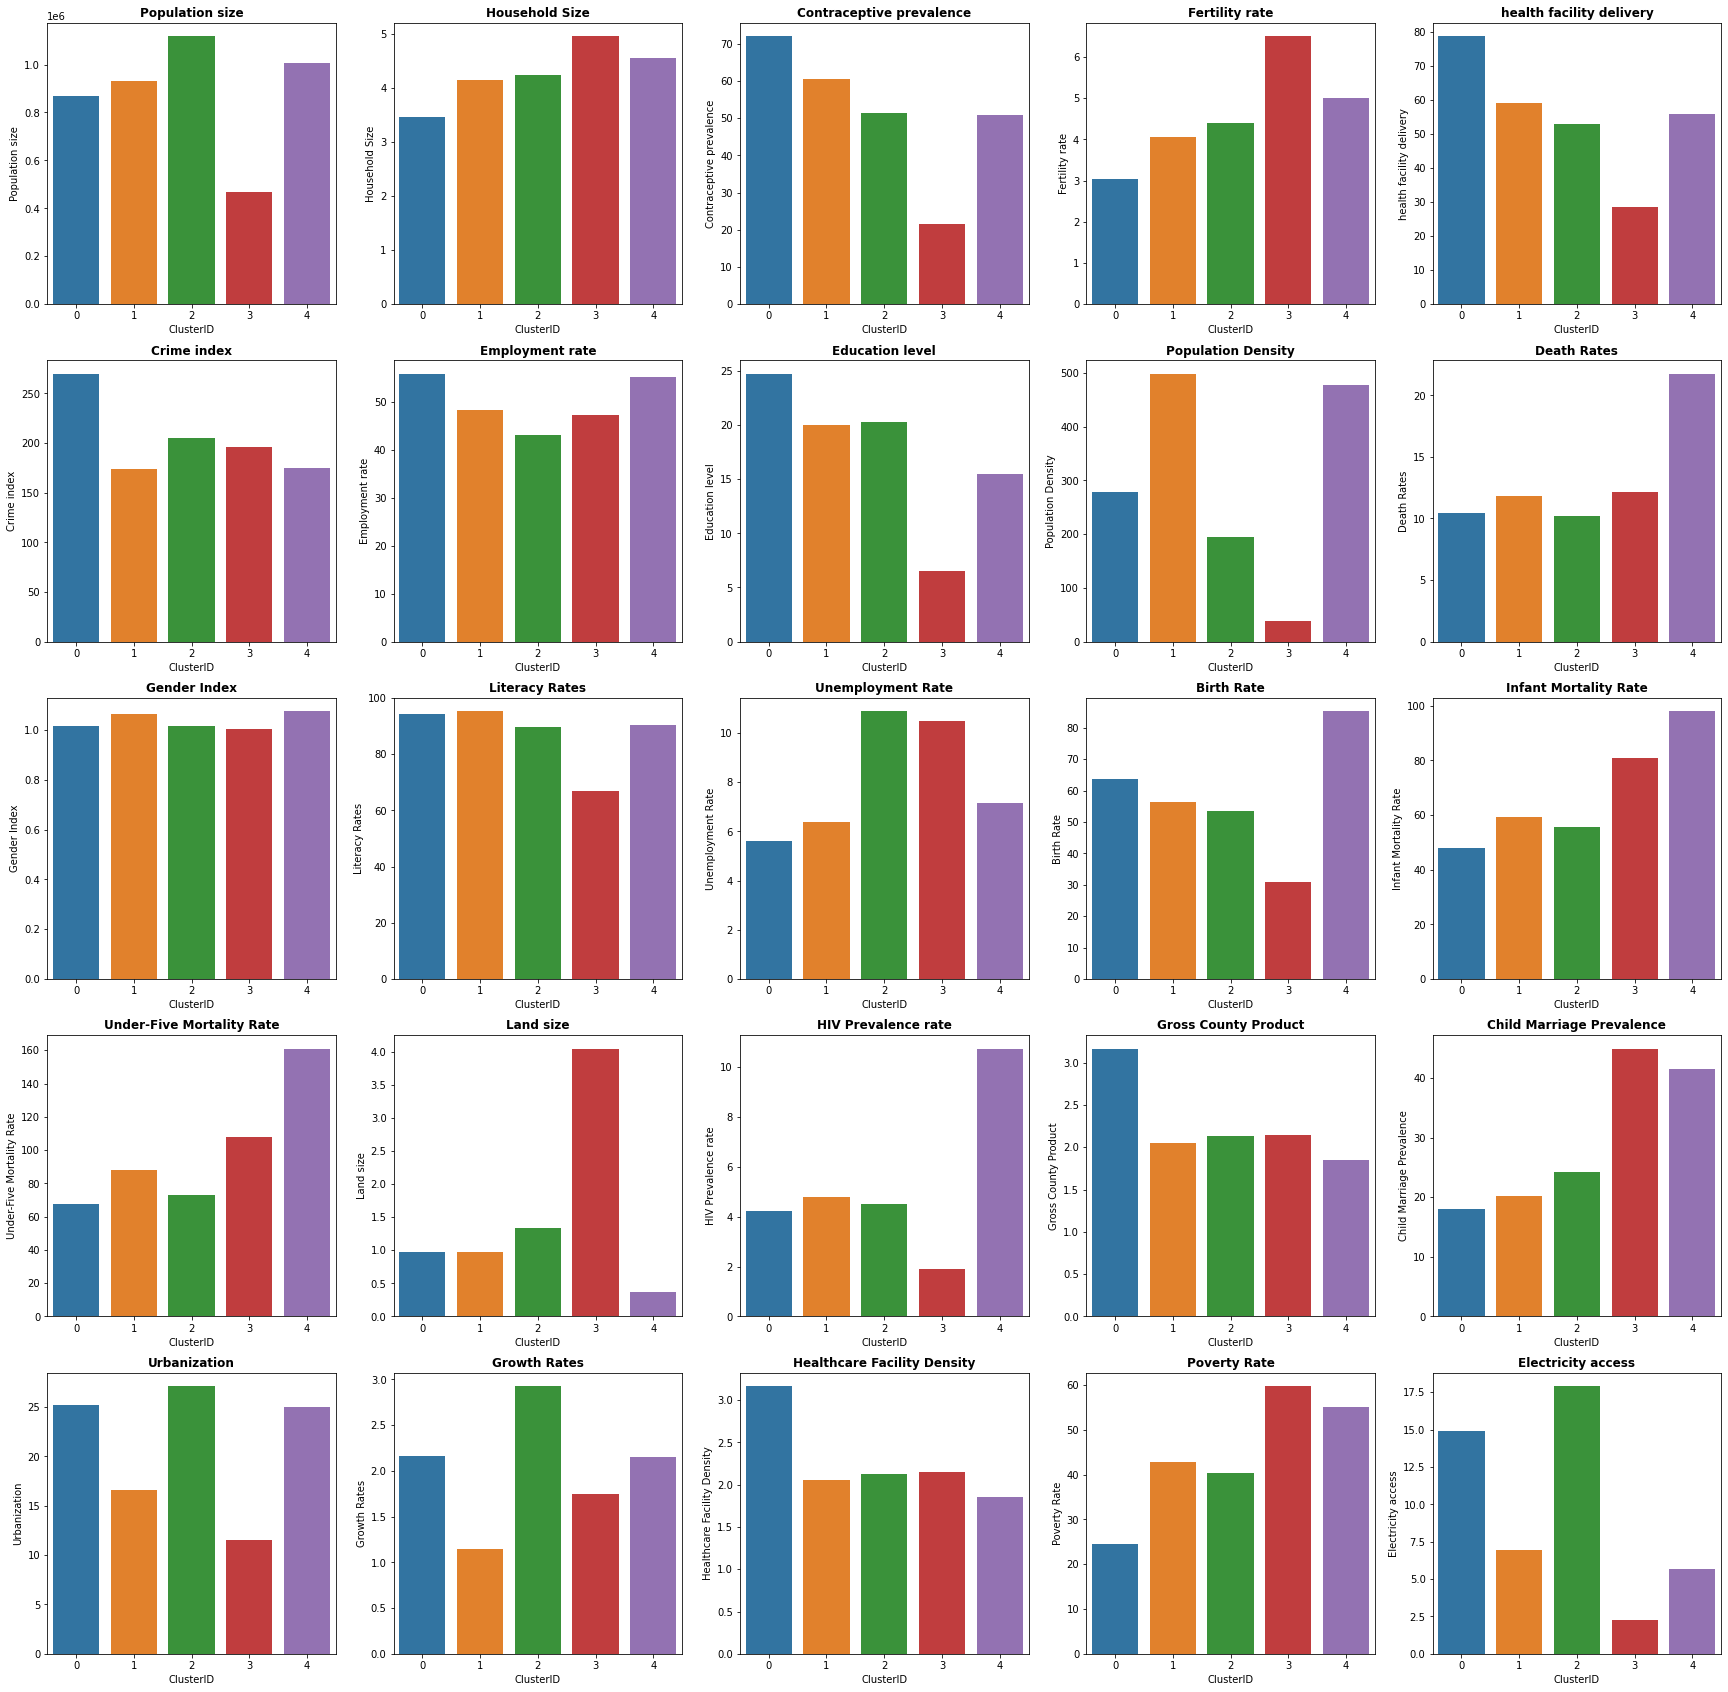

In [246]:
# lets visualise the cluster formed
fig= plt.figure(figsize = (30,30))

for idx,col in enumerate(final.drop("ClusterID",1)):
    plt.subplot(5,5,idx+1)
    sns.barplot(x=final.ClusterID, y=final[col])
    plt.title(col,fontsize = 12,fontweight='bold')
    
plt.savefig("clusters")    
plt.show()

In [247]:
# contraceptive use, household size, fertility, child marriage prevalence, poverty rate, unemployment rate, 
# and HIV are related.

# from above graphs we can conclude that Electricity access, poverty rate, urbanization, child marriage prevalence, 
# unemployment rate, household size, population size, , fertility rate, 
# electricity acess, HIV prevalence, & urbanization seems to have good variations for different clusters, 
# lets use these variables to filter the dataset and come up with the final list of poor countries

In [248]:
# from the above data, we know that average household for cluster 4 is maximum i.e. 4
# lets create a dataframe with household size greater than 4
poor1 = county_data[county_data.Household_Size>=4.4]

# Urbanization average income is around 26, lets filter the dataset
poor2 = poor1[poor1.Urbanization<=18]
poor3 = poor2[poor2.Poverty_Rate>=40]

poor4 = poor3[poor3.Electricity_access<=15]
poor5 = poor4[poor4.Education_level<=15]
print("Final list of poor counties\n:",poor5)

Final list of poor counties
:         County  Population_size  Household_Size  Contraceptive_prevalence  \
3   Tana River           315943             4.6                      28.7   
7        Wajir           781263             6.1                       2.3   
8      Mandera           867457             6.9                       1.9   
22     Turkana           926976             5.6                      10.4   
23  West Pokot           621241             5.3                      14.2   
24     Samburu           310327             4.7                      22.7   

    Fertility  healthfacility_delivery  Crime_index  Employment_rate  \
3         5.8                     31.6          259             45.2   
7         7.8                     18.3           31             34.7   
8         5.2                     36.0           41             35.0   
22        6.9                     23.1          114             49.4   
23        7.2                     25.8          133             49.3  

In [249]:
A_counties=pd.DataFrame(poor5)
A_counties=A_counties.reset_index(drop=True)
A_counties

,County,Population_size,Household_Size,Contraceptive_prevalence,Fertility,healthfacility_delivery,Crime_index,Employment_rate,Education_level,County_Population,...,Area,HIV_Prevalence,Average_contribution_GDP,Gross_County_Product,Child_Marriage_Prevalence,Urbanization,Growth_Rates,Healthcare_Facility_Density,Poverty_Rate,Electricity_access
0,Tana River,315943,4.6,28.7,5.8,31.6,259,45.2,6.8,0.66,...,37950.5,1.0,0.45,18094,59.5,15.0,1.4,2.3,62.2,2.5
1,Wajir,781263,6.1,2.3,7.8,18.3,31,34.7,4.0,1.64,...,56773.1,0.2,0.52,20908,53.1,15.0,1.9,1.5,62.6,3.4
2,Mandera,867457,6.9,1.9,5.2,36.0,41,35.0,4.7,1.82,...,25939.8,1.7,0.52,20725,40.0,18.0,-1.5,1.0,77.6,2.5
3,Turkana,926976,5.6,10.4,6.9,23.1,114,49.4,3.6,1.95,...,68232.9,7.6,1.08,43308,57.4,14.0,0.9,2.0,79.4,2.4
4,West Pokot,621241,5.3,14.2,7.2,25.8,133,49.3,6.3,1.31,...,9123.2,2.8,0.64,25561,30.4,8.0,2.1,2.0,57.4,2.0
5,Samburu,310327,4.7,22.7,6.3,24.5,159,47.0,6.4,0.65,...,21065.1,5.0,0.33,12980,50.0,17.0,4.0,2.6,75.8,6.2


In [250]:
A_counties["County"]

0    Tana River
1         Wajir
2       Mandera
3       Turkana
4    West Pokot
5       Samburu
Name: County, dtype: object

# Hierarchical Clustering

In [251]:
names = county_data['County']

In [252]:
names

0             Mombasa
1               Kwale
2              Kilifi
3          Tana River
4                Lamu
5        Taita-Taveta
6             Garissa
7               Wajir
8             Mandera
9            Marsabit
10             Isiolo
11               Meru
12      Tharaka-Nithi
13               Embu
14              Kitui
15           Machakos
16            Makueni
17          Nyandarua
18              Nyeri
19          Kirinyaga
20           Murang'a
21             Kiambu
22            Turkana
23         West Pokot
24            Samburu
25        Trans-Nzoia
26        Uasin Gishu
27    Elgeyo-Marakwet
28              Nandi
29            Baringo
30           Laikipia
31             Nakuru
32              Narok
33            Kajiado
34            Kericho
35              Bomet
36             Kamega
37             Vihiga
38            Bungoma
39              Busia
40              Siaya
41             Kisumu
42            Homabay
43             Migori
44              Kisii
45        

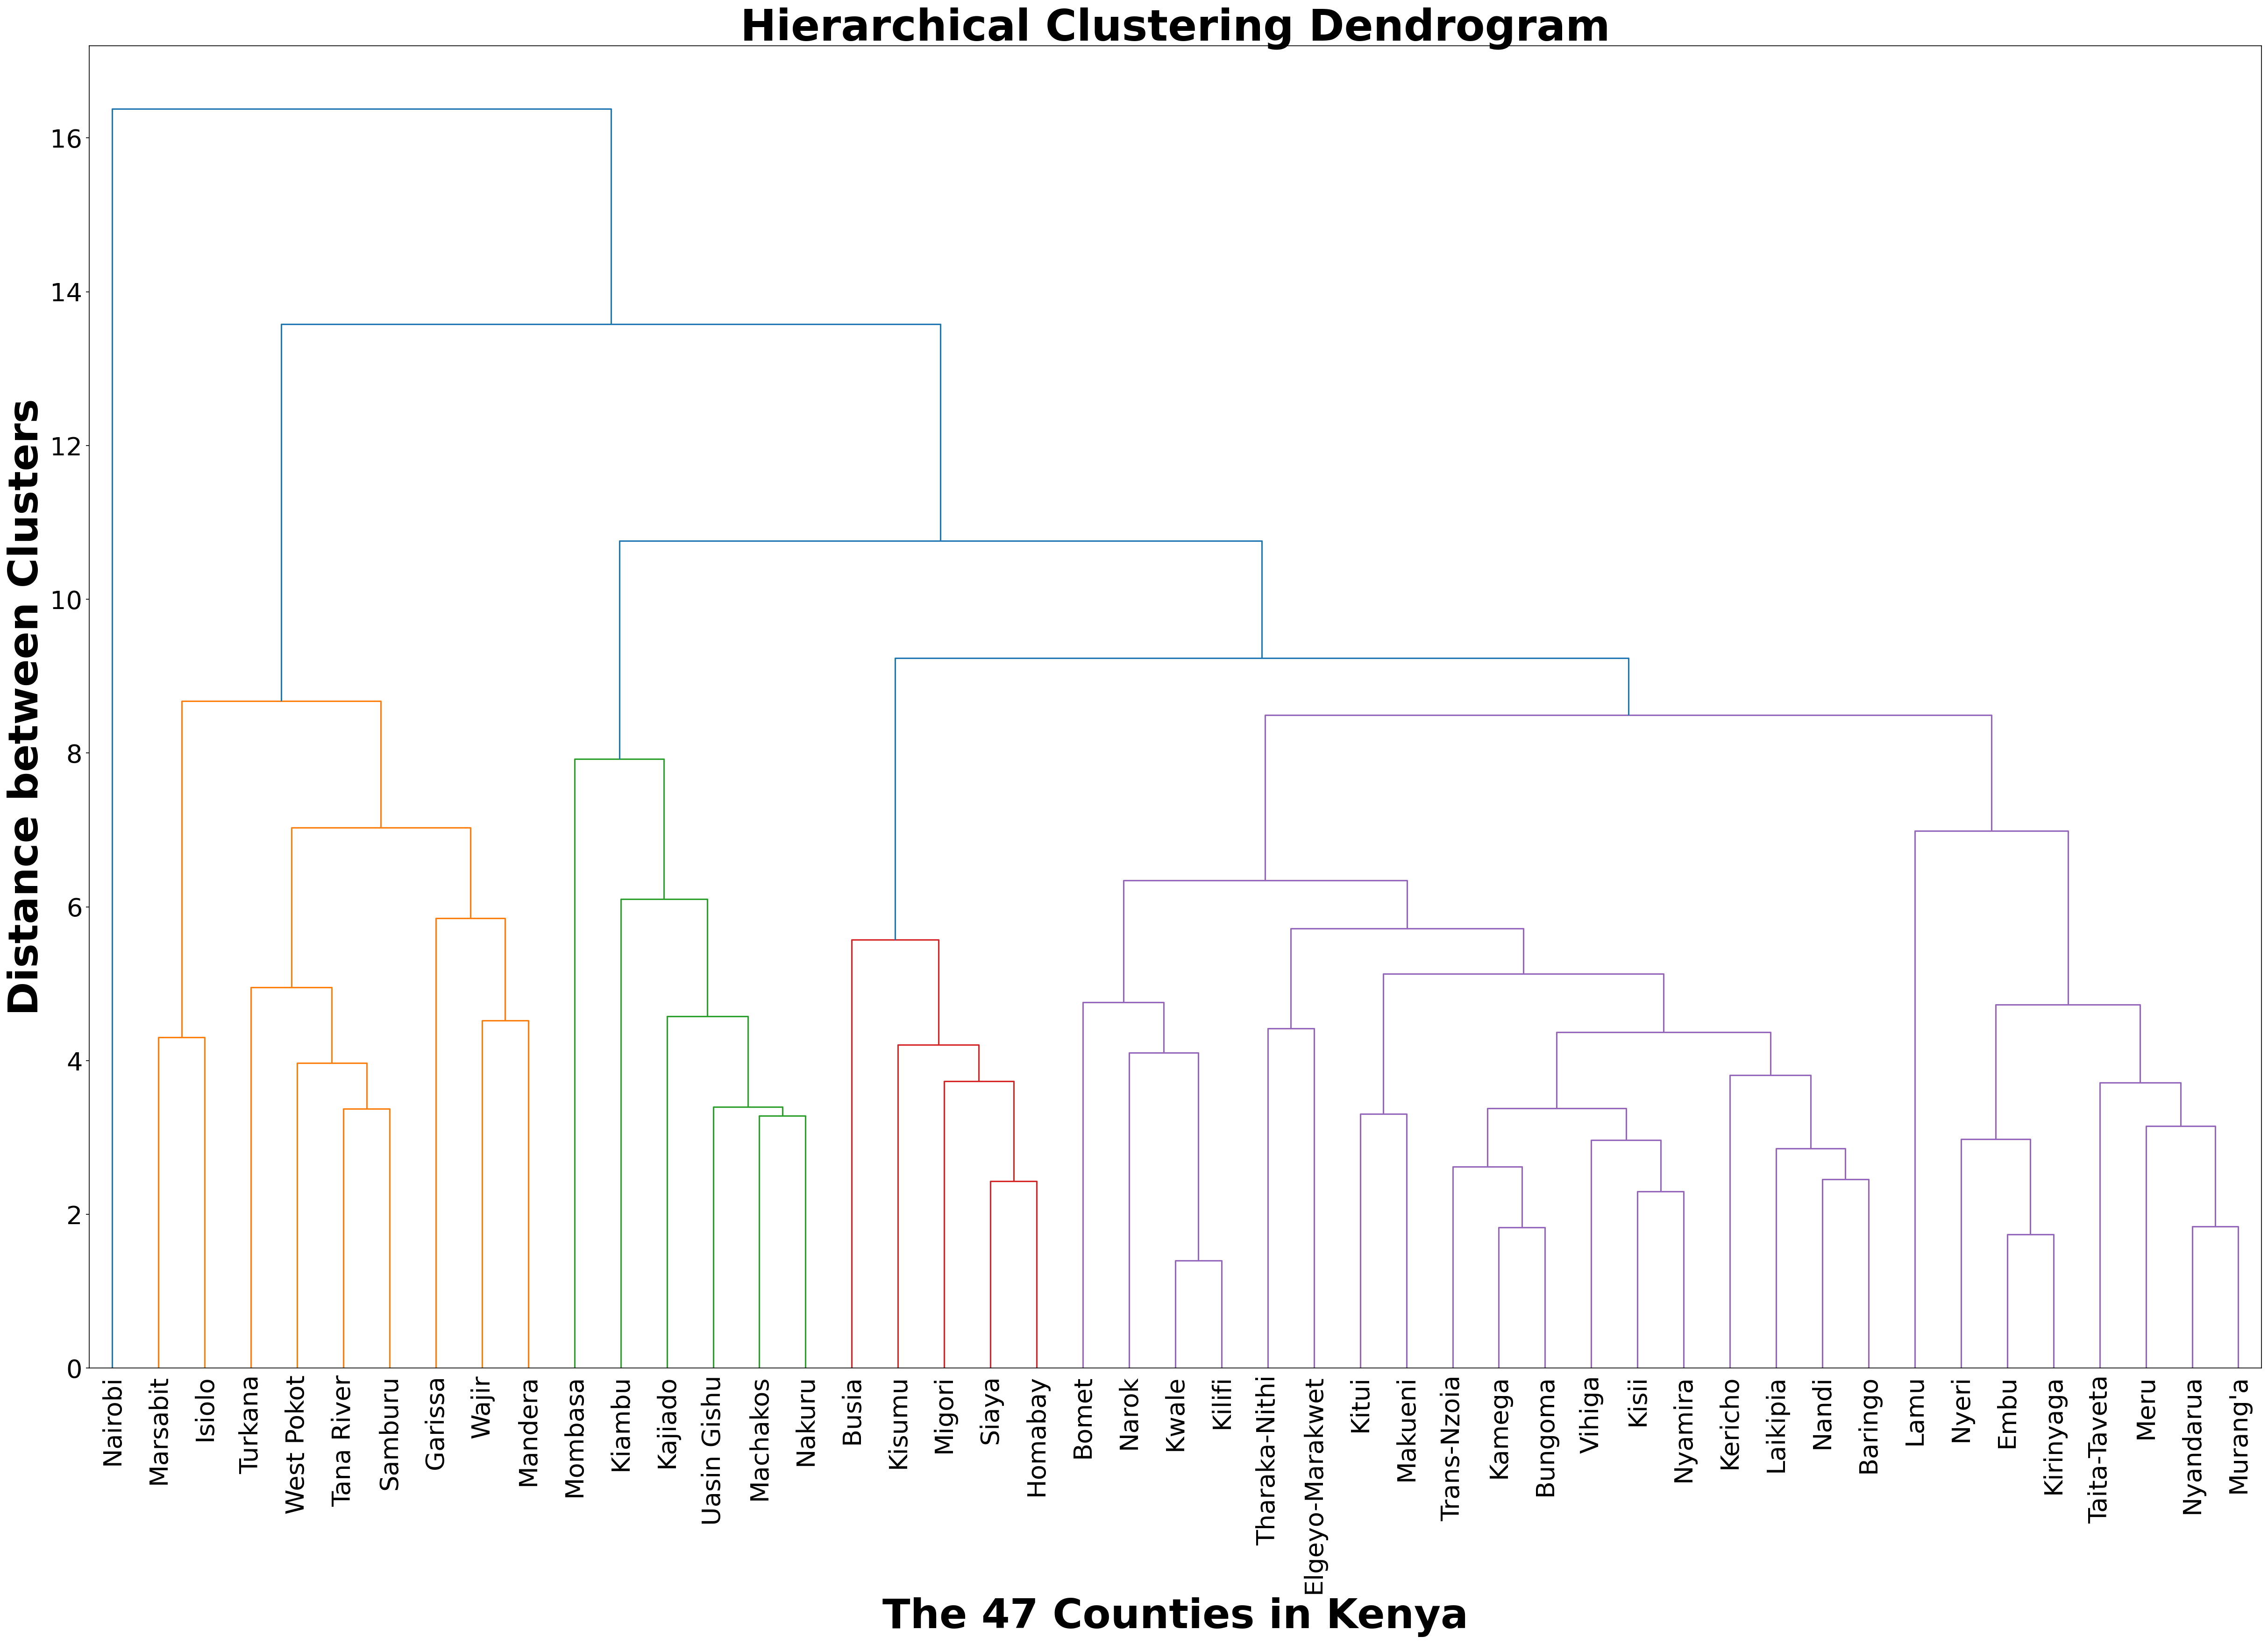

In [253]:
fig, axes = plt.subplots(1, 1, figsize=(40, 25), dpi=150)
sch.dendrogram(sch.linkage(county_data_scaled, method="complete"), color_threshold=9, get_leaves=True, 
               leaf_rotation=90, leaf_font_size=32, show_leaf_counts=True, orientation="top", distance_sort=True, 
               labels=list(names))
plt.title('Hierarchical Clustering Dendrogram', fontsize=44, fontweight="bold")
plt.xlabel('The 47 Counties in Kenya', fontsize=42, fontweight="bold")
plt.ylabel('Distance between Clusters', fontsize=42, fontweight="bold")
axes.tick_params(axis='both', which='major', labelsize=26)
line = 10  # results in 3 clusters
# plt.axhline(y=line, c='red', lw=3, linestyle='--')
plt.savefig("Dendrogram")
plt.show()

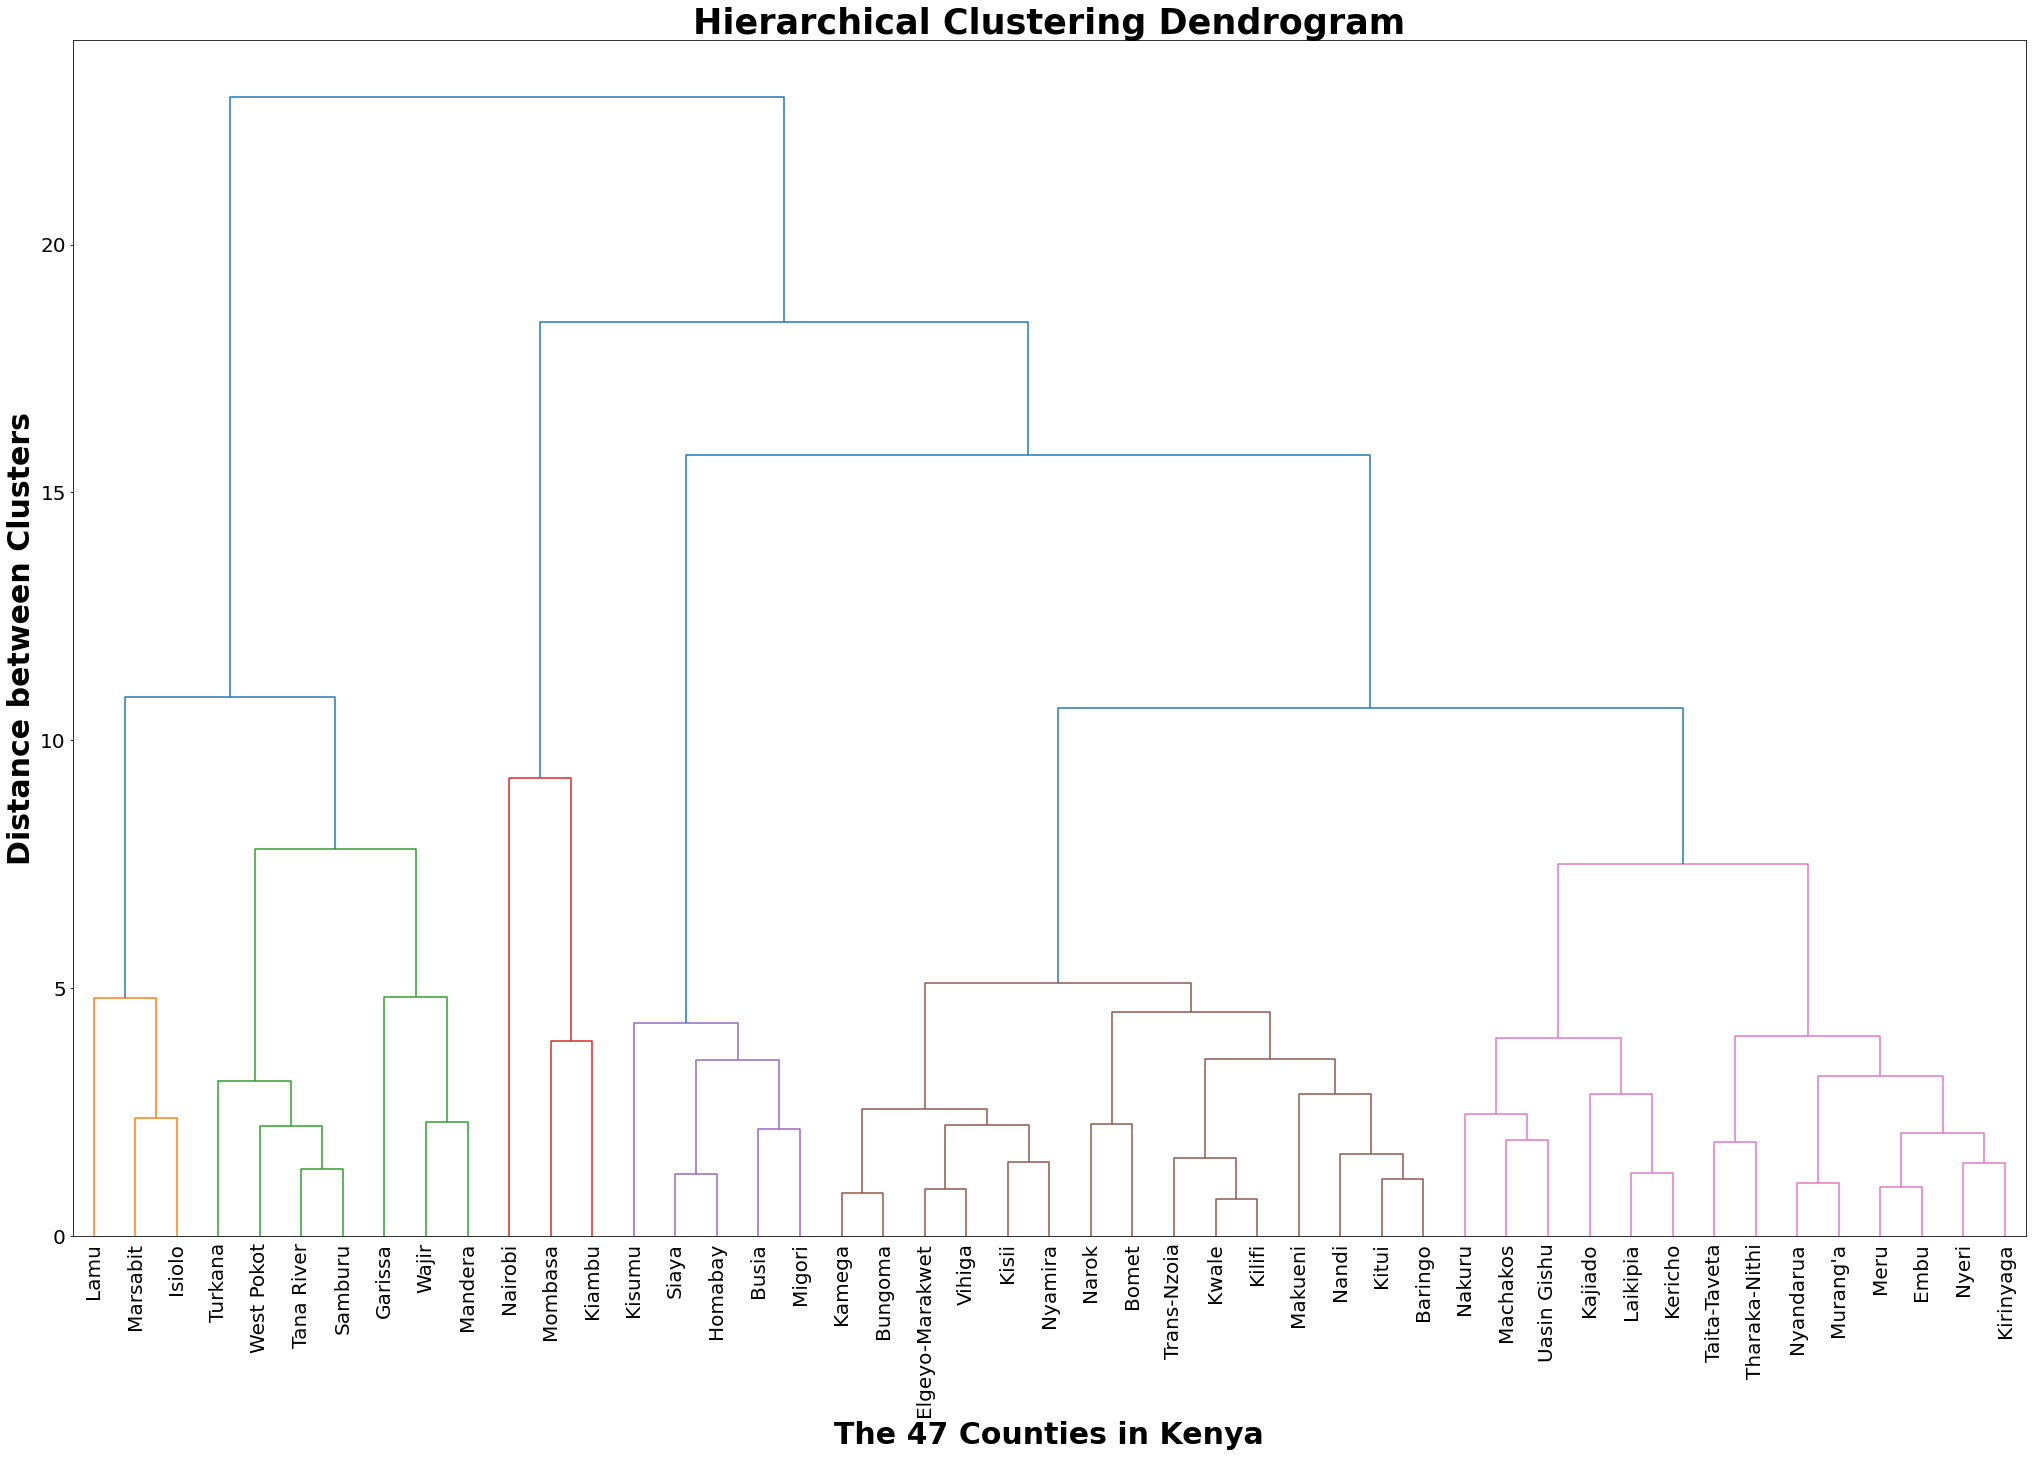

In [254]:
# ward linkage procedure.
fig, axes = plt.subplots(1, 1, figsize=(35, 22))
sch.dendrogram(sch.linkage(data_pca, method="ward"), color_threshold=10, get_leaves=True, 
               leaf_rotation=90, leaf_font_size=34, show_leaf_counts=True, orientation="top", distance_sort=True, 
               labels=list(names))
plt.title('Hierarchical Clustering Dendrogram', fontsize=35, fontweight="bold")
plt.xlabel('The 47 Counties in Kenya', fontsize=30, fontweight="bold")
plt.ylabel('Distance between Clusters', fontsize=30, fontweight="bold")
line = 14.5  # results in 3 clusters
axes.tick_params(axis='both', which='major', labelsize=20)
# plt.axhline(y=line, c='red', lw=3, linestyle='--')
plt.savefig("Dendrogram")
plt.show()

In [255]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering

# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

# save clusters for chart
y_hc = hc.fit(data_pca)

In [256]:
y_hc.labels_

array([3, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 4])

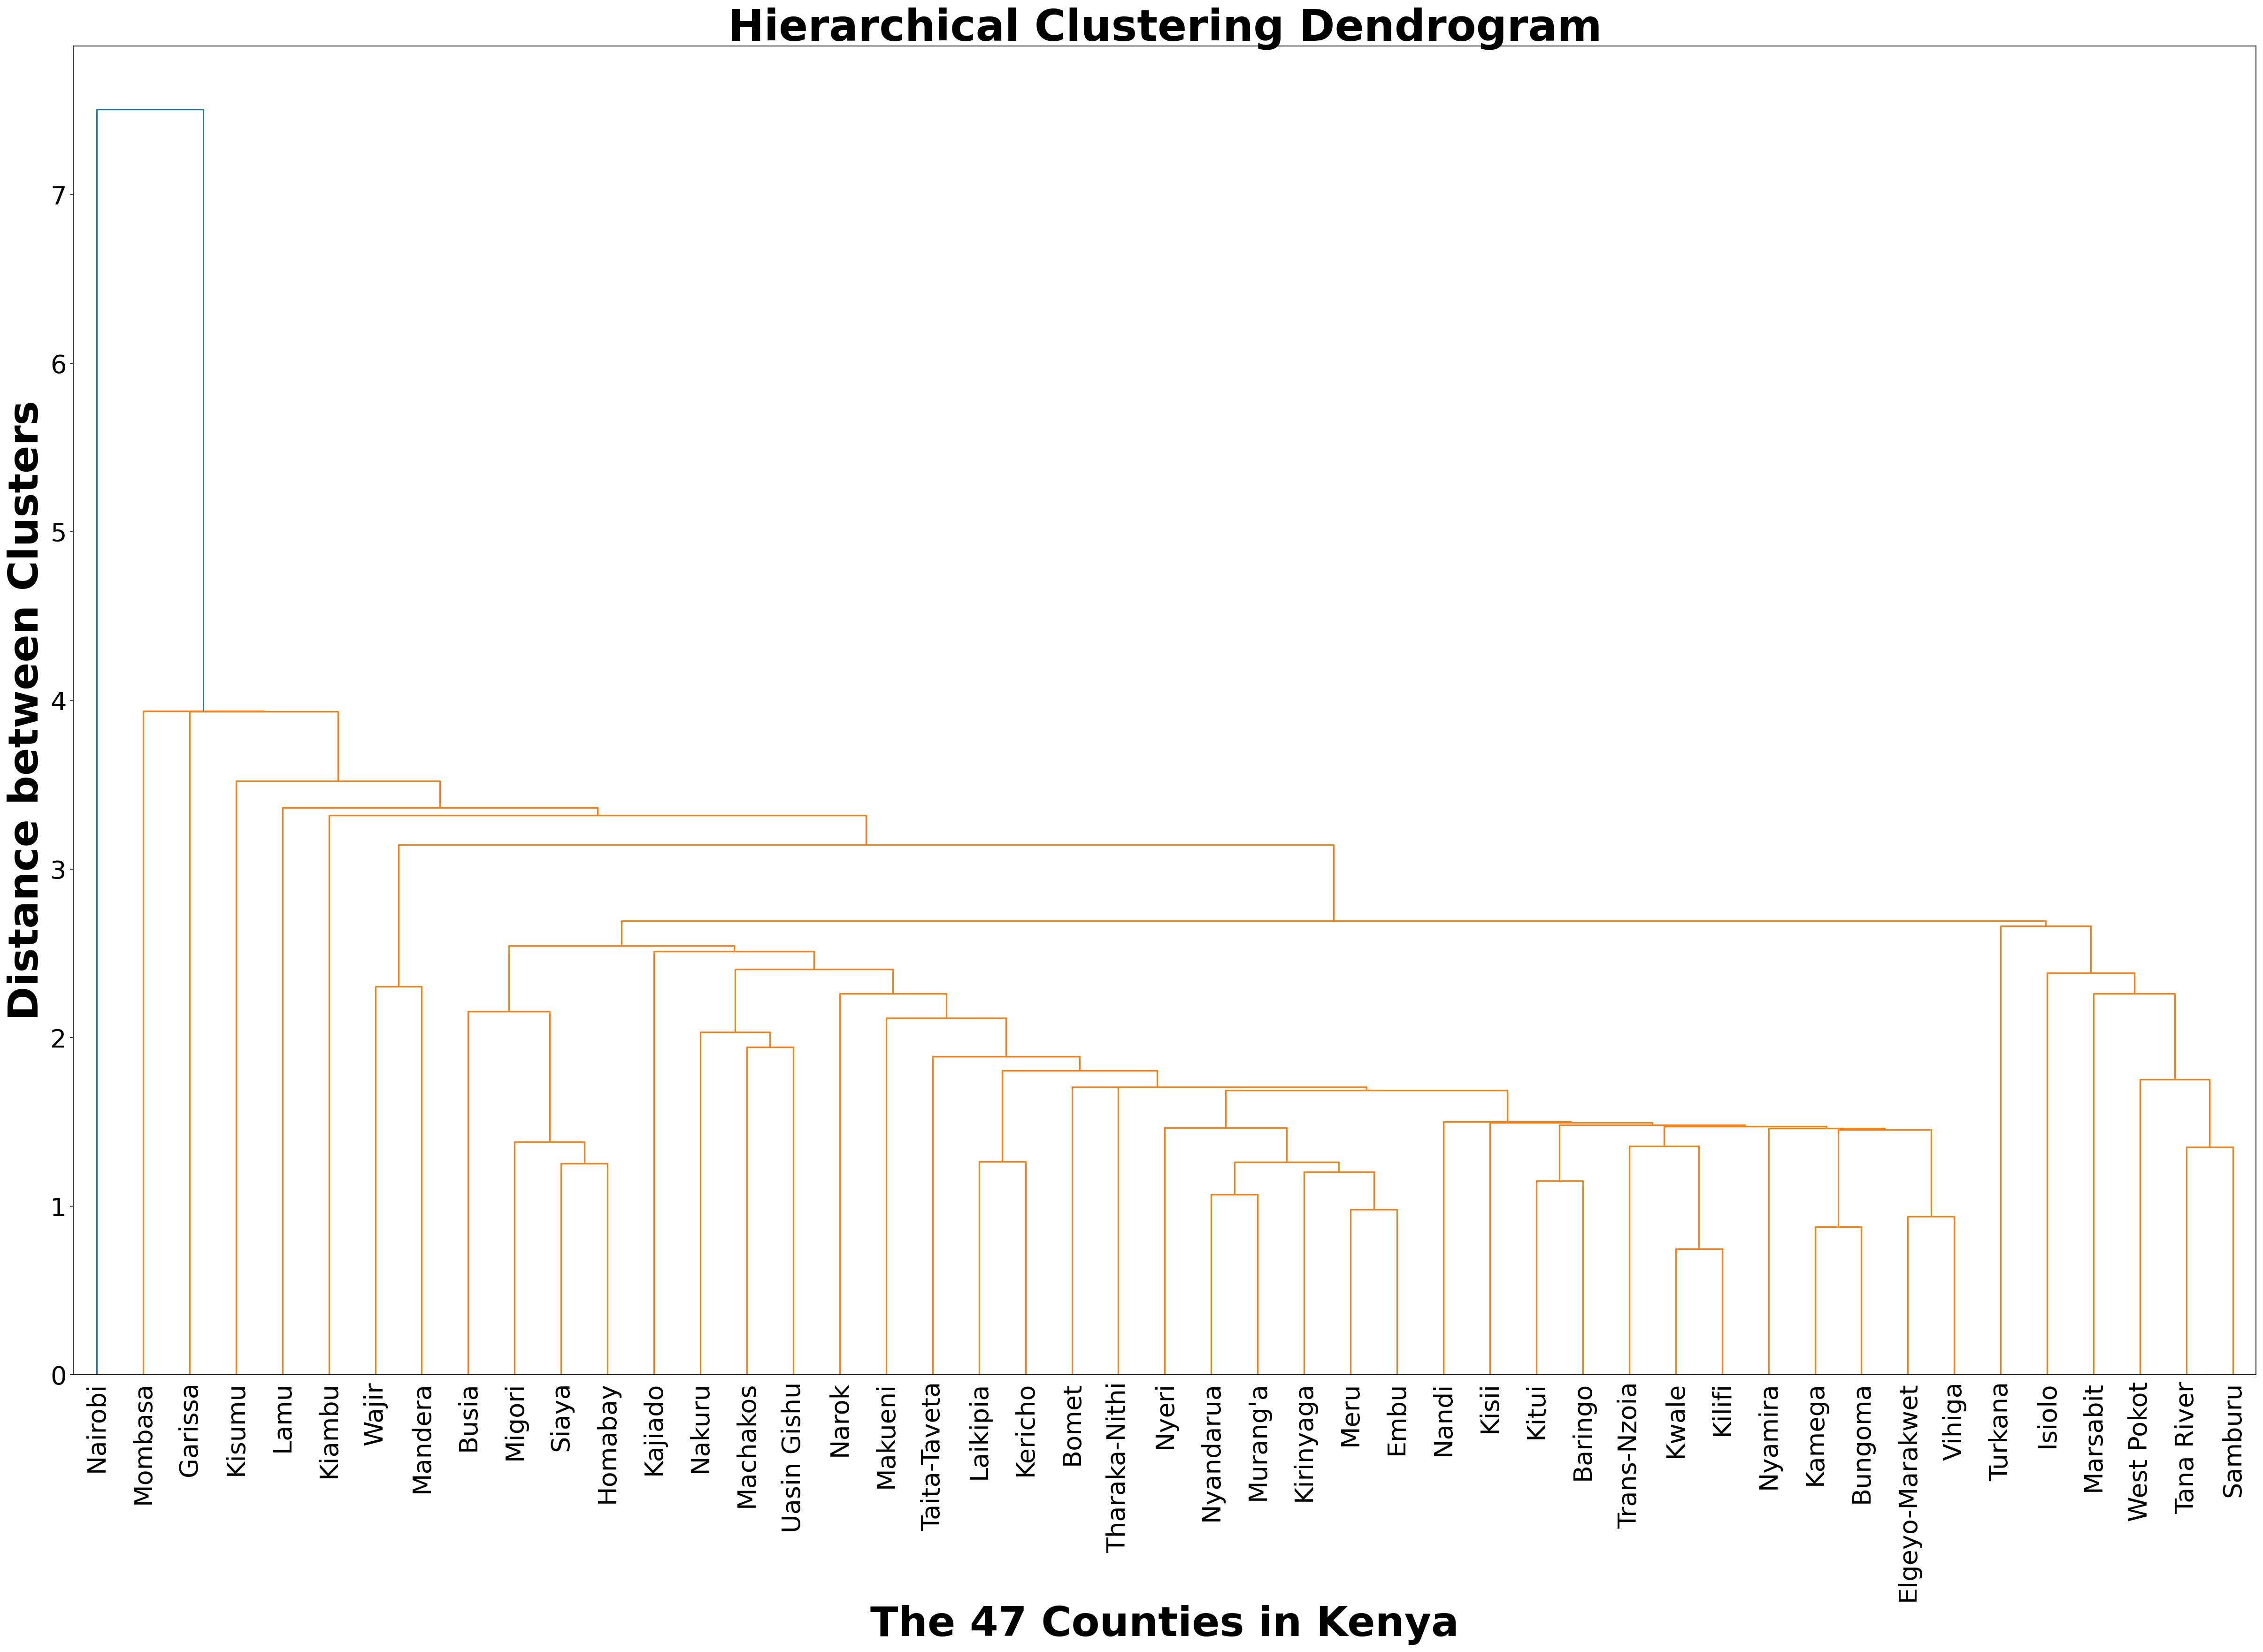

In [257]:
# single linkage procedure.
fig, axes = plt.subplots(1, 1, figsize=(40, 25), dpi=150)
sch.dendrogram(sch.linkage(data_pca, method="single"), get_leaves=True, 
               leaf_rotation=90,leaf_font_size=32, show_leaf_counts=True, orientation="top", 
               distance_sort=True, labels=list(names))
plt.title('Hierarchical Clustering Dendrogram', fontsize=44, fontweight="bold")
plt.xlabel('The 47 Counties in Kenya', fontsize=42, fontweight="bold")
plt.ylabel('Distance between Clusters', fontsize=42, fontweight="bold")
axes.tick_params(axis='both', which='major', labelsize=26)
plt.show()

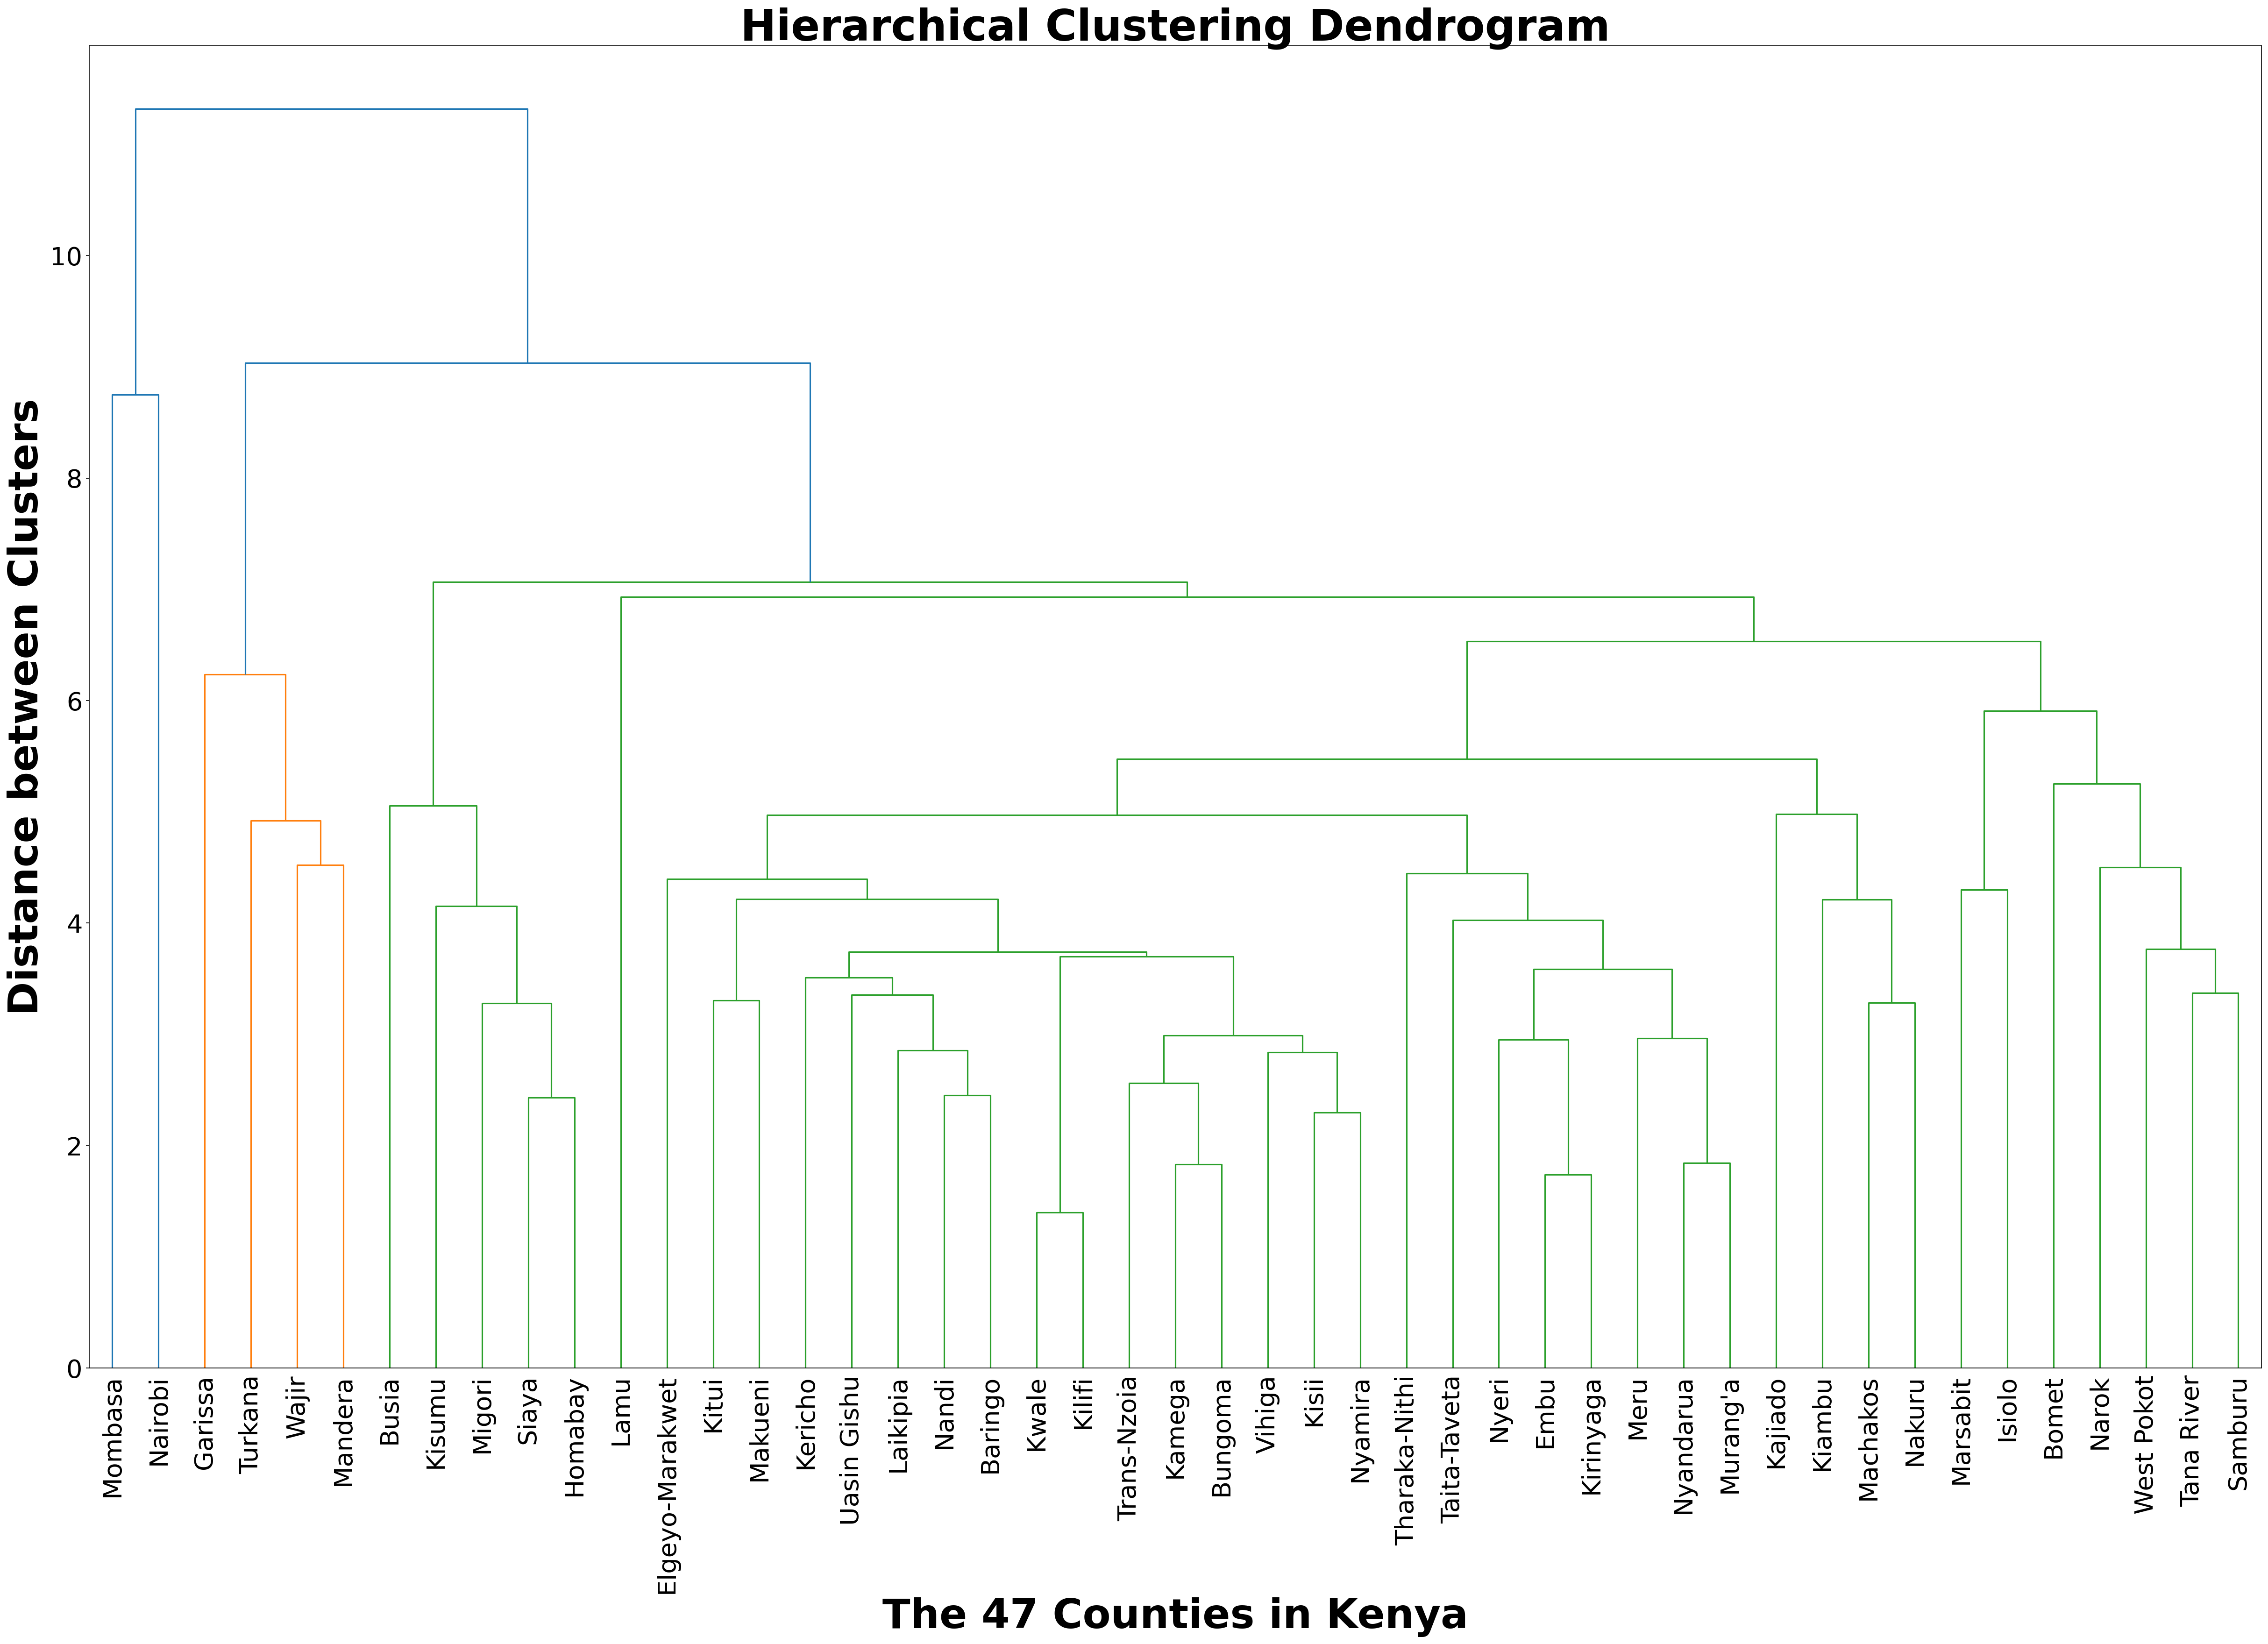

In [258]:
# average linkage procedure.
fig, axes = plt.subplots(1, 1, figsize=(40, 25), dpi=150)
sch.dendrogram(sch.linkage(county_data_scaled, method="average"), get_leaves=True, leaf_rotation=90, 
               leaf_font_size=32, show_leaf_counts=True, orientation="top", distance_sort=True, 
               labels=list(names))
plt.title('Hierarchical Clustering Dendrogram', fontsize=44, fontweight="bold")
plt.xlabel('The 47 Counties in Kenya', fontsize=42, fontweight="bold")
plt.ylabel('Distance between Clusters', fontsize=42, fontweight="bold")
axes.tick_params(axis='both', which='major', labelsize=26)
plt.show()